# **Inventory and Merge Runs of well log LAS data stored as seperate files followed by Interactive Petrpophysical Analysis of data**

We first start off with merging and splicing multiple LAS files into a single LAS or CSV file. 

 ![merge](Merge.png)

## Interactive Analysis


We also include an interactive example of our analysis, where we employ interactive petrophysical parameter widgets to drive the interpretation. The log data includes conventional well logs, along with NMR logs for combined analysis. For this analysis, we utilize three primary saturation models:

        •	George Coates' MRIAN Dual-Water model
        •	Our own Waxman-Smits iterative model
        •	Crain's Waxman-Smits non-iterative saturation equation

In our analysis, we adopt the PHIT/Qv method since PHIT can be calibrated to core measurements. Additionally, we have found NMR data to be highly valuable, particularly in assessing reservoir quality and determining the volume of non-movable Capillary Bound Water (MBVI). We compare this with log-calculated Bulk Volume Water (BVW) to identify intervals capable of delivering water-free hydrocarbons. By integrating NMR with conventional logs, we achieve a comprehensive approach to our petrophysical analysis and interpretation. This concept was demonstrated by George Coates' MRIAN analysis at Numar in the mid-90s, and we incorporate their method along with our own Waxman-Smits techniques in this interpretation.

To calculate Clay Bound Water (CBW), we utilize interactive slide bars. CBW refers to the water chemically bound to the shales. It is computed as the difference between Total Porosity (PHIT) and Effective Porosity (PHIE):

        CBW = PHIT - PHIE

Typically, we start with NMR effective porosity (MPHI for MRIL or CMRP_3MS for CMR) as the effective porosity. However, in cases of light hydrocarbon, heavy oil, or gas intervals, the NMR effective porosity might be suppressed. This leads to an overestimated CBW volume due to the difference between PHIT and the suppressed NMR effective porosity resulting from the low Hydrogen Index (HI) of hydrocarbons:

        CBW = PHIT - MPHI

To model CBW, we create a cross-plot of Vshale (or Swb) against CBW. This plot exhibits a clear trend, except for cases involving gas or heavy oil, where some samples may deviate and show higher CBW volumes. In such instances, we disregard those data points and focus on the primary trend to model CBW for the entire well. Furthermore, the plot below illustrates the Porosity of Shale at the CBW intercept when Vshale is at 100%.

 
 ![cbw_vsh](cbw_vsh2.png)

*(Non-Interactive Plot above)*


This is where the interactive parameters utilizing Panel widgets become crucial, allowing us to gain a deeper understanding of the impact and sensitivity of these parameters. With the utilization of Python's Panel library, we can generate interactive figures that enable dynamic adjustment of parameters using slide bars. The outcomes are instantly displayed, as exemplified below. This functionality empowers us to intuitively comprehend the effects of parameter modifications, delivering the desired level of interactivity.

In the following example, we employ Panel to fit the line to the normal trend observed from our cross plot data of Vsh vs. CBW.


 ![cbw_vsh](CBW_Interactive.gif)
 
*(Interactive Plot above)*

PHIT is derived from the Neutron-Bulk Density Cross Plot porosity, which is calibrated to actual porosity charts using the k-nearest neighbors (kNN) method. It is then compared to the NMR Effective Porosity (MPHI). To determine CBW, we fit the dominant trend using the slide bar, as demonstrated above. This single function enables us to calculate CBW across the entire range of shale volumes:


        CBW = Vsh * CBW Intercept @ 100% Vshale


To calculate the shale volume (Vsh), it is crucial to have a representative estimate. We utilize interactive shale parameter slide bars from Panel for each tool to calculate our shale volumes. Refer to the example below:

 ![cbw_vsh](Vsh_Interactive.gif)
 
*(Interactive Plot above)*

We determine the shale volume (Vsh) using the following tools:

        •	GR (Gamma Ray)
        •	SP (Spontaneous Potential)
        •	Neutron-Density (Neutron Porosity vs. Bulk Density)
        •	Neutron-MPHI (Neutron Porosity vs. MPHI)

To calculate Vsh, we utilize slide bars to define the clean and shale values for the SP and GR tools. We utilize both the depth plots on the left and the appropriate histograms for this purpose. Additionally, we adjust the neutron value for shale in the cross plots. All shale volumes are calculated interactively and in real-time, allowing for immediate feedback. Moreover, we compute a Median Filtered Vsh as well. Typically, we rely on the Median Filtered Vsh for our final interpretation of shale volume.

![cbw_vsh](Vsh_final.png)

*(Non-Interactive Plot above)*

The final Shale Volume is the Median Filtered Vsh (orange curve below) based on Median Vshale calculated from Gamma Ray (green), SP (black), Neutron-Density (red) and Neutron-MPHI (blue).


To calculate Qv, we utilize the estimated volume of Clay Bound Water (CBW) and the equation:

        Swb = CBW/PHIT

Next, we calculate Qv for our shaley-sand saturation models using the Hill Shirley and Klein equation shown below:

        Qv = Swb / (0.6425 / ((Fluid_Density * Salinity(kppm)) ** 0.5) + 0.22)

We utilize both the standard iterative approach and the non-iterative option for the Waxman-Smits equation, as provided by Crain.

In our interpretations, the Waxman-Smits method offers more flexibility. We can model the Waxman-Smits cementation exponent (m*) to vary with increasing Vsh, calibrated to Swb based on observed trends in wet intervals. The cross plot of Vsh vs. m*_apparent (MNA) illustrates this relationship. The apparent m* increases as Vsh (or Swb) increases, primarily observed in the wet intervals. It is important to note that m*_apparent reaches high values in hydrocarbon-bearing intervals and should not be used to determine the trend of m* vs. Vsh or Swb. The m* value at Vsh (or Swb) of 0 (y-intercept) represents the Archie m. As Vsh (or Swb) increases, m* also increases. We have observed that an incorrect Rw value can result in an unrealistic y-intercept, providing valuable feedback regarding our choice of Rw.

![mna_vsh](mna_vsh2.png)

*(Non-Interactive Plot above)*

                                v
In the above plot, we calculated the initial apparent m* using the following equation on the y-axis:

        m*_apparent = log10(Rw/(Rt*(1+Rw*B*Qv)))/log10(PHIT)

The plot illustrates m*_apparent against Vsh, with water saturations represented by the color on the z-axis. The wet trend, indicated by the dark blue sample points, demonstrates a well-defined relationship with a y-intercept of approximately 1.9 at zero Vsh and a slope of 1.8. The y-intercept at zero Vsh represents the Archie 'm' value for the clean rock. The slope and intercept defined by the wet samples for Waxman-Smits m* within the Vsh range of 0 to 1 are utilized to model m*. As Vsh (or Swb) increases, m* also increases.

The relationship between m* and Vsh is represented by the equation:

        m* = slope * Vsh + m_archie

It is important to note that an incorrect Rw value can lead to a shift in the Vsh vs. m*_apparent cross plot. To comprehend the interplay of these factors, Panel widgets are employed to adjust the archie m, n, Rw, and slope of the wet trend on the Vsh vs. m*_apparent cross plot displayed on the right. The depth plot on the left presents the calculated Bulk Volume Water (BVW) using these petrophysical parameters. The Pickett plot in the middle visualizes how our data fits on the log-log cross plot of Rt vs. PHIT. This Panel display aids in accurately determining the saturations in our analysis.

 ![cbw_vsh](Pickett_Interactive2.gif)

*(Interactive Plot above)*


In our interpretation, we commonly compare the log analysis-based Bulk Volume Water in the effective porosity system (BVWe) with the MRIL MBVI, both of which are in the effective porosity system. This allows us to identify intervals that possess hydrocarbon saturations without any movable water. When BVWe exceeds MBVI, denoted by the cyan-colored fill in the penultimate track, it indicates the presence of movable water, which is influenced by the relative permeability and mobility of the fluids involved.


 
### Resources:
1. Coates, G.R., Gardner, J.S., and Miller, D.L., 1994, "Applying pulse-echo NMR to shaly sand formation evaluation", paper B, 35th Annual SPWLA Logging Symposium Transactions, 22 p.

2. Hill, H.J., Shirley, O.J., Klein, G.E.: “Bound Water in Shaley Sands - Its Relation to Qv and Other Formation Properties”, Log Analyst, May-June 1979.

3. Dacy, J., Martin, P.: "Practical Advances in Core-Based Water Saturation Analysis of Shaly Tight Gas Sands", SCA, SCA2009-29, 2009.









---
---
># **Start Point 1**

## **Inventory and Merge Runs of well log LAS data stored as seperate files**

---
### This program will use the files in the **"_rename"** folder:



In [1]:

import warnings
warnings.filterwarnings("ignore")

import os, glob, re

import lasio
from lasio import CurveItem

import pandas as pd
import panel as pn

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches  # Import for manually creating colored legend labels


# Initialize Panel
pn.extension()

import base64
from io import BytesIO
#from IPython.core.display import display, HTML
from IPython.display import display, HTML

pn.extension(sizing_mode="stretch_width")

SUFFIXES = ( "_renamed")

# --- helpers ---
def find_renamed_folders():
    # looks in CURRENT working directory
    folders = []
    for name in sorted(os.listdir(".")):
        if os.path.isdir(name) and name.endswith(SUFFIXES):
            folders.append(name)
    return folders

def list_las_files(folder, pattern="*.las"):
    return sorted(glob.glob(os.path.join(folder, pattern)))

# --- widgets ---
refresh = pn.widgets.Button(name="Refresh", button_type="primary")
folder_select = pn.widgets.Select(name="Select renamed folder", options=[])
pattern = pn.widgets.TextInput(name="File pattern", value="*.las")

# --- output panes ---
cwd_md    = pn.pane.Markdown("")
status_md = pn.pane.Markdown("")
files_md  = pn.pane.Markdown("", sizing_mode="stretch_both")

# --- globals this cell will define for downstream notebook cells ---
file_directory = None   # selected folder name
active_dir = None       # same as selected folder path (./<folder>)
las_files = []          # list of LAS files in active_dir

def get_plots_dir(active_dir, subdir="plots"):
    """
    Ensure a plots directory exists inside the active well folder.
    Returns full path to plots directory.
    """
    if active_dir is None:
        raise ValueError("active_dir is not set.")
    plots_dir = os.path.join(active_dir, subdir)
    os.makedirs(plots_dir, exist_ok=True)
    return plots_dir



def sync_state_and_render():
    """Update folder list, set globals (file_directory/active_dir/las_files), render output."""
    global file_directory, active_dir, las_files

    # Always show where we are scanning
    cwd_md.object = f"**Current working directory:** `{os.getcwd()}`"

    # Update dropdown options
    folders = find_renamed_folders()
    folder_select.options = folders

    # Preserve selection if possible
    if folders:
        if folder_select.value not in folders:
            folder_select.value = folders[0]
    else:
        folder_select.value = None

    # If nothing to select, clear state
    if not folder_select.value:
        file_directory = None
        active_dir = None
        las_files = []
        status_md.object = "⚠️ No folders ending in `_rename` or `_renamed` found in the current working directory."
        files_md.object = ""
        return

    # Set "working folder" state
    file_directory = folder_select.value
    active_dir = os.path.join(".", file_directory)
    las_files = list_las_files(active_dir, pattern.value.strip() or "*.las")

    # Render
    status_md.object = (
        f"### Working folder set\n"
        f"**file_directory:** `{file_directory}`  \n"
        f"**active_dir:** `{os.path.abspath(active_dir)}`  \n\n"
        f"**LAS files found:** {len(las_files)}"
    )
    files_md.object = "No matching files." if not las_files else "\n".join([f"- `{f}`" for f in las_files])

def on_refresh(event=None):
    sync_state_and_render()

# Reactive updates
refresh.on_click(on_refresh)
folder_select.param.watch(lambda e: sync_state_and_render(), "value")
pattern.param.watch(lambda e: sync_state_and_render(), "value")

# Initial run
sync_state_and_render()

pn.Column(
    "## Select renamed folder (sets `file_directory`, `active_dir`, `las_files`)",
    pn.Row(folder_select, pattern, refresh),
    pn.pane.Markdown("---"),
    cwd_md,
    status_md,
    files_md,
)


Column(sizing_mode='stretch_width')
    [0] Markdown(str, sizing_mode='stretch_width')
    [1] Row(sizing_mode='stretch_width')
        [0] Select(options=['16841 DEADWOOD CANYON RA...], sizing_mode='stretch_width', value='16841 DEADWOOD C...)
        [1] TextInput(name='File pattern', sizing_mode='stretch_width', value='*.las')
        [2] Button(button_type='primary', name='Refresh', sizing_mode='stretch_width')
    [2] Markdown(str, sizing_mode='stretch_width')
    [3] Markdown(str, sizing_mode='stretch_width')
    [4] Markdown(str, sizing_mode='stretch_width')
    [5] Markdown(str, sizing_mode='stretch_both')

---
># **Start Point 2**
> Select **Run** from the menu line and then **Run Selected Cells and All Below** 

# Plot Presence of all available log curve data colored by las file

## First create an Andy McDonald type of depth plot that highlights the depths that have data for each log curve for each run colored by las file:

Andy has some great tutorials available on GitHub, LinkedIn and Medium. 

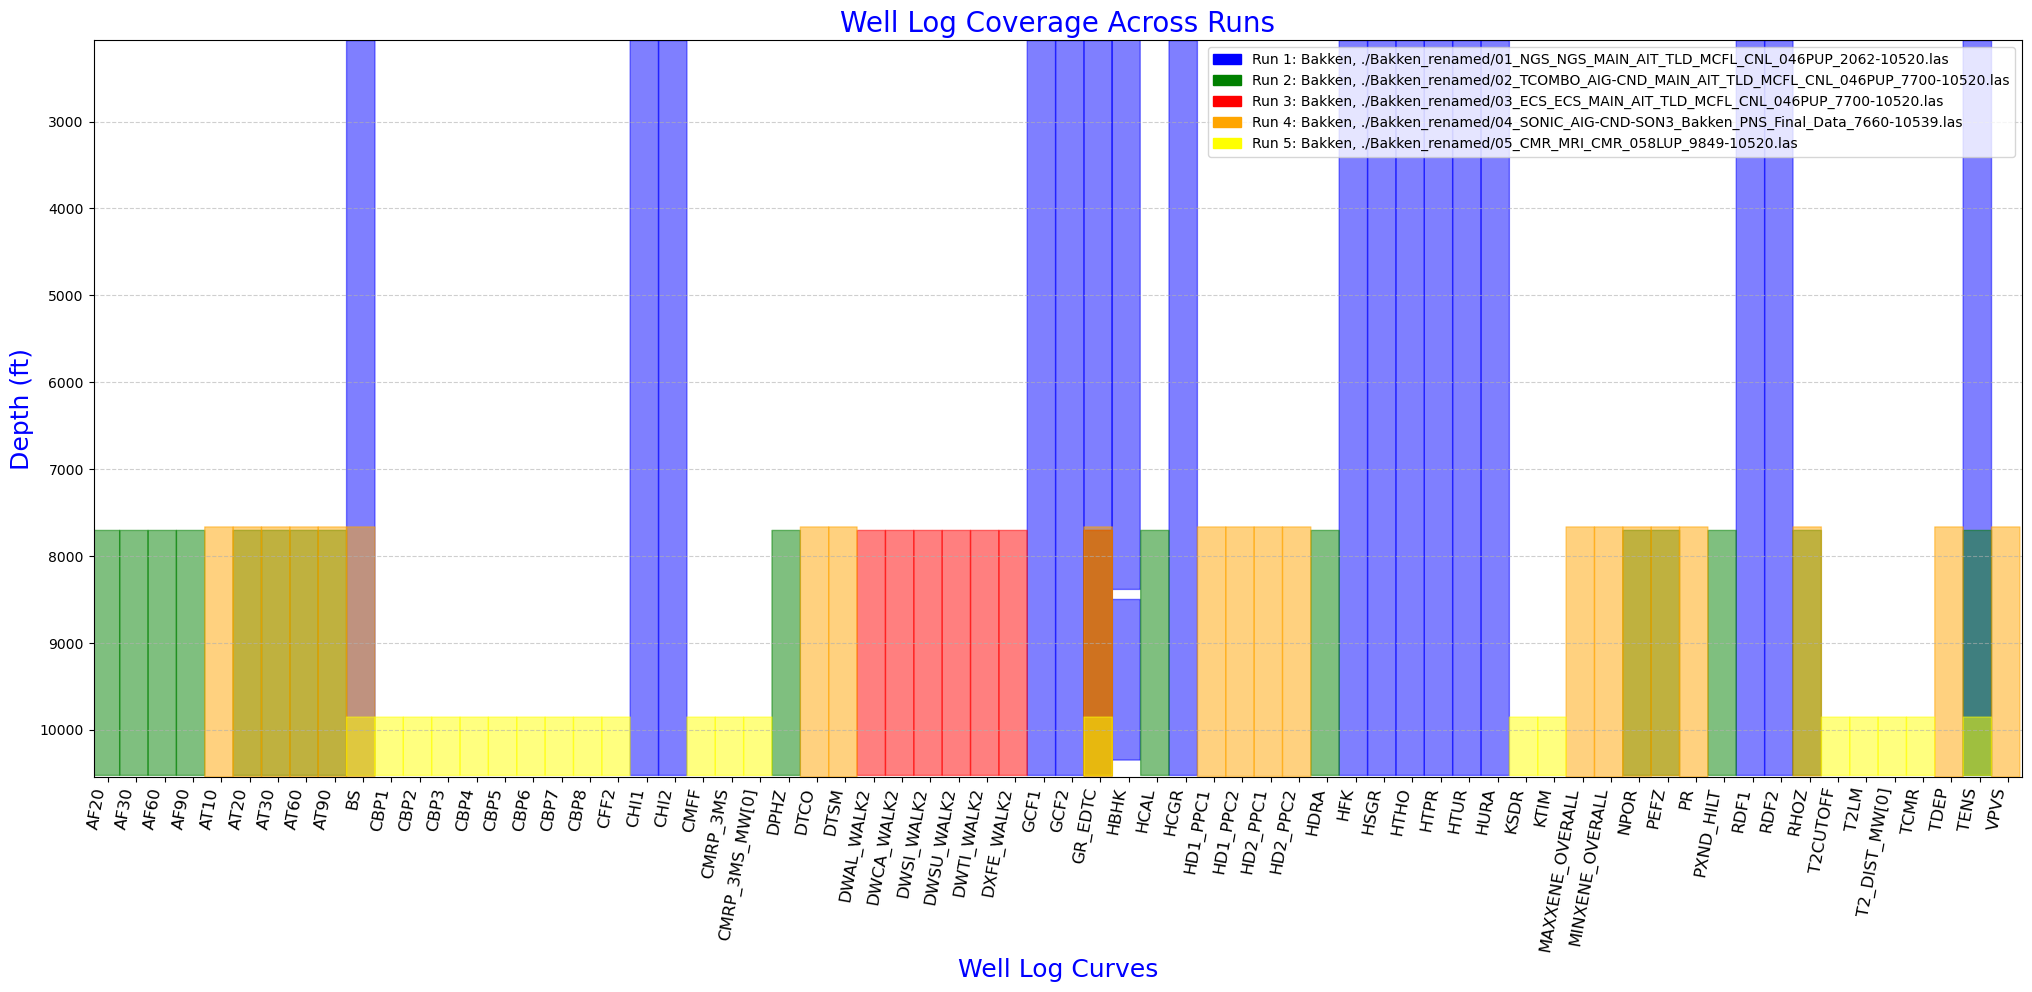

'\n# **Save the image**\nimage_filename = f"Depth_plot_Andy_{wellname}_{file_directory}_colored_by_las_file.png"\nfig.savefig(image_filename, format="png", dpi=300, bbox_inches="tight")\nprint(f"Plot saved as {image_filename}_colored_by_las_file")\n\nplt.show()\n'

In [2]:
# Function to read LAS file and extract depth and log availability
def get_well_nan(file):
    las = lasio.read(file)
    df_log = las.df()
    df_log.index = las["DEPT"]
    well_nan = df_log.notnull().astype(int)  # Convert to binary (1=Available, 0=Missing)
    wellname = las.well.WELL.value if "WELL" in las.well else file  # Get well name
    return wellname, df_log.index, well_nan

# Read all LAS files and store data
las_data = [get_well_nan(file) for file in las_files]

# Get a unique list of all well log curves across runs
all_available_curves = sorted(set().union(*[df.columns for _, _, df in las_data]))

# Determine global min and max depth across all runs
min_depth = min(min(depth) for _, depth, _ in las_data)
max_depth = max(max(depth) for _, depth, _ in las_data)

# Assign distinct colors for each run
run_colors = ["blue", "green", "red", "orange", "yellow", "black","purple","cyan","gray","violet","limegreen","teal"]
alpha = 0.5  # Transparency for shading

# Create figure with tracks for all unique curves
fig, ax = plt.subplots(figsize=(len(all_available_curves) * 0.3, 10))  # Increase width for better label spacing

# Well name storage for legend (with correct colors)
legend_patches = []

# Loop through each LAS file and shade where logs are present
for run_index, (wellname, depth, well_nan) in enumerate(las_data):
    legend_patches.append(mpatches.Patch(color=run_colors[run_index], label=f"Run {run_index+1}: {wellname}, {las_files[run_index]}"))    
    #legend_patches.append(mpatches.Patch(color=run_colors[run_index], label=f"Run {run_index+1}: {wellname}"))
    for j, curve in enumerate(all_available_curves):
        if curve in well_nan.columns:
            ax.fill_betweenx(depth, j - 0.6, j + 0.4, where=well_nan[curve] == 1, 
                             color=run_colors[run_index], alpha=alpha)

# Format plot
ax.set_xlim(-0.5, len(all_available_curves) - 0.5)  # Keep x-axis aligned
ax.set_ylim(max_depth, min_depth)  # Ensure depth increases downward
ax.set_xticks(range(len(all_available_curves)))
ax.set_xticklabels(all_available_curves, rotation=80, fontsize=12, ha="right")  # Rotate & align right
ax.set_xlabel("Well Log Curves", fontsize=18, color = 'blue')
ax.set_ylabel("Depth (ft)", fontsize=18, color = 'blue')
ax.set_title("Well Log Coverage Across Runs", fontsize=20, color='blue')
ax.grid(axis="y", linestyle="--", alpha=0.6)

# Add well names to legend (ensuring correct colors)
ax.legend(handles=legend_patches, loc="upper right", fontsize=10, frameon=True)

plt.subplots_adjust(bottom=0.25)  # Extra space for x-axis labels
plt.tight_layout()

# **Create output filenames using the well name**
wellname = wellname.replace("#", "").replace(" ", "_")  # Sanitize well name




plt.tight_layout(pad=1.0, w_pad=0.2)

plots_dir = os.path.join(file_directory, "plots")
os.makedirs(plots_dir, exist_ok=True)

image_filename = os.path.join(
    plots_dir,
    f"Depth_plot_Andy_{wellname}_{file_directory}_colored_by_las_file.png"
)

fig.savefig(image_filename, dpi=300, bbox_inches="tight", facecolor="white")
plt.show()
plt.close(fig)




'''
# **Save the image**
image_filename = f"Depth_plot_Andy_{wellname}_{file_directory}_colored_by_las_file.png"
fig.savefig(image_filename, format="png", dpi=300, bbox_inches="tight")
print(f"Plot saved as {image_filename}_colored_by_las_file")

plt.show()
'''


---
---
# **Total Curve Inventory for each LAS File**

## Typical report for all meta data for each las files:

Very simple display of well log header data in las file. 

In [3]:
import os
import numpy as np
import pandas as pd
import lasio
import panel as pn

pn.extension("tabulator", sizing_mode="stretch_width")

# ---- Requires las_files from your folder-picker cell ----
if "las_files" not in globals() or not las_files:
    raise ValueError("`las_files` is empty. Run your folder-selection cell first.")

# ---- Simple cache so switching files is fast ----
_LAS_CACHE = {}
def read_las_cached(path):
    if path not in _LAS_CACHE:
        _LAS_CACHE[path] = lasio.read(path)
    return _LAS_CACHE[path]

# ---- UI widgets ----
file_names = [os.path.basename(p) for p in las_files]
file_map = dict(zip(file_names, las_files))

file_selector = pn.widgets.Select(name="LAS file", options=file_names, width=800)

prev_btn = pn.widgets.Button(name="◀ Prev", button_type="default")
next_btn = pn.widgets.Button(name="Next ▶", button_type="default")

sample_curve_choices = pn.widgets.MultiChoice(
    name="Sample curves (shown in table)",
    options=["DEPT","GR","RHOZ","RHOB","TNPH","NPOR","RT","RS","TCMR","CMRP_3MS","BFV","DCAL","CALI","BS","DRHO"],
    value=["DEPT","GR","RHOZ","TNPH"]
)

nrows = pn.widgets.IntInput(name="Sample rows", value=5, start=1, end=50)

# ---- Output panes ----
header_md = pn.pane.Markdown("")
curves_tbl = pn.widgets.Tabulator(pd.DataFrame(), height=260, pagination="local", page_size=12)
well_tbl   = pn.widgets.Tabulator(pd.DataFrame(), height=260, pagination="local", page_size=12)
depth_tbl  = pn.widgets.Tabulator(pd.DataFrame(), height=140)
sample_tbl = pn.widgets.Tabulator(pd.DataFrame(), height=220)

def build_review(file_key, curve_list, nrows_):
    if not file_key:
        return

    path = file_map[file_key]
    las = read_las_cached(path)

    # --- Header / version ---
    las_version = ""
    try:
        if las.version:
            # las.version is a Section; keep it short
            las_version = ", ".join([f"{k}:{v.value}" for k, v in las.version.items() if hasattr(v, "value")])
    except Exception:
        las_version = ""

    header_md.object = (
        f"## Reviewing `{file_key}`\n"
        f"**Path:** `{path}`  \n"
        f"**LAS Version:** `{las_version or 'N/A'}`"
    )

    # --- Well section ---
    well_info = {}
    if getattr(las, "well", None):
        for k, v in las.well.items():
            try:
                unit = (v.unit or "").strip()
                val = v.value
                well_info[str(k)] = f"{val} {unit}".strip() if unit else val
            except Exception:
                well_info[str(k)] = str(v)

    well_df = pd.DataFrame(
        [{"Mnemonic": k, "Value": v} for k, v in well_info.items()]
    )

    # --- Curves section ---
    curve_df = pd.DataFrame(
        [{"Mnemonic": c.mnemonic, "Unit": c.unit, "Description": c.descr} for c in las.curves]
    )

    # --- Depth range ---
    if "DEPT" in las.keys():
        d = np.asarray(las["DEPT"], float)
        d = d[np.isfinite(d)]
        if d.size:
            depth_df = pd.DataFrame([{"Top (min)": float(np.min(d)), "Base (max)": float(np.max(d))}])
        else:
            depth_df = pd.DataFrame([{"Error": "DEPT exists but contains no finite values"}])
    else:
        depth_df = pd.DataFrame([{"Error": "Depth curve ('DEPT') not found"}])

    # --- Sample data table ---
    chosen = [c for c in curve_list if c in las.keys()]
    if "DEPT" in las.keys() and "DEPT" not in chosen:
        chosen = ["DEPT"] + chosen

    if chosen:
        # Build from LAS curves directly
        sample = {}
        for c in chosen:
            try:
                sample[c] = np.asarray(las[c])[: int(nrows_)]
            except Exception:
                sample[c] = [np.nan] * int(nrows_)
        sample_df = pd.DataFrame(sample)
    else:
        sample_df = pd.DataFrame({"Info": ["No selected curves found in this file."]})

    # Push into tables
    curves_tbl.value = curve_df
    well_tbl.value   = well_df
    depth_tbl.value  = depth_df
    sample_tbl.value = sample_df

# Reactive updates (no .map)
def update_all(*_):
    build_review(file_selector.value, sample_curve_choices.value, nrows.value)

file_selector.param.watch(lambda e: update_all(), "value")
sample_curve_choices.param.watch(lambda e: update_all(), "value")
nrows.param.watch(lambda e: update_all(), "value")

# Prev/Next navigation (robust)
def _go(delta):
    opts = list(file_selector.options)  # current options (source of truth)
    cur = file_selector.value

    if not opts:
        return

    # If cur is None or not found, jump to start
    if cur not in opts:
        file_selector.value = opts[0]
        return

    idx = opts.index(cur)
    idx2 = max(0, min(len(opts) - 1, idx + int(delta)))
    file_selector.value = opts[idx2]

prev_btn.on_click(lambda e: _go(-1))
next_btn.on_click(lambda e: _go(+1))

# Initial render
file_selector.value = file_names[0]
update_all()

pn.Column(
    "# Well Log Review (Panel replacement for the print loop)",
    pn.Row(prev_btn, next_btn, file_selector),
    pn.Row(sample_curve_choices, nrows),
    pn.pane.Markdown("---"),
    header_md,
    pn.pane.Markdown("### Curve Inventory"),
    curves_tbl,
    pn.pane.Markdown("### Well Header"),
    well_tbl,
    pn.pane.Markdown("### Depth Range"),
    depth_tbl,
    pn.pane.Markdown("### Sample Data"),
    sample_tbl,
)


Column(sizing_mode='stretch_width')
    [0] Markdown(str, sizing_mode='stretch_width')
    [1] Row(sizing_mode='stretch_width')
        [0] Button(name='◀ Prev', sizing_mode='stretch_width')
        [1] Button(name='Next ▶', sizing_mode='stretch_width')
        [2] Select(name='LAS file', options=['01_NGS_NGS_MAIN_AIT_TLD_...], value='01_NGS_NGS_MAIN_AIT_TLD_M..., width=800)
    [2] Row(sizing_mode='stretch_width')
        [0] MultiChoice(name='Sample curves (..., options=['DEPT', 'GR', ...], sizing_mode='stretch_width', value=['DEPT', 'GR', ...])
        [1] IntInput(end=50, name='Sample rows', sizing_mode='stretch_width', start=1, value=5)
    [3] Markdown(str, sizing_mode='stretch_width')
    [4] Markdown(str, sizing_mode='stretch_width')
    [5] Markdown(str, sizing_mode='stretch_width')
    [6] Tabulator(height=260, page_size=12, pagination='local', sizing_mode='stretch_width', value=   Mnemonic  U...)
    [7] Markdown(str, sizing_mode='stretch_width')
    [8] Tabulator(height=260, page_size=12, pagination='local', sizing_mode='stretch_width', value=   Mnemonic   ...)
    [9] Markdown(str, sizing_mode='stretch_width')
    [10] Tabulator(height=140, sizing_mode='stretch_width', value=   Top (min)  ...)
    [11] Markdown(str, sizing_mode='stretch_width')
    [12] Tabulator(height=220, sizing_mode='stretch_width', value=      DEPT
0  ...)

---
---
# **Plot each log curve with an x-range from the 5 percentile to the 95 percentile:**

This is a start, but not perfect. Need to define log10 families of log curves.

## **NEW:** Resistivity (OHMM), Permeability (MD) and Msec (MS) Unit Data Plotted on log scale:
---


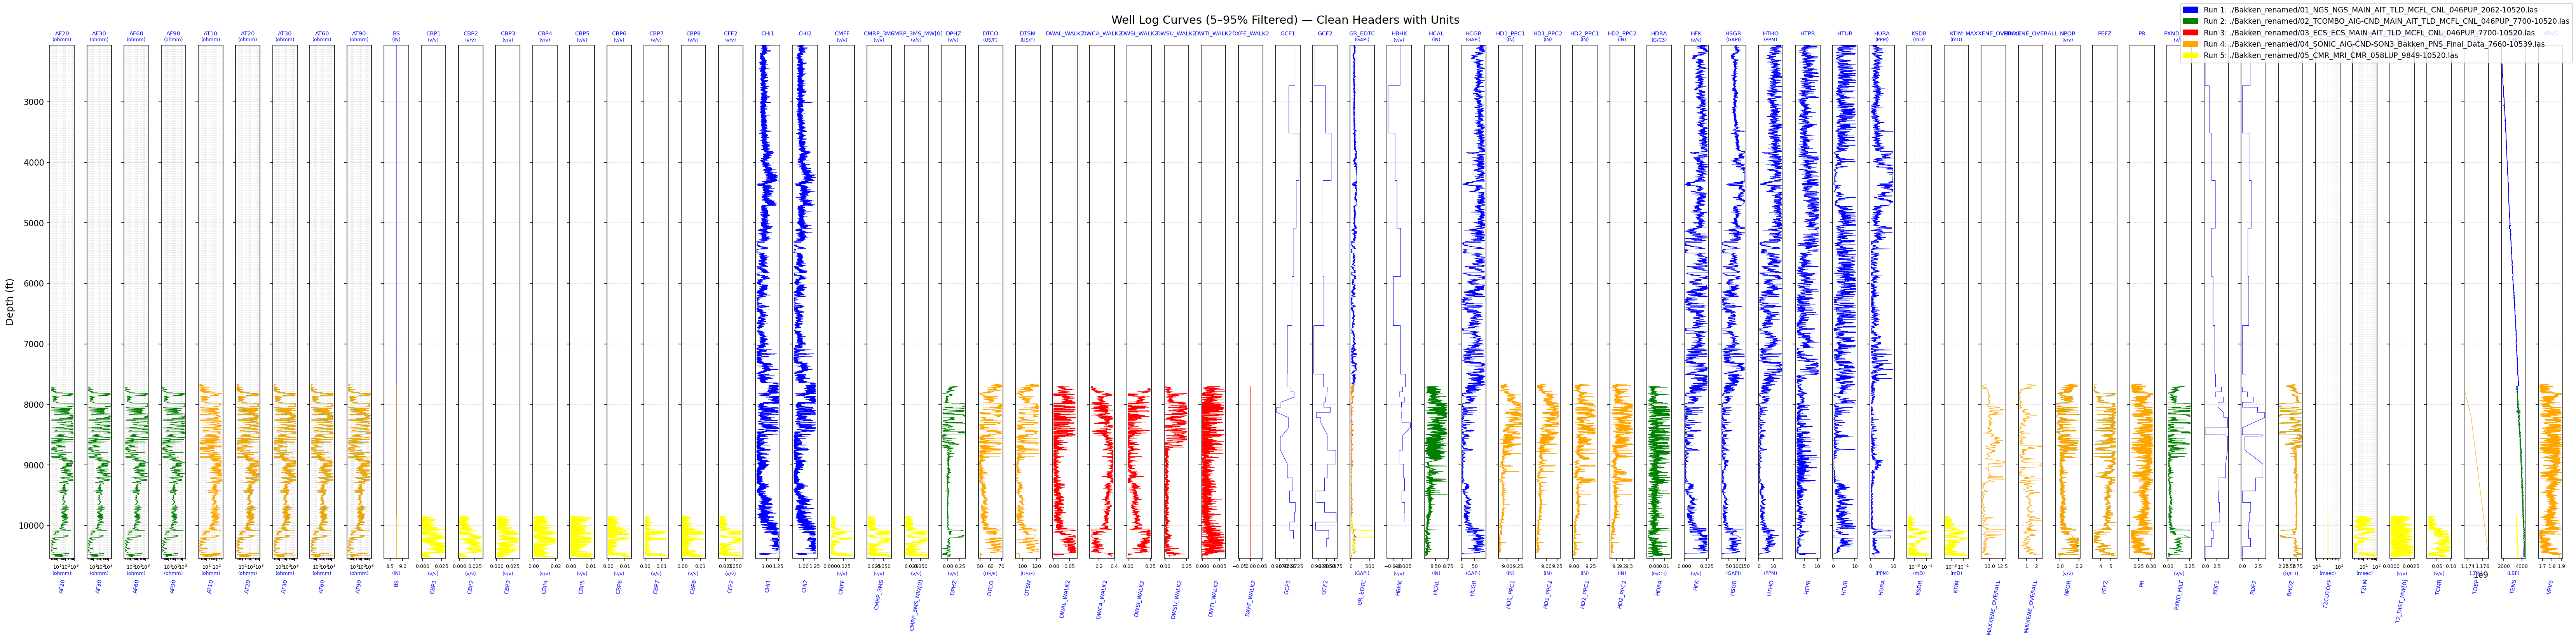

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import lasio
import matplotlib.patches as mpatches
from io import BytesIO
import base64
from IPython.display import display, HTML

# -------------------------------------------------
# Helpers
# -------------------------------------------------
def canonical_unit(u: str) -> str:
    if not u:
        return ""
    su = u.strip().upper().replace(" ", "")

    if su in ["OHMM", "OHM.M", "OHM-M", "OHM/M", "OHM*M", "OHM·M"]:
        return "ohmm"
    if su in ["MD", "MD."]:
        return "mD"
    if su in ["US/FT"]:
        return "µs/ft"
    if su in ["G/CM3", "G/CC"]:
        return "g/cc"
    if su in ["MS", "MSEC"]:
        return "msec"
    if su in ["CFCF", "V/V", "VV"]:
        return "v/v"
        
    return u.strip()


def get_curve_unit(curve, las_data):
    units = []
    for _, _, df, units_map in las_data:
        if curve in df.columns:
            u = canonical_unit(units_map.get(curve, ""))
            if u:
                units.append(u)

    units = sorted(set(units))
    if len(units) == 1:
        return units[0]
    if len(units) > 1:
        return "mixed"
    return ""


def is_log_curve(curve, las_data):
    for _, _, df, units_map in las_data:
        if curve in df.columns:
            if canonical_unit(units_map.get(curve, "")) in ["ohmm", "mD", "msec"]:
                return True
    return False


def safe_log_mask(x):
    return np.isfinite(x) & (x > 0)


# -------------------------------------------------
# Read LAS files
# -------------------------------------------------
def get_filtered_well_data(file):
    las = lasio.read(file)
    df = las.df()
    df.index = las["DEPT"]

    units_map = {c.mnemonic: (c.unit or "") for c in las.curves}

    lo = df.quantile(0.05)
    hi = df.quantile(0.95)

    df_filt = df.apply(
        lambda c: c.where((c >= lo[c.name]) & (c <= hi[c.name]), np.nan),
        axis=0
    )

    wellname = las.well.WELL.value if "WELL" in las.well else file
    return wellname, df.index, df_filt, units_map


las_data = [get_filtered_well_data(f) for f in las_files]

all_curves = sorted(set().union(*[df.columns for _, _, df, _ in las_data]))

min_depth = min(np.nanmin(d) for _, d, _, _ in las_data)
max_depth = max(np.nanmax(d) for _, d, _, _ in las_data)

# -------------------------------------------------
# Plot setup
# -------------------------------------------------
colors = ["blue", "green", "red", "orange", "yellow", "black", "purple", "cyan", "gray", "violet", "limegreen", "teal"]
colors = (colors * 10)[:len(las_files)]

fig, axes = plt.subplots(
    ncols=len(all_curves),
    figsize=(0.65 * len(all_curves), 11),
    sharey=True
)

if len(all_curves) == 1:
    axes = [axes]

legend_handles = [
    mpatches.Patch(color=colors[i], label=f"Run {i+1}: {las_files[i]}")
    for i in range(len(las_files))
]

# -------------------------------------------------
# Plot loop
# -------------------------------------------------
for i, curve in enumerate(all_curves):
    ax = axes[i]

    unit = get_curve_unit(curve, las_data)
    log_scale = is_log_curve(curve, las_data)

    # ---- Top header
    ax.set_title(curve, fontsize=7, color="blue", pad=12)

    # Units below title
    if unit:
        ax.text(
            0.5, 1.015,
            f"({unit})",
            transform=ax.transAxes,
            ha="center",
            va="top",
            fontsize=6,
            color="blue"
        )

    # ---- Plot runs
    for run_i, (_, depth, df, _) in enumerate(las_data):
        if curve not in df.columns:
            continue

        x = df[curve].to_numpy(float)
        y = np.asarray(depth, float)

        if log_scale:
            m = safe_log_mask(x) & np.isfinite(y)
        else:
            m = np.isfinite(x) & np.isfinite(y)

        if np.any(m):
            ax.plot(x[m], y[m], lw=0.5, color=colors[run_i])

    # ---- Axes formatting
    ax.set_ylim(max_depth, min_depth)
    ax.tick_params(axis="x", labelsize=6)
    ax.grid(axis="y", linestyle="--", alpha=0.4)

    if log_scale:
        ax.set_xscale("log")
        ax.grid(True, which="both", axis="x", linestyle=":", alpha=0.3)

    # ---- Bottom curve label (tilted)
    ax.set_xlabel("")
    ax.text(
        0.5, -0.04,
        curve,
        transform=ax.transAxes,
        fontsize=7,
        rotation=80,
        ha="center",   # key: center at x=0.5
        color="blue",
        va="top",
    )
    # Units below curve label
    if unit:
        ax.text(
            0.5, -0.025,
            f"({unit})",
            transform=ax.transAxes,
            ha="center",
            va="top",
            fontsize=6,
            color="blue"
        )

# -------------------------------------------------
# Global formatting
# -------------------------------------------------
axes[0].set_ylabel("Depth (ft)", fontsize=12)
fig.suptitle(
    "Well Log Curves (5–95% Filtered) — Clean Headers with Units",
    fontsize=14
)
fig.legend(handles=legend_handles, loc="upper right", fontsize=9)

plt.tight_layout(w_pad=0.2)

# -------------------------------------------------
# Save + embed
# -------------------------------------------------
buf = BytesIO()
fig.savefig(buf, dpi=150, bbox_inches="tight")
buf.seek(0)

img_b64 = base64.b64encode(buf.read()).decode()
plt.close(fig)

display(HTML(f"""
<div style="overflow-x:auto; border:1px solid #aaa; padding:10px;">
<img src="data:image/png;base64,{img_b64}" style="max-width:none;">
</div>
"""))


## View key logs marked by our Showing Run Numbers:

2062.0
10539.0


Run                                               File  Run Top (ft)  \
0    1  ./Bakken_renamed/01_NGS_NGS_MAIN_AIT_TLD_MCFL_...        2062.0   
1    2  ./Bakken_renamed/02_TCOMBO_AIG-CND_MAIN_AIT_TL...        7700.0   
2    3  ./Bakken_renamed/03_ECS_ECS_MAIN_AIT_TLD_MCFL_...        7700.0   
3    4  ./Bakken_renamed/04_SONIC_AIG-CND-SON3_Bakken_...        7660.0   
4    5  ./Bakken_renamed/05_CMR_MRI_CMR_058LUP_9849-10...        9849.0   

   Run Base (ft)  Plot Window Top (ft)  Plot Window Base (ft)  \
0        10520.0                2062.0                10539.0   
1        10520.0                2062.0                10539.0   
2        10520.0                2062.0                10539.0   
3        10539.0                2062.0                10539.0   
4        10520.0                2062.0                10539.0   

                                    Available Curves  
0  BS, CHI1, CHI2, DEPT, GCF1, GCF2, GR_EDTC, HBH...  
1  AF20, AF30, AF60, AF90, AT20, AT30, AT60, AT90...  
2  DEPT, DWAL_WALK2, DWCA_WALK2, DWSI_WALK2, DWSU...  
3  AT10, AT20, AT30, AT60, AT90, BS, DEPT, DTCO, ...  
4  BS, CBP1, CBP2, CBP3, CBP4, CBP5, CBP6, CBP7, ...

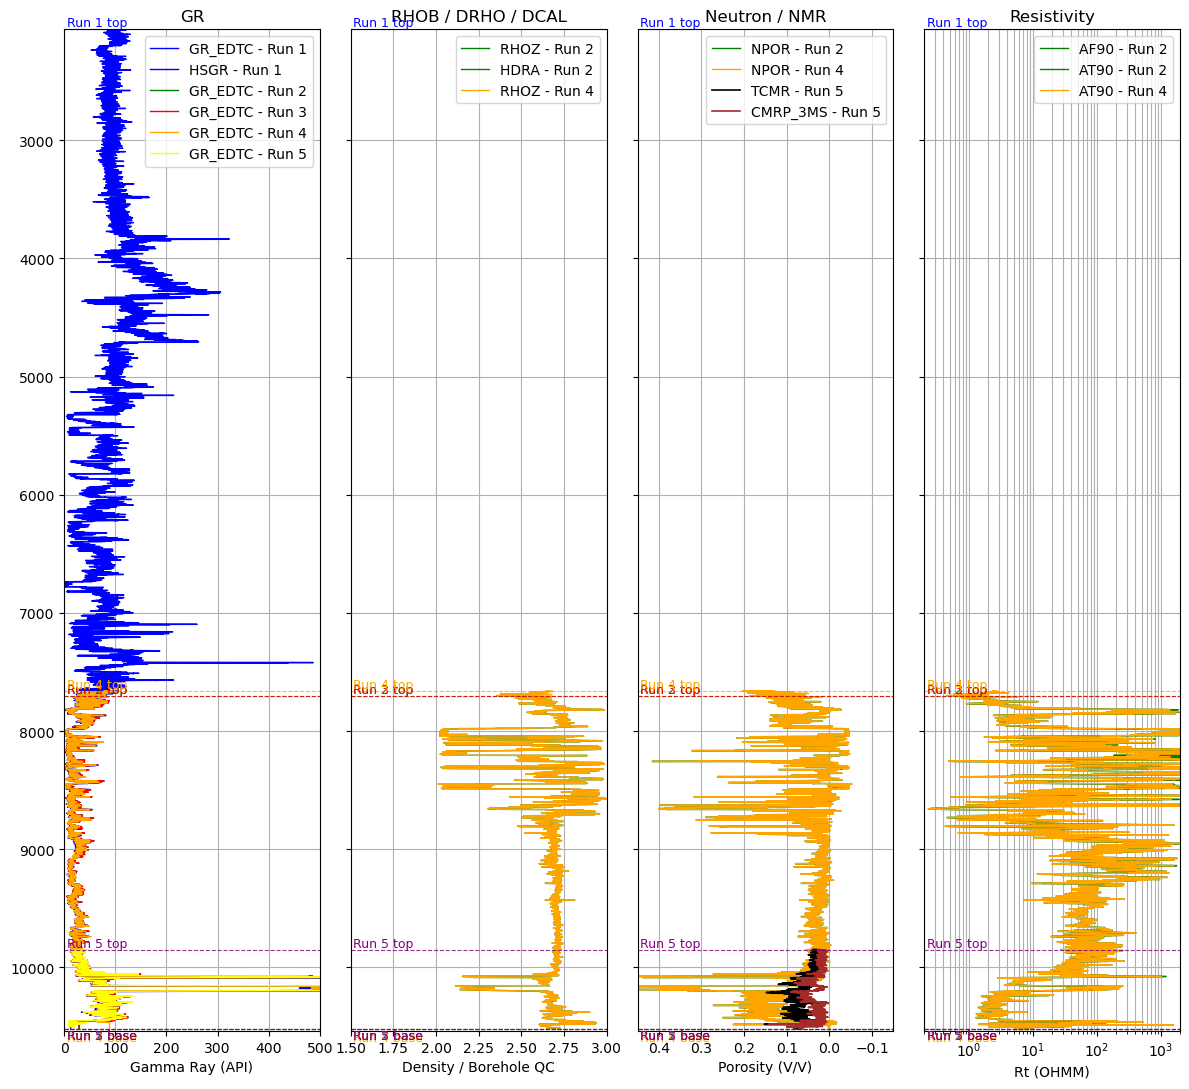

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import lasio

# Global depth range across runs
min_depth = min(np.nanmin(depth) for _, depth, _, _ in las_data)
max_depth = max(np.nanmax(depth) for _, depth, _, _ in las_data)

print(min_depth)
print(max_depth)

# -----------------------------
# 1) Define curve families
# -----------------------------
curve_families = {
    "GR":      ["GR_EDTC","GR", "HSGR", "SGR"],
    "RHOB":    ["RHOB", "RHOZ"],
    "DRHO":    ["DRHO", "HDRA", "HDRH", "DROH", "DRH", "RHOC"],
    "BS":      ["BS", "BITSIZE", "BIT", "BIT_SIZE"],
    "CALI":    ["HD1_PPC1", "HD2_PPC1", "CALI", "HCAL", "C1", "C2", "CAL", "CALIPER"],
    "DCAL":    ["DCAL", "DCALI", "D_CAL", "CALD"],
    "TNPH":    ["TNPH", "NPHI", "NPOR", "CNL"],
    "POR_NMR": ["TCMR", "CMRP_3MS", "BFV"],
    "RT":      ["RT", "AF90", "AT90", "AO90"],
    "PERM":    ["PERM", "K", "KH", "KVERT", "KMD", "PERM_MD", "PERM_M", "KLOGH", "KLOG"],
}

curve_style = {
    "RHOB": {"color": "black", "linewidth": 1.2},
    "DRHO": {"color": "red",   "linewidth": 1.0},
    "DCAL": {"color": "purple","linewidth": 1.0},

    "TCMR":     {"color": "black", "linewidth": 1.2},
    "CMRP_3MS": {"color": "brown", "linewidth": 1.2},
    "BFV":      {"color": "blue",  "linewidth": 1.2},
}

fill_between = {
    "track": "POR_NMR",
    "left": "TCMR",
    "right": "BFV",
    "color": "yellow",
    "alpha": 0.35
}

family_plot_config = {
    "RT":   {"xscale": "log"},
    "PERM": {"xscale": "log"},
}

# -----------------------------
# 2) Read LAS files
# -----------------------------
logs = []
for file in las_files:
    las = lasio.read(file)

    depth = np.asarray(las["DEPT"], float)
    depth = depth[np.isfinite(depth)]



    
    top_depth = min_depth
    bottom_depth = max_depth



    
    curve_info = {
        curve.mnemonic: (las[curve.mnemonic].min(), las[curve.mnemonic].max())
        for curve in las.curves
    }

    data = {
        "file": file,
        "depth": las["DEPT"],
        "run_top": float(np.nanmin(depth)) if depth.size else np.nan,
        "run_base": float(np.nanmax(depth)) if depth.size else np.nan,
        #"depth_min": top_depth,
        #"depth_max": bottom_depth,
        "depth_min": min_depth,
        "depth_max": max_depth,
        "curves": curve_info
    }

    needed = set(mn for fam in curve_families.values() for mn in fam)
    for mn in needed:
        data[mn] = las[mn] if mn in las.curves else None

    logs.append(data)

# -----------------------------
# 3) Inventory table with run start/stop
# -----------------------------
df_inventory = pd.DataFrame([
    {
        "Run": i + 1,
        "File": log["file"],
        "Run Top (ft)": log["run_top"],
        "Run Base (ft)": log["run_base"],
        #"Plot Window Top (ft)": log["depth_min"],
        #"Plot Window Base (ft)": log["depth_max"],
        "Plot Window Top (ft)": min_depth,
        "Plot Window Base (ft)": max_depth,
        "Available Curves": ", ".join(sorted(log["curves"].keys()))
    }
    for i, log in enumerate(logs)
])

display(df_inventory)

# -----------------------------
# 4) Helpers
# -----------------------------
def plot_track(ax, track_keys, xlim=None, xscale=None, xlabel="", title=""):
    #colors = ["blue", "green", "red", "orange", "purple", "cyan", "gray", "teal"]
    colors = ["blue", "green", "red", "orange", "yellow", "black","purple","cyan","gray","violet","limegreen","teal"]


    if isinstance(track_keys, str):
        track_keys = [track_keys]

    if xscale is None:
        for k in track_keys:
            cfg = family_plot_config.get(k, {})
            if "xscale" in cfg:
                xscale = cfg["xscale"]
                break

    mnemonics = []
    for key in track_keys:
        mnemonics.extend(curve_families.get(key, []))

    for i, log in enumerate(logs):
        depth = np.asarray(log["depth"], float)

        for mn in mnemonics:
            if log.get(mn) is None:
                continue

            x = np.asarray(log[mn], float)

            if xscale == "log":
                m = (
                    np.isfinite(depth) &
                    np.isfinite(x) &
                    (x > 0) &
                    (depth >= top_depth) &
                    (depth <= bottom_depth)
                )
            else:
                m = (
                    np.isfinite(depth) &
                    np.isfinite(x) &
                    (depth >= top_depth) &
                    (depth <= bottom_depth)
                )

            if not np.any(m):
                continue

            style = {"color": colors[i % len(colors)], "linewidth": 1.0}
            if mn in curve_style:
                style.update(curve_style[mn])

            ax.plot(x[m], depth[m], label=f"{mn} - Run {i+1}", **style)

    ax.set_ylim(top_depth, bottom_depth)
    ax.invert_yaxis()
    if xlim is not None:
        ax.set_xlim(*xlim)
    if xscale is not None:
        ax.set_xscale(xscale)
    ax.set_xlabel(xlabel)
    ax.set_title(title)
    ax.grid(True, which="both")
    ax.legend()

def add_fill_between(ax):
    left = fill_between["left"]
    right = fill_between["right"]

    for log in logs:
        if log.get(left) is None or log.get(right) is None:
            continue

        depth = np.asarray(log["depth"], float)
        x1 = np.asarray(log[left], float)
        x2 = np.asarray(log[right], float)

        m = (
            (depth >= top_depth) &
            (depth <= bottom_depth) &
            np.isfinite(x1) &
            np.isfinite(x2)
        )

        if np.any(m):
            ax.fill_betweenx(
                depth[m],
                x1[m],
                x2[m],
                color=fill_between["color"],
                alpha=fill_between["alpha"]
            )

def add_run_markers(ax):
    """
    Draw run top/base lines for each LAS run and label them.
    Uses the same color cycle as plotting so it visually matches.
    """
    colors = ["blue", "green", "red", "orange", "purple", "cyan", "gray", "teal"]

    # Put labels near the left edge of the track in axes coordinates
    x_text = 0.01

    for i, log in enumerate(logs):
        c = colors[i % len(colors)]
        rt = log.get("run_top", np.nan)
        rb = log.get("run_base", np.nan)

        # Only draw if within plotting window
        if np.isfinite(rt) and (top_depth <= rt <= bottom_depth):
            ax.axhline(rt, color=c, linewidth=0.8, linestyle="--", alpha=0.8)
            ax.text(x_text, rt, f"Run {i+1} top", transform=ax.get_yaxis_transform(),
                    va="bottom", ha="left", fontsize=9, color=c)

        if np.isfinite(rb) and (top_depth <= rb <= bottom_depth):
            ax.axhline(rb, color=c, linewidth=0.8, linestyle="--", alpha=0.8)
            ax.text(x_text, rb, f"Run {i+1} base", transform=ax.get_yaxis_transform(),
                    va="top", ha="left", fontsize=9, color=c)

# -----------------------------
# 5) Plot function
# -----------------------------
def plot_well_logs():
    fig, axes = plt.subplots(1, 4, figsize=(12, 11), sharey=True)

    # Track 1: GR
    plot_track(
        axes[0],
        "GR",
        xlim=(0, 500),
        xlabel="Gamma Ray (API)",
        title="GR"
    )
    add_run_markers(axes[0])

    # Track 2: Density + DRHO + DCAL
    plot_track(
        axes[1],
        ["RHOB", "DRHO", "DCAL"],
        xlim=(1.5, 3.0),
        xlabel="Density / Borehole QC",
        title="RHOB / DRHO / DCAL"
    )
    add_run_markers(axes[1])

    # Track 3: Neutron + NMR
    plot_track(
        axes[2],
        ["TNPH", "POR_NMR"],
        xlim=(0.45, -0.15),
        xlabel="Porosity (V/V)",
        title="Neutron / NMR"
    )
    add_fill_between(axes[2])
    add_run_markers(axes[2])

    # Track 4: Resistivity (log10)
    plot_track(
        axes[3],
        "RT",
        xlim=(0.2, 2000),
        xlabel="Rt (OHMM)",
        title="Resistivity"
    )
    add_run_markers(axes[3])

    plt.tight_layout()
    plt.show()

# Execute
plot_well_logs()

#print("Run",i)

In [6]:
# ===========================================================
# Build combined_units_map from LAS files (merged view)
# ===========================================================

import lasio

combined_units_map = {}

for path in las_files:
    las = lasio.read(path)
    for c in las.curves:
        mn = c.mnemonic.strip().upper()
        if mn not in combined_units_map:
            combined_units_map[mn] = (c.unit or "").strip()

print("Units map size:", len(combined_units_map))


Units map size: 69


---
---
# **Manual depth shift of each run to QC the depth shift results to run0 and Merge all Co-logged data.**


First we have a list of all las_files. What we should do next is use run 0 as the base depth file and then find shift values or run 1, 2, .... in comparison to run 0 based on our GR shifts: 

        base_gr_list = curve_families.get("GR", ["GR", "HSGR", "SGR"]) 
        gr_candidates = ["GR_EDTC"] + [c for c in base_gr_list if c != "GR_EDTC"] 
        
and create a shift_map and then shift run1, 2, 3.... to run 0 and create a merged file for all well logs at run 0 depth.



# **depth_correction_model**:

## Interactive Depth Alignment Using Anchor-Based Fitting

This panel is used to **align each logging run to Run 0** using human-validated tie points (“anchors”).
The method applies **controlled stretch and shift**, not free shifting, and preserves bed order and thickness.

### Goal

For each run:

* verify depth alignment against Run 0 using GR
* add anchor points where needed
* fit a smooth depth-correction curve to those anchors
* use the corrected depth for merging all curves

---

## Step-by-Step Workflow (Per Run)

###  1 Select the Run

Use the **Compare** dropdown to select the run you want to align to Run 0.

The plot shows:

* Run 0 GR (base)
* Selected run GR (shifted/warped preview)

---

### 2️ Set the Window and Walk Down the Well

* **Zoom Top** → top depth of the window
* **Feet to Display** → window height (typical values: 300 ft or 100 ft)

Use **Up / Down buttons** to walk the window up or down the well.

---

### 3️ Adjust Shift Using Slider

Use the **Shift (ft)** slider to vertically align GR features between:

* Run 0 and
* the selected run

This is a **preview adjustment only** until you save it as an anchor.

> Tip: After anchors exist, the slider adjusts the current anchor-fit locally (preview delta),
> so you can always fine-tune alignment at each window.

---

### 4️ Add an Anchor (Very Important)

When the curves are well aligned in the current window:

- Click **Add / Update Anchor**

This stores:

* window center depth
* current shift value

as a permanent tie point for this run.

#### When to add anchors:

* always add one near the top (even if shift = 0)
* add more whenever you see drift while walking down

Most runs only need **1 anchor** (bulk shift).
Some runs may need **several anchors** (stretch correction).

---

### 5️ Walk Down and Repeat

Continue stepping down the well:

* if alignment stays good → no action needed
* if drift appears → adjust slider → **Add / Update Anchor**

Repeat until you reach the bottom of the run.

---

### 6️ Fit Data to Anchors (Finalize Depth Correction)

When finished with that run:

- Click **Fit Data to Anchors**

This builds a smooth depth-correction function that:

* exactly honors your anchors
* smoothly stretches/compresses between them

This correction will be used to shift **all curves in the run**, not just GR.

---

### 7️ Move to the Next Run

Select the next run in the dropdown and repeat steps 1–6.

Each run is aligned independently to Run 0.

---

##  What Gets Stored

For each run:

* **Anchors:** list of depth–shift tie points you created
* **Shift curve:** smooth depth correction function derived from anchors

These are later used to:

* warp all curves to Run 0 depth
* perform clean merges
* run downstream petrophysical models

---

##  Important Notes

* This is **not automatic warping**.
  All depth corrections are based on **human-validated anchors**.
* Bed order and thickness are preserved.
* Null or flat data do not influence alignment because you control where anchors are placed.
* If you only add one anchor, the run is treated as a **constant shift**.

---

##  Recommended Practice

| Situation              | Recommendation                                    |
| ---------------------- | ------------------------------------------------- |
| Clean run, no drift    | Add 1 anchor near top                             |
| Slight drift           | Add 2–3 anchors                                   |
| Major depth distortion | Use shorter windows (100 ft) and add more anchors |
| Flat GR section        | Skip anchoring until character returns            |

---

##  Next Step After This Panel

Once all runs are fitted:

* depth_correction_model dataframes are created
* merging and QC plots should be run using **depth_correction_model data**, not raw runs

This ensures all curves are vertically consistent before petrophysical analysis.


# **depth_correction_model**:

In [7]:
# ===========================================================
# CO-LOGGED ALIGNMENT (RAW): SHIFT RUNS TO RUN 0 USING GR, THEN MERGE
# - NO QC. NO FLAT/NEAR-CONSTANT LOGIC. READ + ALIGN + MERGE ONLY.
#
# Inputs required:
#   - las_files: list[str]  (ordered; las_files[0] is run 0)
#   - curve_families: dict  (family -> list of mnemonics)
#
# Outputs:
#   - run_dfs: list[pd.DataFrame]        raw per-run dataframes (depth index, increasing)
#   - shift_map: dict[int, float]        {run_i: shift_ft} (positive => move run_i DOWN/deeper)
#   - aligned_run_dfs: list[pd.DataFrame] shifted to run0 depth reference
#   - merged_df: pd.DataFrame            union of curves on run0 depth grid, run0 preferred
#   - gr_used: dict[int, str|None]       which GR curve used per run
#   - quality_map: dict[int, dict]       correlation quality per run
# ===========================================================

import numpy as np
import pandas as pd
import lasio






# -----------------------------
# 0) Safety: must have las_files + curve_families
# -----------------------------
if "las_files" not in globals() or not isinstance(las_files, (list, tuple)) or len(las_files) < 1:
    raise ValueError("las_files must exist as a non-empty list of LAS file paths (run 0 must be las_files[0]).")

if "curve_families" not in globals() or not isinstance(curve_families, dict):
    raise ValueError("curve_families must exist as a dict: family -> list of mnemonics.")

# -----------------------------
# 1) RAW read LAS into DataFrames (no QC)
#    - normalize curve mnemonics to UPPER + strip
#    - sort depth increasing (many LAS files are deep->shallow)
# -----------------------------
def read_las_raw_df(path: str) -> pd.DataFrame:
    las = lasio.read(path)
    df = las.df()                         # index = DEPT
    df.index = df.index.astype(float)
    df = df.sort_index(ascending=True)    # make depth increasing
    df.columns = pd.Index([str(c).strip().upper() for c in df.columns])
    return df

run_dfs = [read_las_raw_df(p) for p in las_files]

#print(run_dfs)

# -----------------------------
# 2) Candidate GR curve list (your logic)
# -----------------------------
curve_families = {k: [str(c).strip().upper() for c in v] for k, v in curve_families.items()}

base_gr_list = curve_families.get("GR", ["GR", "HSGR", "SGR"])
gr_candidates = ["GR_EDTC"] + [c for c in base_gr_list if c != "GR_EDTC"]

def first_present(cols, candidates):
    s = set(cols)
    for c in candidates:
        if c in s:
            return c
    return None

# -----------------------------
# 3) Helpers: robust normalize + shift estimator via cross-correlation
# -----------------------------
# ===========================================================
# Helper: detect resistivity curves by OHMM-like units
# ===========================================================

def is_ohmm_curve(curve_name: str, units_map: dict) -> bool:
    """
    Return True if curve units are OHMM-like (resistivity),
    based on LAS units strings.
    """
    if units_map is None:
        return False

    u = units_map.get(curve_name, "")
    if u is None:
        return False

    u = str(u).strip().upper().replace(" ", "").replace("-", "")
    return any(tok in u for tok in ["OHMM", "OHM.M", "OHMM", "OHMM", "OHM"])



def robust_z(x):
    x = np.asarray(x, dtype=float)
    med = np.nanmedian(x)
    mad = np.nanmedian(np.abs(x - med))
    if not np.isfinite(mad) or mad < 1e-12:
        sd = np.nanstd(x)
        if not np.isfinite(sd) or sd < 1e-12:
            return x * np.nan
        return (x - np.nanmean(x)) / sd
    return (x - med) / (1.4826 * mad)

def interp_valid(xd, yd, xnew):
    xd = np.asarray(xd, dtype=float)
    yd = np.asarray(yd, dtype=float)
    m = np.isfinite(xd) & np.isfinite(yd)
    if m.sum() < 5:
        return np.full_like(xnew, np.nan, dtype=float)
    return np.interp(xnew, xd[m], yd[m], left=np.nan, right=np.nan)

def smooth_boxcar(x, w):
    if w is None or w < 3:
        return x
    x = np.asarray(x, dtype=float).copy()
    idx = np.arange(len(x))
    good = np.isfinite(x)
    if good.sum() < 5:
        return x
    # fill NaNs by linear interpolation just for smoothing
    x[~good] = np.interp(idx[~good], idx[good], x[good])
    k = np.ones(w) / w
    return np.convolve(x, k, mode="same")

def estimate_shift_from_gr(
    df_base: pd.DataFrame,
    df_mov:  pd.DataFrame,
    base_gr: str,
    mov_gr:  str,
    max_shift_ft: float = 40.0,
    min_overlap_ft: float = 200.0,
    min_valid_frac: float = 0.65,
    smooth_window_ft: float = 10.0,
    step_ft: float | None = None,
):
    """
    Returns (shift_ft, quality_dict)
    Sign: shift_ft > 0 => move df_mov DOWN (deeper): new_depth = old_depth + shift_ft
    """

    z0 = df_base.index.to_numpy(dtype=float)
    z1 = df_mov.index.to_numpy(dtype=float)

    # infer step from base if not provided
    if step_ft is None:
        d = np.diff(z0)
        d = d[np.isfinite(d) & (d > 0)]
        step_ft = float(np.median(d)) if len(d) else 0.5

    top = max(float(np.nanmin(z0)), float(np.nanmin(z1)))
    bot = min(float(np.nanmax(z0)), float(np.nanmax(z1)))
    overlap_ft = bot - top
    if not np.isfinite(overlap_ft) or overlap_ft < min_overlap_ft:
        return np.nan, {"ok": False, "reason": f"insufficient overlap ({overlap_ft:.1f} ft)"}

    grid = np.arange(top, bot + step_ft, step_ft)

    b = interp_valid(z0, df_base[base_gr].astype(float).to_numpy(), grid)
    m = interp_valid(z1, df_mov[mov_gr].astype(float).to_numpy(), grid)

    valid = np.isfinite(b) & np.isfinite(m)
    valid_frac = float(valid.mean()) if len(valid) else 0.0
    if valid_frac < min_valid_frac:
        return np.nan, {"ok": False, "reason": f"too few paired GR samples (valid_frac={valid_frac:.2f})"}

    b = robust_z(b)
    m = robust_z(m)

    w = max(1, int(round(smooth_window_ft / step_ft))) if smooth_window_ft else 1
    b = smooth_boxcar(b, w)
    m = smooth_boxcar(m, w)

    good = np.isfinite(b) & np.isfinite(m)
    if good.sum() < 50:
        return np.nan, {"ok": False, "reason": "not enough finite samples after preprocessing"}

    b2 = b[good] - np.mean(b[good])
    m2 = m[good] - np.mean(m[good])

    corr = np.correlate(m2, b2, mode="full")
    lags = np.arange(-len(b2) + 1, len(m2))

    max_lag = int(round(max_shift_ft / step_ft))
    keep = (lags >= -max_lag) & (lags <= max_lag)
    corr_k = corr[keep]
    lags_k = lags[keep]

    if len(corr_k) == 0:
        return np.nan, {"ok": False, "reason": "no correlation lags available"}

    best = int(np.argmax(corr_k))
    best_lag = int(lags_k[best])
    shift_ft = float(best_lag * step_ft)

    denom = (np.linalg.norm(b2) * np.linalg.norm(m2))
    peak_norm = float(corr_k[best] / denom) if denom > 0 else np.nan

    return shift_ft, {
        "ok": True,
        "overlap_ft": float(overlap_ft),
        "step_ft": float(step_ft),
        "valid_frac": float(valid_frac),
        "best_lag_samples": int(best_lag),
        "peak_norm": float(peak_norm),
    }

def shift_df_depth_old(df: pd.DataFrame, shift_ft: float) -> pd.DataFrame:
    out = df.copy()
    out.index = out.index.astype(float) + (0.0 if (not np.isfinite(shift_ft)) else float(shift_ft))
    return out.sort_index()

def shift_df_depth(df: pd.DataFrame, shift_ft: float) -> pd.DataFrame:
    out = df.copy()
    out.index = out.index.astype(float) + float(shift_ft)
    return out.sort_index()



In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display, clear_output

# =======================================================
# QC reset (safe) + preserve auto snapshot
# =======================================================
if "shift_map" in globals() and isinstance(shift_map, dict):
    shift_map_auto = dict(shift_map)
    shift_map.clear()
else:
    shift_map_auto = {}

if "computed_shift_map" in globals() and isinstance(computed_shift_map, dict):
    computed_shift_map.clear()

if "manual_shift_map" in globals() and isinstance(manual_shift_map, dict):
    manual_shift_map.clear()

if "shift_slider" in globals():
    shift_slider.value = 0.0

print("QC reset: cleared computed + manual shifts and reset slider.")
print("Preserved auto shifts in shift_map_auto.")


# ===========================================================
# REQUIRED: get_run_df(i), get_run_top(i)
# ===========================================================
def get_run_df(i: int) -> pd.DataFrame:
    if "run_dfs" in globals() and isinstance(run_dfs, (list, tuple)) and len(run_dfs) > i:
        if isinstance(run_dfs[i], pd.DataFrame):
            return run_dfs[i]
    logi = logs[i]
    if isinstance(logi, pd.DataFrame):
        return logi
    if isinstance(logi, dict):
        for k in ["df_log", "df_filtered", "df_raw", "df_run", "data", "df"]:
            if k in logi and isinstance(logi[k], pd.DataFrame):
                return logi[k]
    raise KeyError(f"Could not find a run DataFrame for run {i}.")

def get_run_top(i: int) -> float:
    if isinstance(logs[i], dict) and "run_top" in logs[i] and np.isfinite(logs[i]["run_top"]):
        return float(logs[i]["run_top"])
    df = get_run_df(i).sort_index()
    return float(df.index.min())

# ===========================================================
# SHIFT MAPS (computed + anchors + built warp model)
# ===========================================================
def _find_computed_shift_map():
    for name in ["shift_map", "computed_shift_map", "auto_shift_map", "computed_shifts"]:
        if name in globals() and isinstance(globals()[name], dict):
            return globals()[name], name
    return {}, None

computed_shift_map, computed_shift_map_name = _find_computed_shift_map()

# Anchors: run_k -> list of (z_center, slider_shift_ft)
anchor_map = {}          # persistent
depth_correction_model = {}      # run_k -> {"anchors": DataFrame, "shift_curve": Series on run depth}

# ===========================================================
# Curve pick + warp helpers
# ===========================================================
gr_candidates = ["GR_EDTC", "HSGR", "GR", "SGR", "HGR"]

def pick_common_gr(df0: pd.DataFrame, dfk: pd.DataFrame):
    for c in gr_candidates:
        if (c in df0.columns) and (c in dfk.columns):
            return c
    return None

def _anchors_df(run_k: int) -> pd.DataFrame:
    """Return anchors as a sorted DataFrame with columns: z, shift (slider units)."""
    pts = anchor_map.get(run_k, [])
    if not pts:
        return pd.DataFrame(columns=["z", "shift"])
    df = pd.DataFrame(pts, columns=["z", "shift"]).dropna()
    df["z"] = df["z"].astype(float)
    df["shift"] = df["shift"].astype(float)
    df = df.sort_values("z").reset_index(drop=True)
    # de-dup by z (keep last)
    df = df.drop_duplicates(subset=["z"], keep="last").reset_index(drop=True)
    return df

def _build_shift_function(run_k: int):
    """
    Build a callable shift(z) in slider units using anchors.
    - If SciPy available: PCHIP (shape-preserving cubic)
    - Else: linear interpolation
    Outside range: clamp to end values.
    """
    adf = _anchors_df(run_k)
    if len(adf) == 0:
        # fall back to computed constant
        c = float(computed_shift_map.get(run_k, 0.0))
        return lambda z: np.full_like(np.asarray(z, dtype=float), c, dtype=float), adf

    z = adf["z"].values
    s = adf["shift"].values

    # Single anchor => constant
    if len(adf) == 1:
        c = float(s[0])
        return lambda zz: np.full_like(np.asarray(zz, dtype=float), c, dtype=float), adf

    try:
        from scipy.interpolate import PchipInterpolator
        f = PchipInterpolator(z, s, extrapolate=True)
        def shift_fn(zz):
            zz = np.asarray(zz, dtype=float)
            out = f(zz)
            # clamp instead of wild extrapolation
            out = np.where(zz < z[0], s[0], out)
            out = np.where(zz > z[-1], s[-1], out)
            return out.astype(float)
        return shift_fn, adf
    except Exception:
        # linear interp
        def shift_fn(zz):
            zz = np.asarray(zz, dtype=float)
            out = np.interp(zz, z, s)
            # np.interp clamps by default
            return out.astype(float)
        return shift_fn, adf

def _compute_shift_curve_on_run_depth(run_k: int) -> pd.Series:
    """Compute shift(z) (slider units) on the native run depth index."""
    dfk = get_run_df(run_k).sort_index()
    depth = dfk.index.astype(float).values
    shift_fn, adf = _build_shift_function(run_k)
    s = shift_fn(depth)
    return pd.Series(s, index=dfk.index.astype(float), name="shift_slider_units")

def _warp_depths(depth: np.ndarray, shift_slider_units: np.ndarray) -> np.ndarray:
    """
    Convert slider shift to applied shift:
      applied = -slider
      warped_depth = depth + applied
    """
    depth = np.asarray(depth, dtype=float)
    shift_slider_units = np.asarray(shift_slider_units, dtype=float)
    applied = -shift_slider_units
    return depth + applied

# ===========================================================
# Plot (warped overlay)
# ===========================================================
def plot_gr_overlay_window(run_k: int, slider_shift_ft: float, z_top: float, feet_to_display: float,
                           show_run_top_marker=True, show_warp_curve=False):
    df0 = get_run_df(0).sort_index()
    dfk = get_run_df(run_k).sort_index()

    mn = pick_common_gr(df0, dfk)
    if mn is None:
        raise ValueError(f"No common GR curve between Run 0 and Run {run_k}. Tried: {gr_candidates}")

    z_top = float(z_top)
    z_base = z_top + float(feet_to_display)

    # --- build shift curve from anchors (if any); otherwise use slider as "preview anchor"
    # Preview rule: if there are NO anchors yet for this run, treat current slider as a constant.
    zc = float(_window_center())

    if len(_anchors_df(run_k)) == 0:
        # No anchors: slider is the constant shift everywhere
        shift_fn = lambda zz: np.full_like(np.asarray(zz, dtype=float), float(slider_shift_ft), dtype=float)
        mode_txt = "Preview: constant shift (no anchors yet)"
    else:
        # Anchors exist: slider is an *absolute desired shift at window center*
        base_fn, _ = _build_shift_function(run_k)
        base_at_center = float(base_fn(zc))
        preview_delta = float(slider_shift_ft) - base_at_center
    
        shift_fn = lambda zz: base_fn(zz) + preview_delta
        mode_txt = f"Warp: anchors + preview delta (center base={base_at_center:+.2f}, delta={preview_delta:+.2f})"

    # Run0 slice
    A = df0.loc[(df0.index >= z_top) & (df0.index <= z_base), mn].astype(float)

    # RunK: warp depths using shift(z)
    d_k = dfk.index.astype(float).values
    s_k = shift_fn(d_k)                       # slider units
    d_warp = _warp_depths(d_k, s_k)           # warped depths
    B_vals = dfk[mn].astype(float).values

    # Build a warped Series so we can slice in depth coordinates
    B = pd.Series(B_vals, index=d_warp).sort_index()
    B = B.loc[(B.index >= z_top) & (B.index <= z_base)]

    fig, ax = plt.subplots(1, 1, figsize=(9, 12))
    ax.set_title(
        f"GR QC: Run 0 vs Run {run_k} | {mn}\n"
        f"{mode_txt} | slider={slider_shift_ft:+.2f} ft (applied={-slider_shift_ft:+.2f} ft if constant)"
    )
    ax.set_ylim(z_top, z_base)
    ax.invert_yaxis()
    ax.grid(True, which="both", alpha=0.35)
    ax.set_xlabel("GR")
    ax.set_ylabel("DEPT (ft)")
    ax.set_xlim(0, 250)

    ax.plot(A.values, A.index.values, lw=1.3, label="Run 0 (Base)")
    ax.plot(B.values, B.index.values, lw=1.3, label=f"Run {run_k} (warped)")

    if show_run_top_marker:
        rt = get_run_top(run_k)
        if z_top <= rt <= z_base:
            ax.axhline(rt, lw=1.0, linestyle="--", alpha=0.8)
            ax.text(ax.get_xlim()[0], rt, "  run_top", va="bottom", fontsize=9)

    ax.legend(loc="best", fontsize=9)
    plt.tight_layout()
    plt.show()

    # Optional: show shift curve as a quick diagnostic (in window)
    if show_warp_curve and len(_anchors_df(run_k)) > 0:
        # shift at window depths
        mask = (d_k >= z_top) & (d_k <= z_base)
        if np.any(mask):
            fig2, ax2 = plt.subplots(1, 1, figsize=(9, 3))
            ax2.set_title("Shift(z) in this window (slider units; applied is negative)")
            ax2.plot(s_k[mask], d_k[mask], lw=1.0)
            ax2.invert_yaxis()
            ax2.grid(True, alpha=0.3)
            ax2.set_xlabel("shift (ft, slider units)")
            ax2.set_ylabel("DEPT (ft)")
            plt.tight_layout()
            plt.show()


# ===========================================================
# Widgets
# ===========================================================
run_dropdown = widgets.Dropdown(
    options=[(f"Run {i}", i) for i in range(1, len(logs))],
    value=1 if len(logs) > 1 else None,
    description="Compare:",
    disabled=(len(logs) <= 1),
    layout=widgets.Layout(width="220px")
)

zoom_top_box = widgets.FloatText(
    value=float(get_run_top(1)) if len(logs) > 1 else np.nan,
    description="Zoom Top:",
    layout=widgets.Layout(width="220px")
)

feet_display = widgets.FloatText(
    value=150.0,
    description="Feet to Display:",
    layout=widgets.Layout(width="220px")
)

shift_slider = widgets.FloatSlider(
    value=0.0,
    min=-20.0, max=+20.0, step=0.5,
    description="Shift (ft)",
    orientation="vertical",
    readout=True,
    continuous_update=True,
    layout=widgets.Layout(height="320px")
)

# Step buttons
def _step_btn(label, delta):
    return widgets.Button(description=label, layout=widgets.Layout(width="105px")), delta

btn_up50, d_up50   = _step_btn("Up 50",  -50.0)
btn_dn50, d_dn50   = _step_btn("Down 50", +50.0)
btn_up100, d_up100 = _step_btn("Up 100", -100.0)
btn_dn100, d_dn100 = _step_btn("Down 100", +100.0)
btn_up300, d_up300 = _step_btn("Up 150", -150.0)
btn_dn300, d_dn300 = _step_btn("Down 150", +150.0)

btn_reset_shift   = widgets.Button(description="Reset shift=0", button_style="")
btn_add_anchor    = widgets.Button(description="Add/Update Anchor", button_style="success")
btn_clear_anchors = widgets.Button(description="Clear Anchors (run)", button_style="warning")
btn_build_warp    = widgets.Button(description="Fit Data to Anchors", button_style="info")

show_run_top_chk  = widgets.Checkbox(value=True, description="Show run_top marker", indent=False)
show_shiftcurve_chk = widgets.Checkbox(value=True, description="Show shift(z) mini-plot", indent=False)

auto_step_chk = widgets.Checkbox(value=True, description="Auto-step Down 300 after anchor", indent=False)

zoom_base_lbl  = widgets.HTML()
shift_status   = widgets.HTML()
anchors_lbl    = widgets.HTML()
model_lbl      = widgets.HTML()

out = widgets.Output()

def _window_center():
    z_top = float(zoom_top_box.value)
    z_base = z_top + float(feet_display.value)
    return 0.5 * (z_top + z_base)

def refresh_labels():
    z_top = float(zoom_top_box.value)
    z_base = z_top + float(feet_display.value)
    zoom_base_lbl.value = f"<b>Zoom Base:</b> {z_base:0.1f} ft &nbsp;&nbsp; <b>Window center:</b> {_window_center():0.1f} ft"

    if run_dropdown.value is None:
        shift_status.value = ""
        anchors_lbl.value = ""
        model_lbl.value = ""
        return

    run_k = int(run_dropdown.value)
    computed = float(computed_shift_map.get(run_k, 0.0))
    slider_now = float(shift_slider.value)
    applied_now = -slider_now

    src = f"computed map: <code>{computed_shift_map_name}</code>" if computed_shift_map_name else "computed map: (none found)"
    shift_status.value = (
        f"{src}<br>"
        f"<b>Run {run_k}:</b> computed={computed:+.2f} ft | current slider={slider_now:+.2f} ft | applied(if constant)={applied_now:+.2f} ft"
    )

    adf = _anchors_df(run_k)
    if len(adf) == 0:
        anchors_lbl.value = "<b>Anchors:</b> (none) — use <i>Add/Update Anchor</i> as you walk windows"
    else:
        preview = ", ".join([f"({r.z:0.0f},{r.shift:+.2f})" for r in adf.itertuples(index=False)])
        anchors_lbl.value = f"<b>Anchors (z,shift):</b> {preview}"

    if run_k in depth_correction_model:
        sc = depth_correction_model[run_k].get("shift_curve", None)
        n = len(sc) if isinstance(sc, pd.Series) else 0
        model_lbl.value = f"<b>Depth Match:</b> built ✅ (shift_curve points: {n})"
    else:
        model_lbl.value = "<b>Depth Match:</b> not built"

def update_plot():
    with out:
        clear_output(wait=True)
        if run_dropdown.value is None:
            print("Need at least 2 runs to compare.")
            return
        refresh_labels()
        plot_gr_overlay_window(
            run_k=int(run_dropdown.value),
            slider_shift_ft=float(shift_slider.value),
            z_top=float(zoom_top_box.value),
            feet_to_display=float(feet_display.value),
            show_run_top_marker=bool(show_run_top_chk.value),
            #show_warp_curve=bool(show_shiftcurve_chk.value),
        )

# ===========================================================
# Behaviors
# ===========================================================
def set_slider_from_best_available(run_k: int):
    """
    On run selection:
      - If anchors exist: set slider to shift at window center (from shift curve)
      - Else: set to computed shift for that run (or 0)
    """
    adf = _anchors_df(run_k)
    if len(adf) > 0:
        shift_fn, _ = _build_shift_function(run_k)
        shift_slider.value = float(shift_fn(_window_center()))
    else:
        shift_slider.value = float(computed_shift_map.get(run_k, 0.0))

def on_run_change(change):
    if change["name"] != "value" or change["new"] is None:
        return
    run_k = int(change["new"])
    zoom_top_box.value = float(get_run_top(run_k))
    set_slider_from_best_available(run_k)
    update_plot()

def on_any_change(change):
    if change["name"] != "value":
        return
    update_plot()

def on_step(delta):
    zoom_top_box.value = float(zoom_top_box.value) + float(delta)

def on_reset_shift(_):
    shift_slider.value = 0.0

def on_add_anchor(_):
    if run_dropdown.value is None:
        return
    run_k = int(run_dropdown.value)
    zc = float(_window_center())
    sh = float(shift_slider.value)

    # Add/update anchor at this z_center
    pts = anchor_map.get(run_k, [])
    pts.append((zc, sh))
    anchor_map[run_k] = pts

    # After adding an anchor, re-set slider to current model at this window (stable feel)
    set_slider_from_best_available(run_k)

    if auto_step_chk.value:
        on_step(+float(feet_display.value))  # down by one window

    update_plot()

def on_clear_anchors(_):
    if run_dropdown.value is None:
        return
    run_k = int(run_dropdown.value)
    if run_k in anchor_map:
        del anchor_map[run_k]
    if run_k in depth_correction_model:
        del depth_correction_model[run_k]
    set_slider_from_best_available(run_k)
    update_plot()

def on_build_warp(_):
    """
    Build and store the shift curve on native run depth.
    This is what you can later use to warp ALL curves before merging.
    """
    if run_dropdown.value is None:
        return
    run_k = int(run_dropdown.value)
    adf = _anchors_df(run_k)

    if len(adf) == 0:
        print("No anchors yet for this run. Add at least 1 anchor.")
        return

    sc = _compute_shift_curve_on_run_depth(run_k)
    depth_correction_model[run_k] = {"anchors": adf.copy(), "shift_curve": sc.copy()}
    update_plot()

# wire observers
run_dropdown.observe(on_run_change, names="value")
zoom_top_box.observe(on_any_change, names="value")
feet_display.observe(on_any_change, names="value")
shift_slider.observe(on_any_change, names="value")
show_run_top_chk.observe(on_any_change, names="value")
show_shiftcurve_chk.observe(on_any_change, names="value")

# step buttons
btn_up50.on_click(lambda _: on_step(d_up50))
btn_dn50.on_click(lambda _: on_step(d_dn50))
btn_up100.on_click(lambda _: on_step(d_up100))
btn_dn100.on_click(lambda _: on_step(d_dn100))
btn_up300.on_click(lambda _: on_step(d_up300))
btn_dn300.on_click(lambda _: on_step(d_dn300))

btn_reset_shift.on_click(on_reset_shift)
btn_add_anchor.on_click(on_add_anchor)
btn_clear_anchors.on_click(on_clear_anchors)
btn_build_warp.on_click(on_build_warp)

# ===========================================================
# Layout
# ===========================================================
step_row1 = widgets.HBox([btn_up50, btn_dn50])
step_row2 = widgets.HBox([btn_up100, btn_dn100])
step_row3 = widgets.HBox([btn_up300, btn_dn300])

left = widgets.VBox([
    run_dropdown,
    zoom_top_box,
    feet_display,
    zoom_base_lbl,
    widgets.HBox([show_run_top_chk, show_shiftcurve_chk]),
    auto_step_chk,
    widgets.HTML("<hr>"),
    widgets.HTML("<b>Walk window</b>"),
    step_row1, step_row2, step_row3,
    widgets.HTML("<hr>"),
    btn_reset_shift,
    btn_add_anchor,
    widgets.HBox([btn_build_warp, btn_clear_anchors]),
    widgets.HTML("<hr>"),
    shift_status,
    anchors_lbl,
    model_lbl
])

ui = widgets.HBox([left, shift_slider, out])
display(ui)

# initialize
if run_dropdown.value is not None:
    on_run_change({"name": "value", "new": run_dropdown.value})
else:
    update_plot()

print("Workflow: walk windows -> set slider -> Add/Update Anchor -> repeat -> Build depth_correction_model.")
print("Results: anchor_map[run_k] and depth_correction_model[run_k]['shift_curve'] (slider units).")


QC reset: cleared computed + manual shifts and reset slider.
Preserved auto shifts in shift_map_auto.


Workflow: walk windows -> set slider -> Add/Update Anchor -> repeat -> Build depth_correction_model.
Results: anchor_map[run_k] and depth_correction_model[run_k]['shift_curve'] (slider units).


## Review results:

In [9]:
import numpy as np
import pandas as pd

def summarize_all_warps():
    rows = []
    for run_k in range(1, len(logs)):
        has_model = run_k in depth_correction_model
        n_anchors = 0
        zmin = zmax = np.nan
        smin = smax = smean = sstd = np.nan

        if has_model:
            anchors = depth_correction_model[run_k]["anchors"]
            sc = depth_correction_model[run_k]["shift_curve"]

            n_anchors = len(anchors)
            if n_anchors > 0:
                zmin = float(anchors["z"].min())
                zmax = float(anchors["z"].max())

            smin  = float(sc.min())
            smax  = float(sc.max())
            smean = float(sc.mean())
            sstd  = float(sc.std())

        rows.append({
            "run": run_k,
            "built": has_model,
            "n_anchors": n_anchors,
            "anchor_z_min": zmin,
            "anchor_z_max": zmax,
            "shift_min": smin,
            "shift_mean": smean,
            "shift_std": sstd,
            "shift_max": smax,
        })

    df = pd.DataFrame(rows).sort_values("run").reset_index(drop=True)
    display(df)
    return df

warp_summary_df = summarize_all_warps()


run  built  n_anchors  anchor_z_min  anchor_z_max  shift_min  shift_mean  \
0    1   True          1        7775.0        7775.0        0.0    0.000000   
1    2   True          1        7775.0        7775.0        0.0    0.000000   
2    3   True         18        7735.0       10285.0        0.0    0.756555   
3    4   True          4        9924.0       10374.0       -0.5   -0.500000   

   shift_std  shift_max  
0   0.000000        0.0  
1   0.000000        0.0  
2   0.365134        1.5  
3   0.000000       -0.5

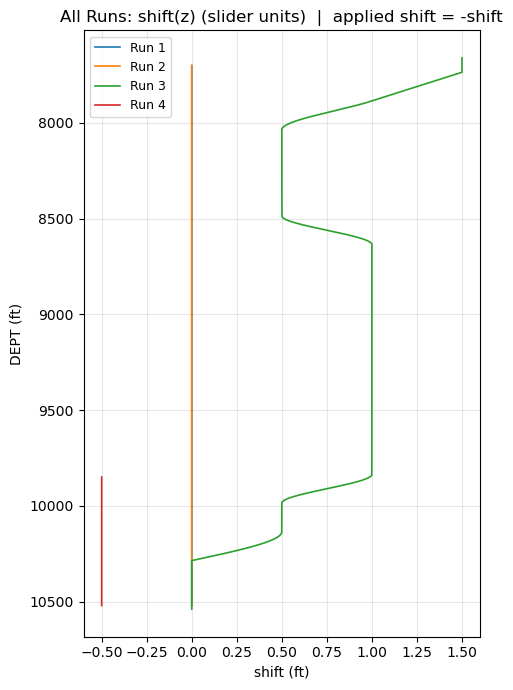

In [11]:
import matplotlib.pyplot as plt

def plot_all_shift_curves():
    fig, ax = plt.subplots(1, 1, figsize=(5, 7))
    ax.set_title("All Runs: shift(z) (slider units)  |  applied shift = -shift")
    ax.grid(True, alpha=0.3)
    ax.invert_yaxis()
    ax.set_xlabel("shift (ft)")
    ax.set_ylabel("DEPT (ft)")

    for run_k in range(1, len(logs)):
        if run_k not in depth_correction_model:
            continue
        sc = depth_correction_model[run_k]["shift_curve"]
        ax.plot(sc.values, sc.index.values, lw=1.2, label=f"Run {run_k}")

    ax.legend(loc="best", fontsize=9)
    plt.tight_layout()
    plt.show()

plot_all_shift_curves()


## Plot Manual Depth-shifted GR Curve:

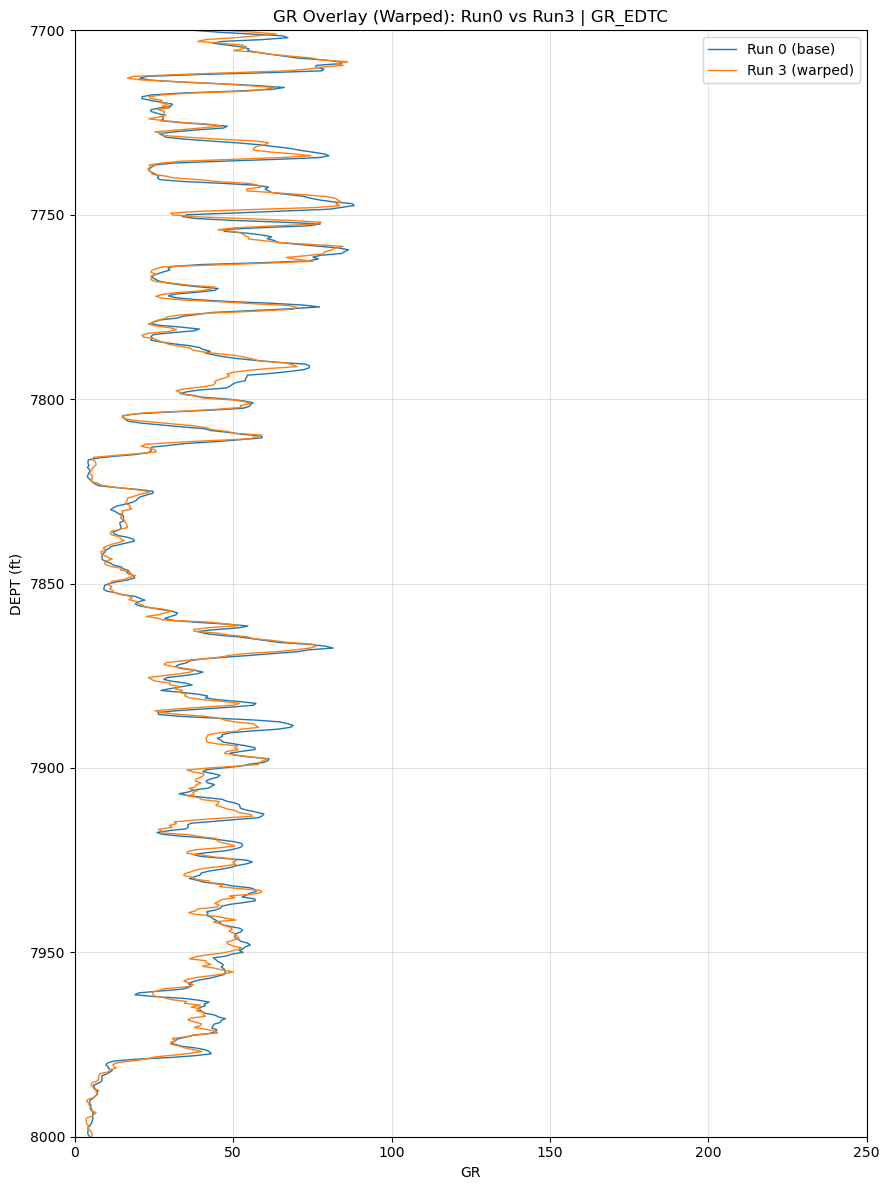

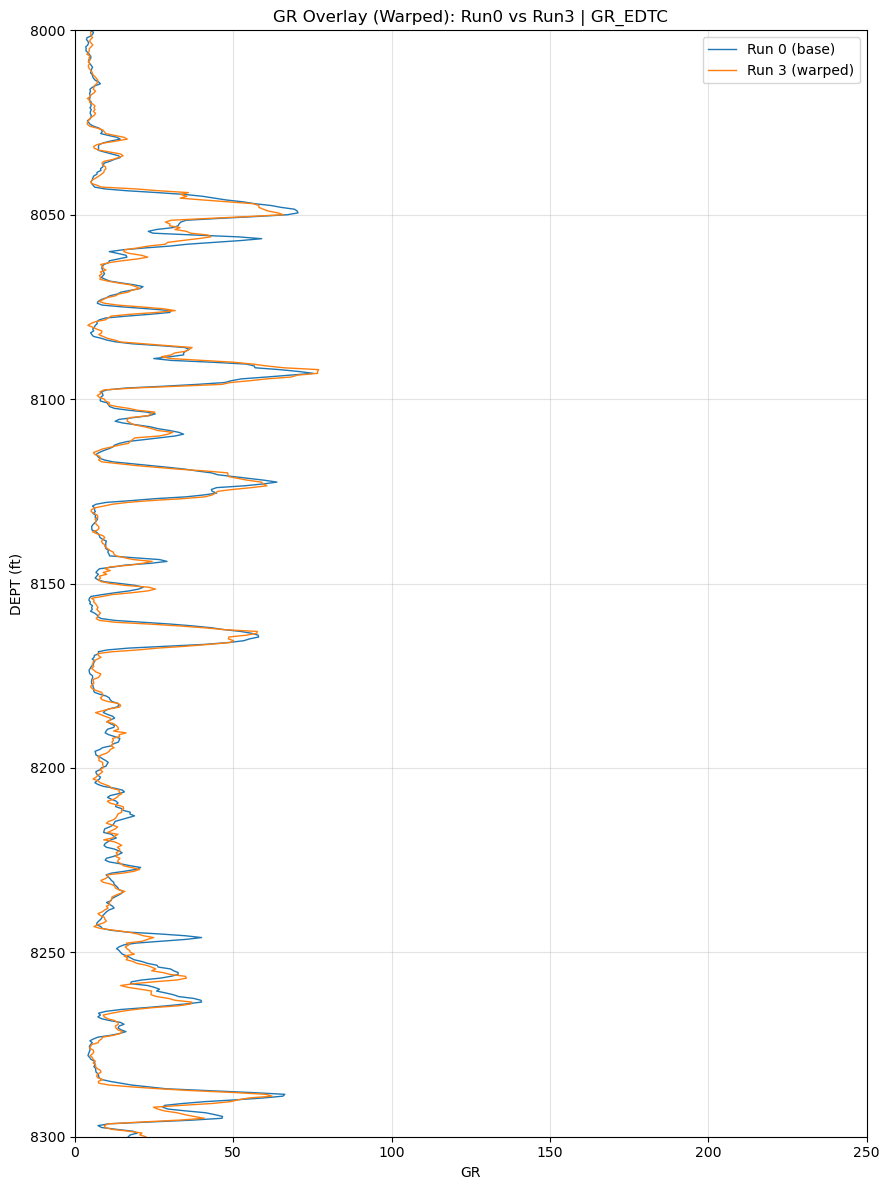

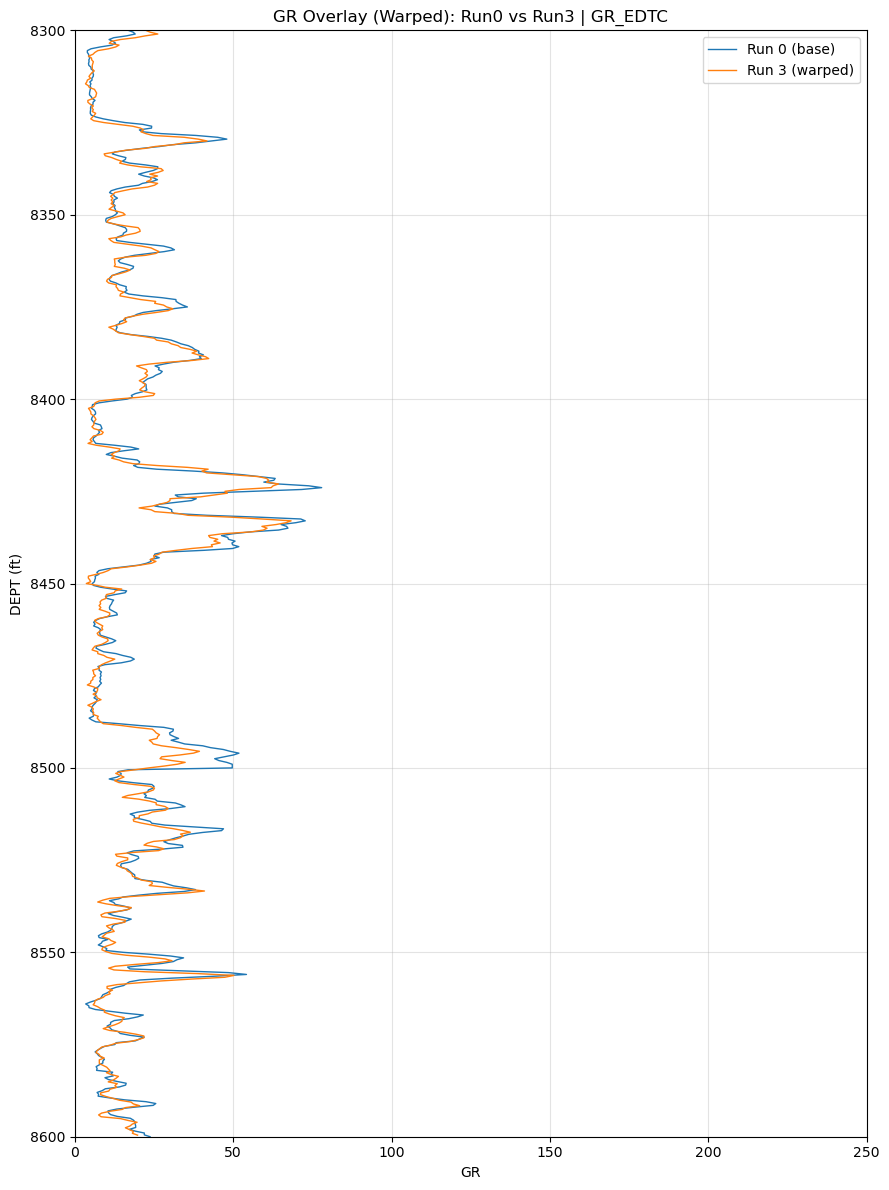

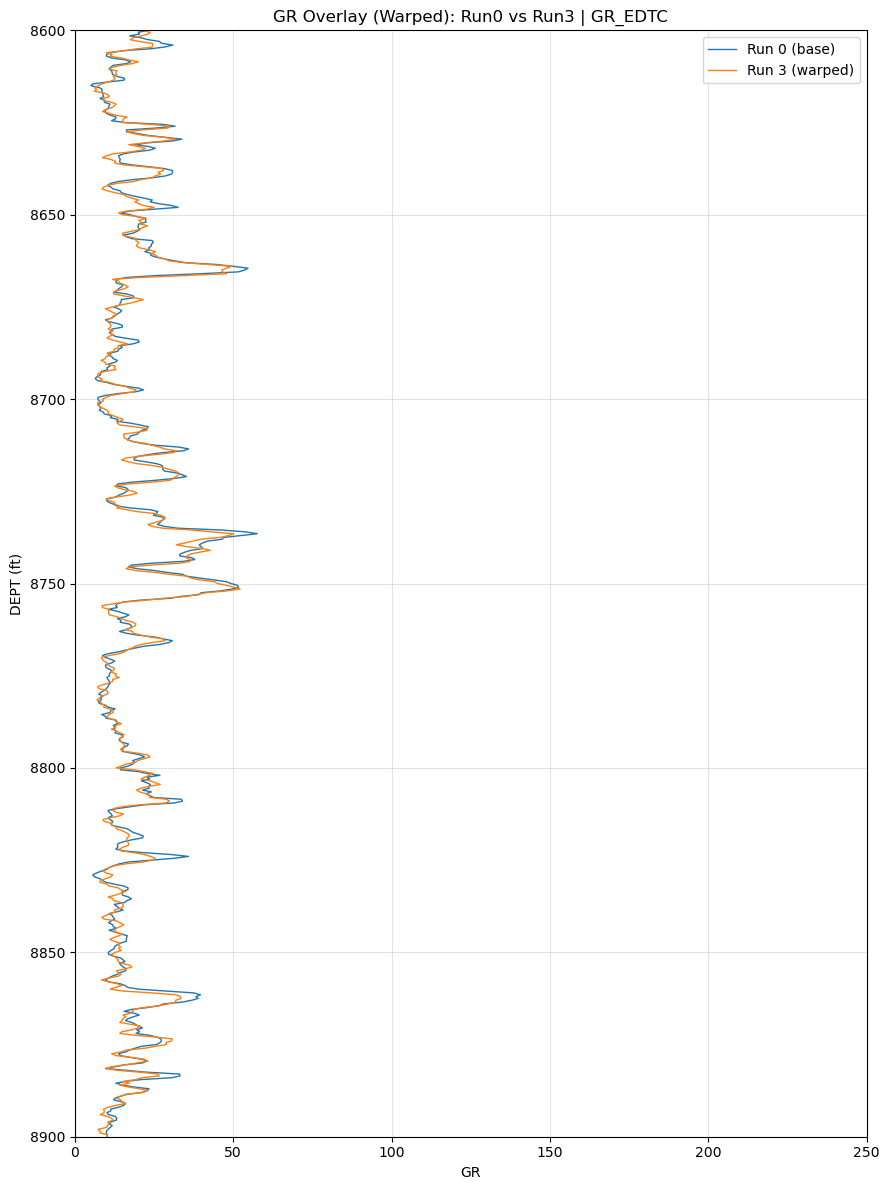

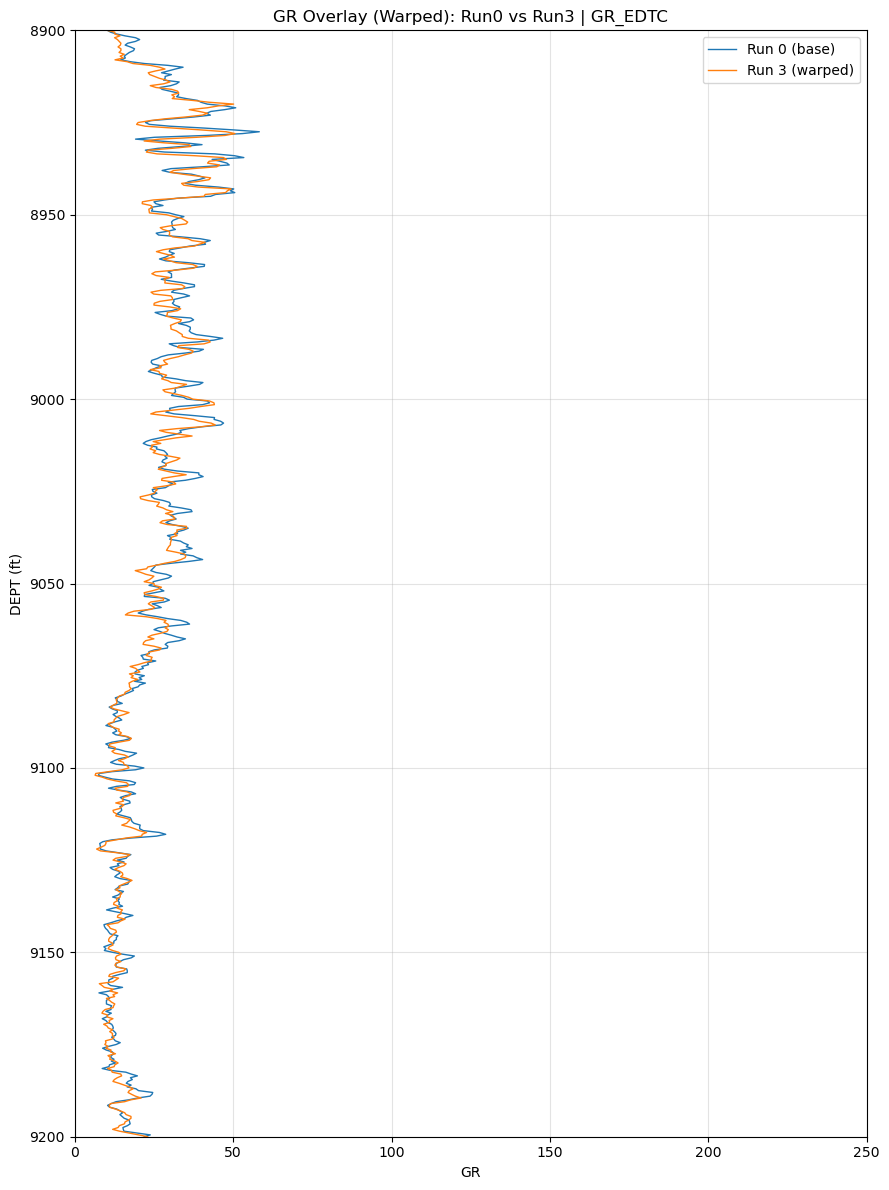

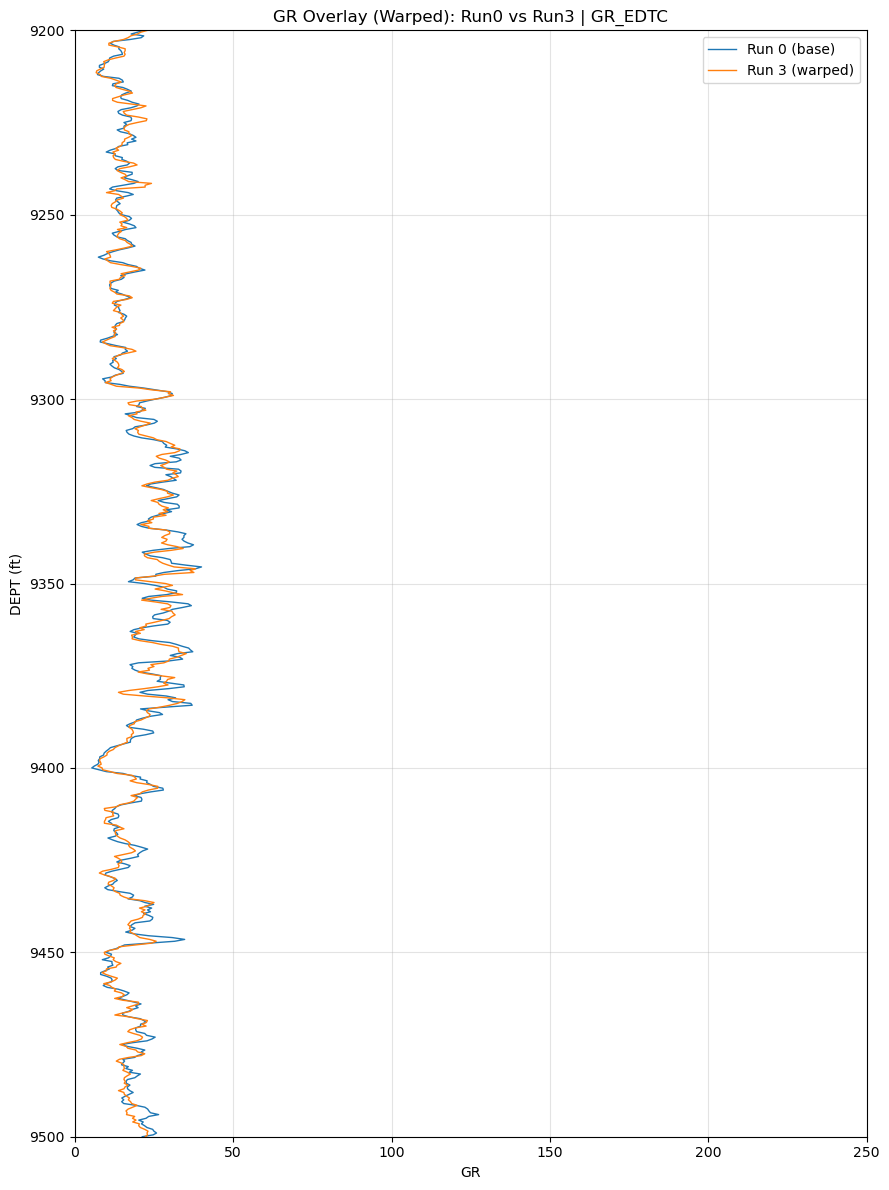

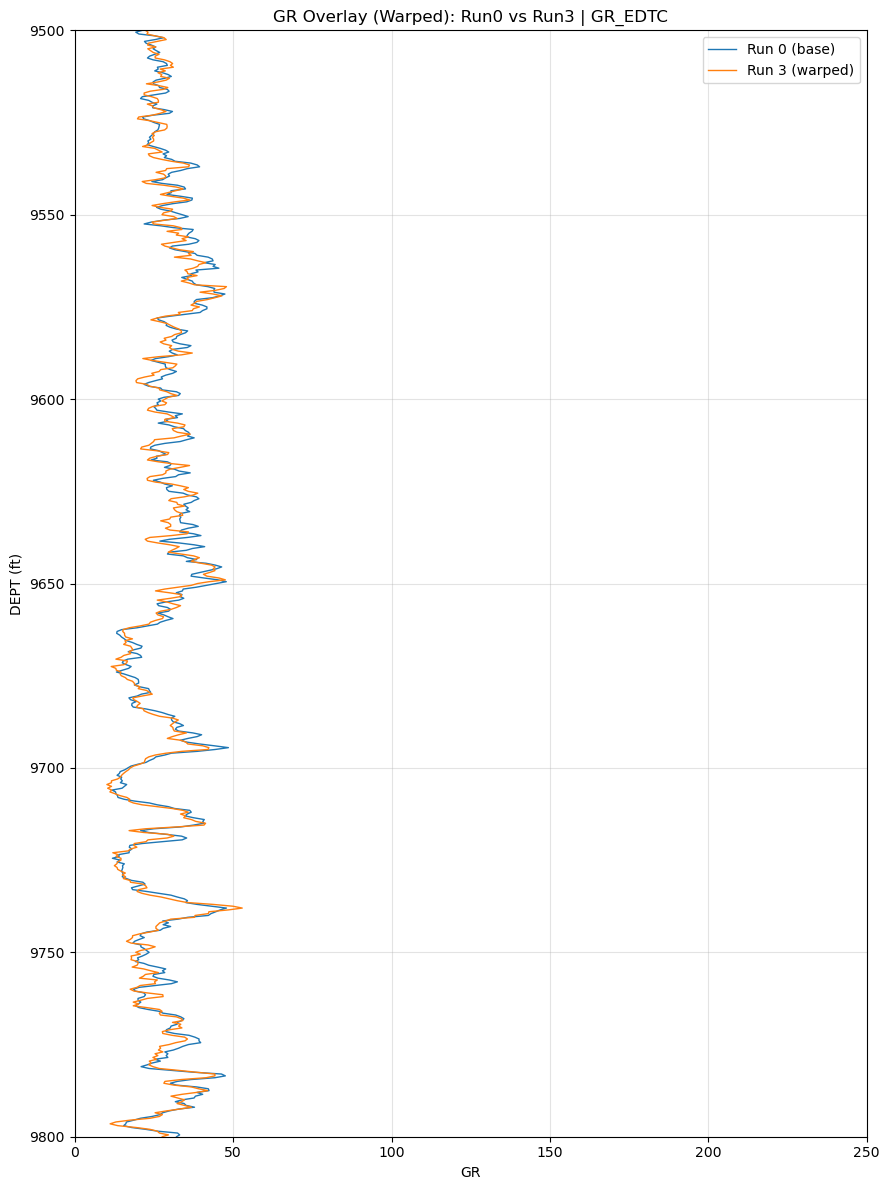

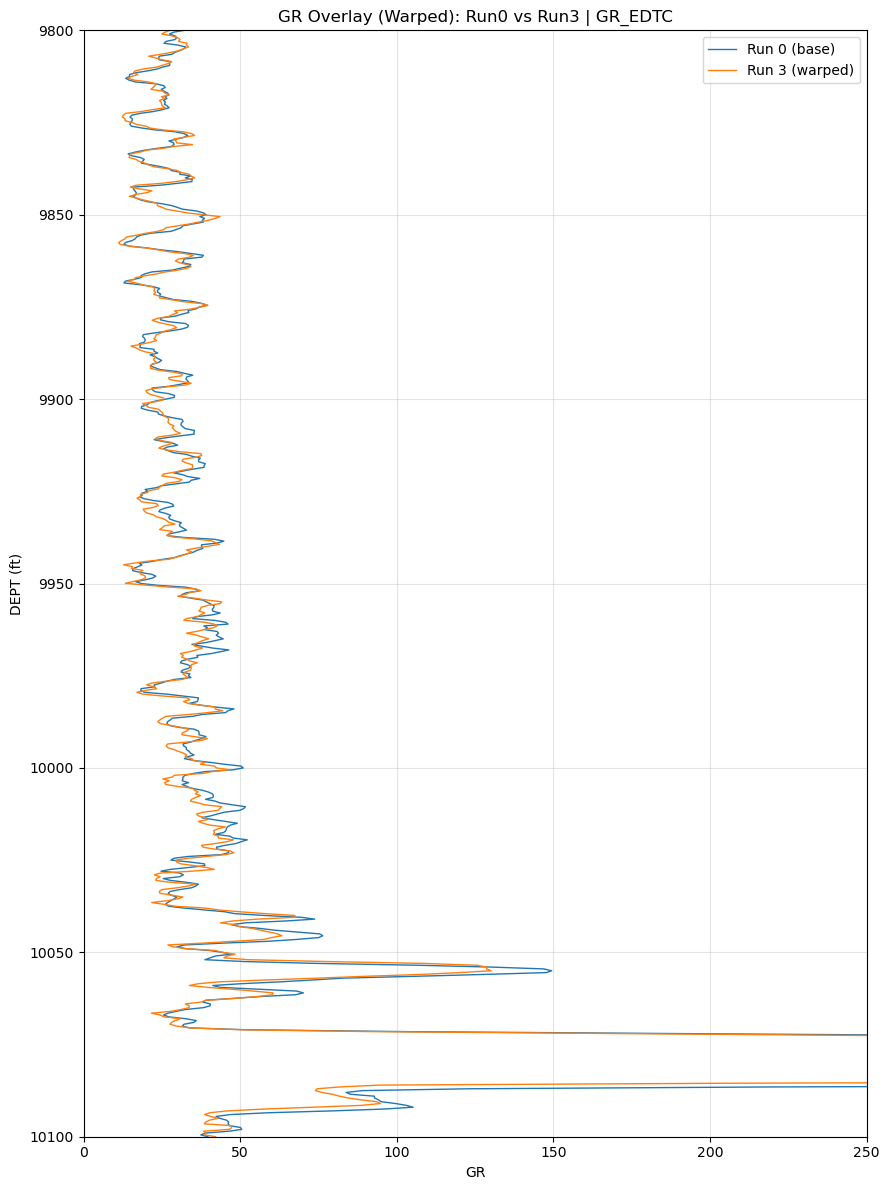

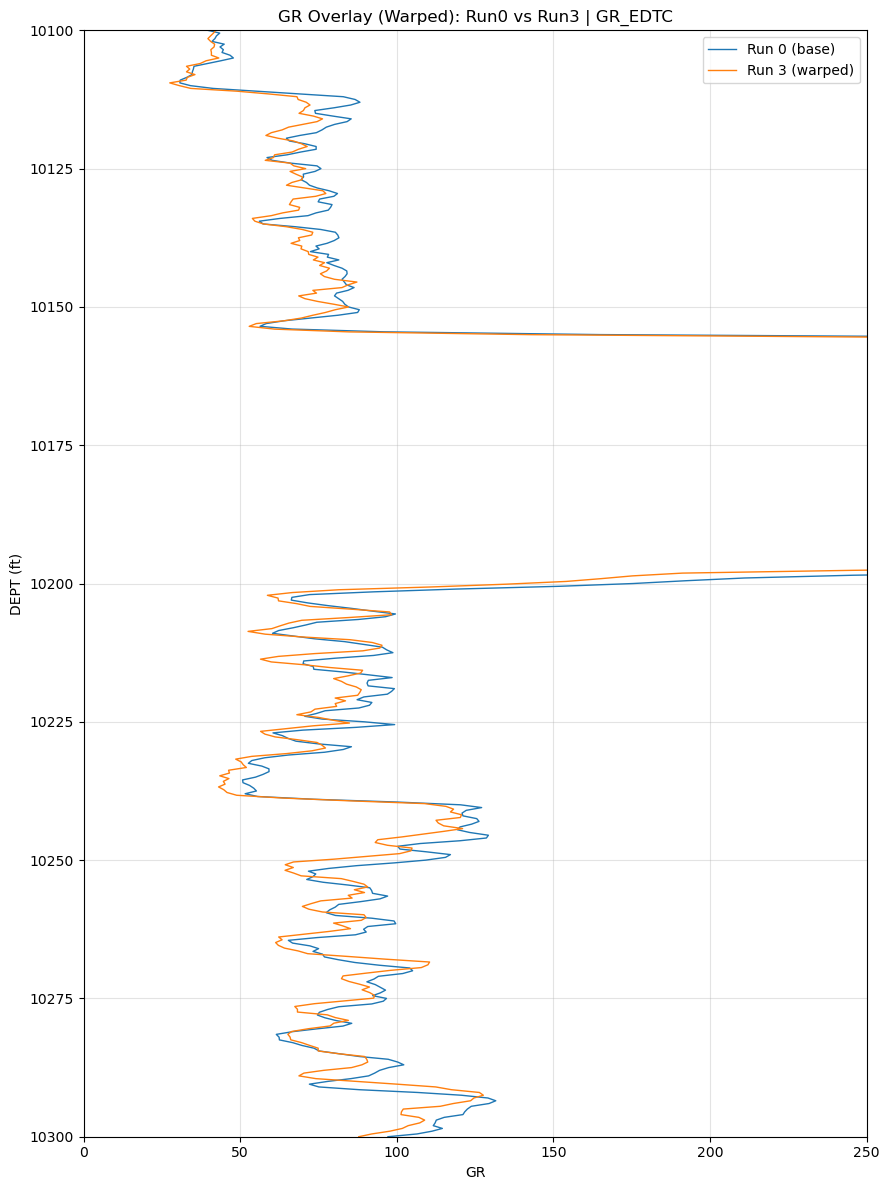

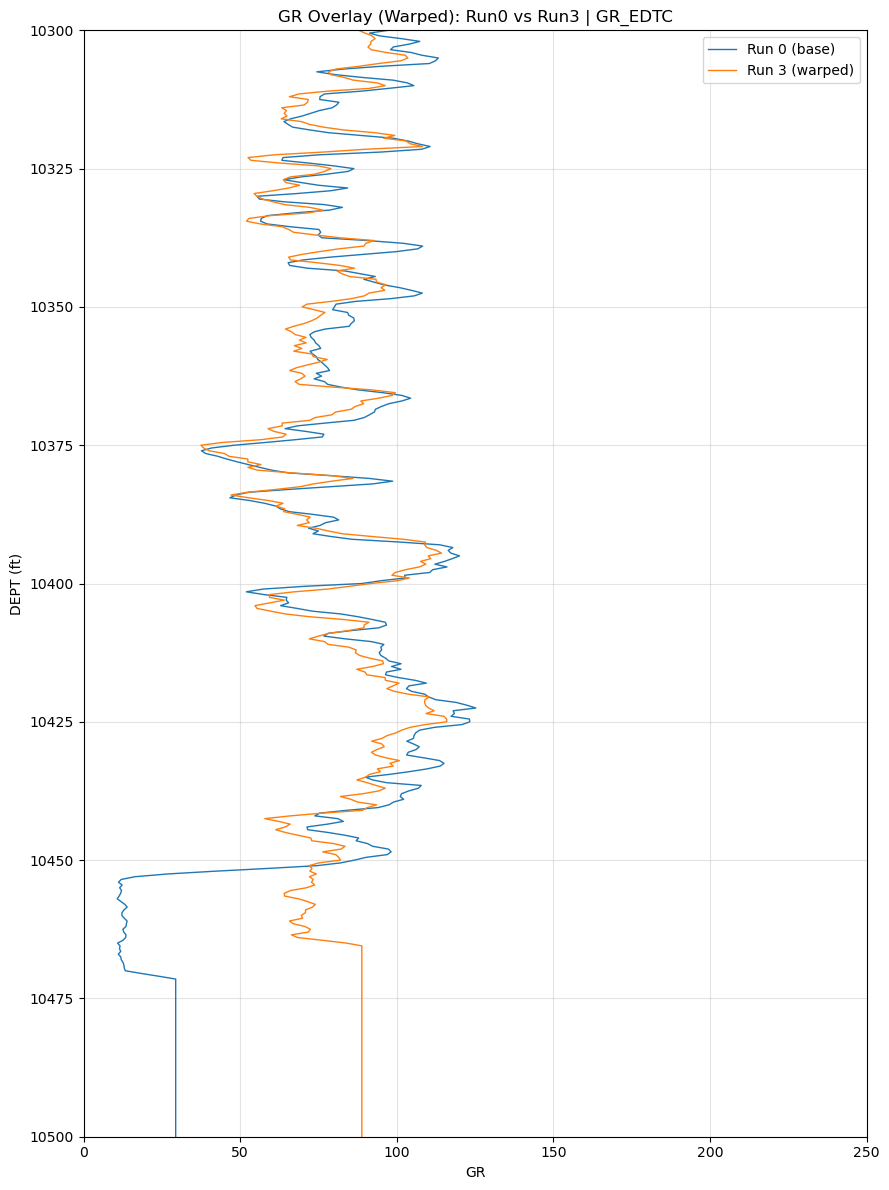

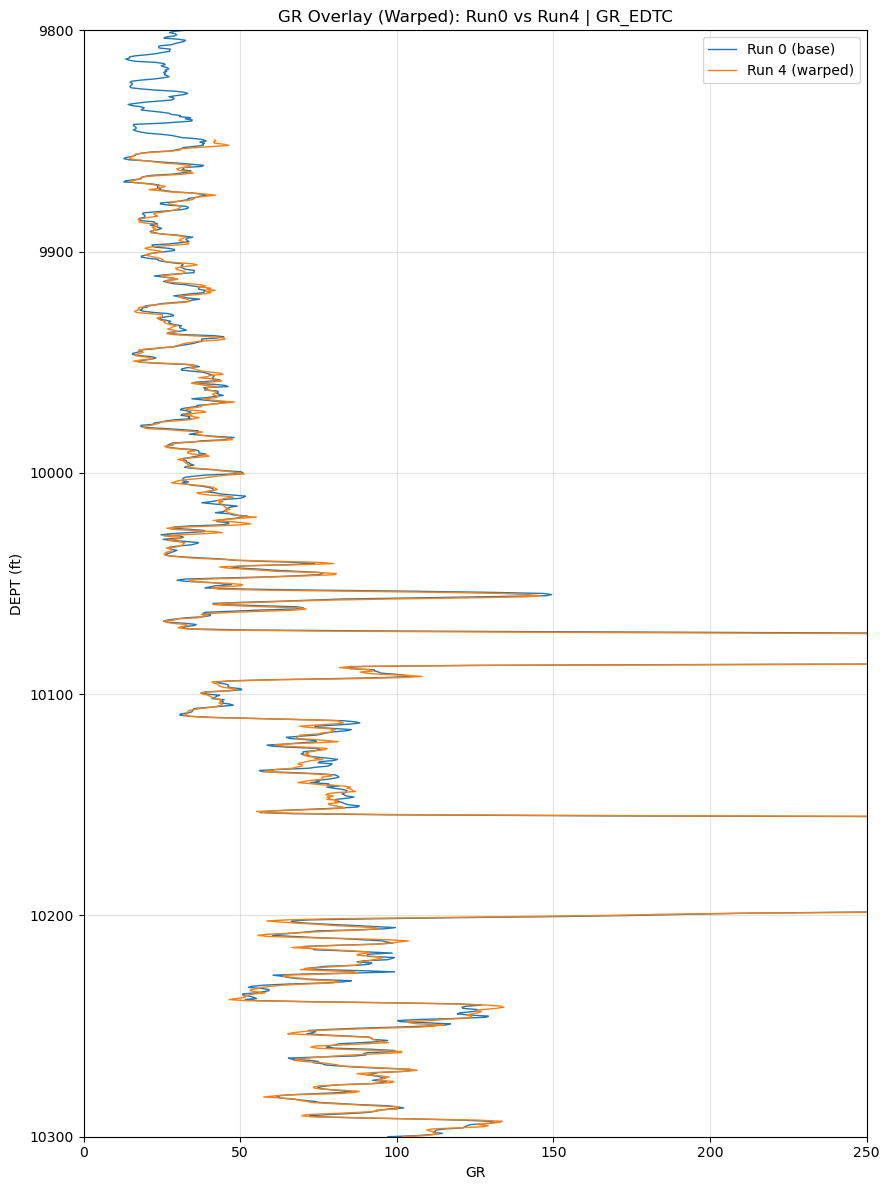

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

gr_candidates = ["GR_EDTC", "HSGR", "GR", "SGR", "HGR"]

def pick_common_gr(df0, dfk):
    for c in gr_candidates:
        if c in df0.columns and c in dfk.columns:
            return c
    return None


def plot_full_gr_overlay_warped(
    run_k: int,
    z_top: float = None,
    z_base: float = None,
    xlim=(0, 250),
    thin=2,
):
    df0 = get_run_df(0).sort_index()
    dfk = get_run_df(run_k).sort_index()

    mn = pick_common_gr(df0, dfk)
    if mn is None:
        raise ValueError(f"No common GR curve between Run0 and Run{run_k}")

    if run_k not in depth_correction_model:
        raise ValueError(f"Run {run_k} has no fitted anchor model. Click 'Fit Data to Anchors' first.")

    sc = depth_correction_model[run_k]["shift_curve"].reindex(dfk.index.astype(float), method=None)

    depth_k = dfk.index.astype(float).values
    shift_slider = sc.values.astype(float)

    # applied shift = -slider ; warped depth = depth - slider
    depth_warp = depth_k - shift_slider

    grk = dfk[mn].astype(float).values
    gr0 = df0[mn].astype(float)

    # thin for speed
    depth_warp = depth_warp[::thin]
    grk = grk[::thin]

    ser_k = pd.Series(grk, index=depth_warp).sort_index()

    # -------------------------
    # Depth window slicing
    # -------------------------
    if z_top is None:
        z_top = max(df0.index.min(), ser_k.index.min())
    if z_base is None:
        z_base = min(df0.index.max(), ser_k.index.max())

    A = df0.loc[(df0.index >= z_top) & (df0.index <= z_base), mn]
    B = ser_k.loc[(ser_k.index >= z_top) & (ser_k.index <= z_base)]

    # -------------------------
    # Plot
    # -------------------------
    fig, ax = plt.subplots(1, 1, figsize=(9, 12))
    ax.set_title(f"GR Overlay (Warped): Run0 vs Run{run_k} | {mn}")
    ax.grid(True, alpha=0.35)
    ax.invert_yaxis()
    ax.set_xlabel("GR")
    ax.set_ylabel("DEPT (ft)")
    ax.set_xlim(*xlim)
    ax.set_ylim(z_base, z_top)   # inverted axis with limits

    ax.plot(A.values, A.index.values, lw=1.0, label="Run 0 (base)")
    ax.plot(B.values, B.index.values, lw=1.0, label=f"Run {run_k} (warped)")

    ax.legend(loc="best")
    plt.tight_layout()
    plt.show()

# Try these:
#plot_full_gr_overlay_warped(3, thin=2)
#plot_full_gr_overlay_warped(4, thin=1)

# Run 3
plot_full_gr_overlay_warped(3, z_top=7700, z_base=8000, thin=1)
plot_full_gr_overlay_warped(3, z_top=8000, z_base=8300, thin=1)
plot_full_gr_overlay_warped(3, z_top=8300, z_base=8600, thin=1)
plot_full_gr_overlay_warped(3, z_top=8600, z_base=8900, thin=1)
plot_full_gr_overlay_warped(3, z_top=8900, z_base=9200, thin=1)
plot_full_gr_overlay_warped(3, z_top=9200, z_base=9500, thin=1)
plot_full_gr_overlay_warped(3, z_top=9500, z_base=9800, thin=1)
plot_full_gr_overlay_warped(3, z_top=9800, z_base=10100, thin=1)
plot_full_gr_overlay_warped(3, z_top=10100, z_base=10300, thin=1)
plot_full_gr_overlay_warped(3, z_top=10300, z_base=10500, thin=1)

# Run 4
plot_full_gr_overlay_warped(4, z_top=9800, z_base=10300, thin=1)



## Print all Anchors or Depth Shift Results:

In [13]:
def print_all_anchors():
    for run_k in range(1, len(logs)):
        if run_k not in depth_correction_model:
            print(f"\nRun {run_k}: no warp model built.")
            continue
        anchors = depth_correction_model[run_k]["anchors"]
        print(f"\nRun {run_k}: {len(anchors)} anchors")
        display(anchors)

print_all_anchors()



Run 1: 1 anchors


z  shift
0  7775.0    0.0


Run 2: 1 anchors


z  shift
0  7775.0    0.0


Run 3: 18 anchors


z  shift
0    7735.0    1.5
1    7885.0    1.0
2    8035.0    0.5
3    8185.0    0.5
4    8335.0    0.5
5    8485.0    0.5
6    8635.0    1.0
7    8785.0    1.0
8    8935.0    1.0
9    9085.0    1.0
10   9235.0    1.0
11   9385.0    1.0
12   9535.0    1.0
13   9685.0    1.0
14   9835.0    1.0
15   9985.0    0.5
16  10135.0    0.5
17  10285.0    0.0


Run 4: 4 anchors


z  shift
0   9924.0   -0.5
1  10074.0   -0.5
2  10224.0   -0.5
3  10374.0   -0.5

## Depth Shift each Run and Merge Data

# **depth_correction_model:**

In [14]:

#depth_correction_model = warp_model_map_auto  # alias, not a copy
depth_correction_model = depth_correction_model  # alias, not a copy


# ---------------------------------------------------------
# 0) Adopt consistent naming (no behavior change)
# ---------------------------------------------------------
# Your existing model dict is warp_model_map from earlier cells.
# We'll use your preferred name as an alias.
#depth_correction_model = warp_model_map  # alias, not a copy


# ---------------------------------------------------------
# 1) Apply depth correction to a run onto the master depth
# ---------------------------------------------------------
def apply_depth_correction(run_k: int, master_depth: np.ndarray) -> pd.DataFrame:
    """
    Apply anchor-fit depth correction for Run k and resample onto master_depth.
    depth_correction_model[run_k]['shift_curve'] contains shifts in SLIDER units.
    Applied shift = -shift_slider, so corrected_depth = depth - shift_slider
    """
    if run_k not in depth_correction_model:
        raise KeyError(f"Run {run_k} not found in depth_correction_model. Fit Data to Anchors first.")

    dfk = get_run_df(run_k).sort_index()
    sc  = depth_correction_model[run_k]["shift_curve"].reindex(dfk.index.astype(float), method=None)

    depth_k = dfk.index.astype(float).values
    shift_slider = sc.values.astype(float)

    # corrected depth mapping (applied = -slider)
    depth_corrected = depth_k - shift_slider

    out = pd.DataFrame(index=np.asarray(master_depth, dtype=float))
    for col in dfk.columns:
        y = pd.to_numeric(dfk[col], errors="coerce").values
        m = np.isfinite(depth_corrected) & np.isfinite(y)
        if m.sum() < 2:
            out[col] = np.nan
            continue

        xw = depth_corrected[m]
        yw = y[m]
        o = np.argsort(xw)
        xw, yw = xw[o], yw[o]

        # interpolate onto master grid; outside range -> NaN
        out[col] = np.interp(out.index.values, xw, yw, left=np.nan, right=np.nan)

    out.index.name = "DEPT"
    return out


# ===========================================================
# REQUIRED: get_run_df(i), get_run_top(i)
# ===========================================================
def get_run_df(i: int) -> pd.DataFrame:
    if "run_dfs" in globals() and isinstance(run_dfs, (list, tuple)) and len(run_dfs) > i:
        if isinstance(run_dfs[i], pd.DataFrame):
            return run_dfs[i]
    logi = logs[i]
    if isinstance(logi, pd.DataFrame):
        return logi
    if isinstance(logi, dict):
        for k in ["df_log", "df_filtered", "df_raw", "df_run", "data", "df"]:
            if k in logi and isinstance(logi[k], pd.DataFrame):
                return logi[k]
    raise KeyError(f"Could not find a run DataFrame for run {i}.")

# ---------------------------------------------------------
# GUARD: ensure depth_correction_model is valid
# ---------------------------------------------------------
if depth_correction_model is None or not isinstance(depth_correction_model, dict) or len(depth_correction_model) == 0:
    # Helpful debug: show likely candidates in globals
    possible = []
    for name, obj in globals().items():
        if isinstance(obj, dict) and len(obj) and any(isinstance(v, dict) and ("shift_curve" in v) for v in obj.values()):
            possible.append(name)

    msg = (
        "depth_correction_model is None/empty.\n\n"
        "You must set it to the output dict from your Auto or GUI shifting method.\n"
        "Expected structure: model[run_k]['shift_curve'] = pd.Series indexed by depth.\n\n"
    )
    if possible:
        msg += "I found these candidate model dicts in memory:\n  - " + "\n  - ".join(possible) + "\n\n"
        msg += "Fix: set:\n  depth_correction_model = <one_of_the_above>\n"
    else:
        msg += "I did NOT find any dicts in globals that contain 'shift_curve'.\n"
        msg += "That usually means the Auto/GUI shift cell has not been run yet, or it saved under a different structure.\n"

    raise ValueError(msg)




# ---------------------------------------------------------
# 2) Build depth-corrected runs (on Run0 depth grid)
# ---------------------------------------------------------
df0 = get_run_df(0).sort_index()
master_depth = df0.index.astype(float).values

run_dfs_depth_corrected = {0: df0.copy()}
for k in range(1, len(logs)):
    if k not in depth_correction_model:
        print(f"Run {k}: no depth correction model; skipping.")
        continue
    run_dfs_depth_corrected[k] = apply_depth_correction(k, master_depth)

print("Depth-corrected runs available:", sorted(run_dfs_depth_corrected.keys()))


# ---------------------------------------------------------
# 3) Merge corrected runs -> merged_df
# ---------------------------------------------------------
def merge_depth_corrected_runs(run_dfs_depth_corrected: dict, run_priority=None, add_source_columns=True) -> pd.DataFrame:
    """
    Merge curve-by-curve using first-non-null across runs in run_priority order.
    Adds CURVE__SRC columns if add_source_columns=True.
    Returns merged_df indexed by DEPT, with DEPT as first column.
    """
    if run_priority is None:
        run_priority = sorted(run_dfs_depth_corrected.keys())

    # union of all columns
    all_cols = []
    for rk in run_priority:
        all_cols.extend(list(run_dfs_depth_corrected[rk].columns))
    all_cols = sorted(set(all_cols))

    merged = pd.DataFrame(index=run_dfs_depth_corrected[run_priority[0]].index.copy())

    for col in all_cols:
        merged_col = pd.Series(np.nan, index=merged.index, dtype=float)
        src = pd.Series(np.nan, index=merged.index, dtype=float) if add_source_columns else None

        for rk in run_priority:
            dfk = run_dfs_depth_corrected[rk]
            if col not in dfk.columns:
                continue
            s = pd.to_numeric(dfk[col], errors="coerce")
            take = merged_col.isna() & s.notna()
            merged_col.loc[take] = s.loc[take]
            if add_source_columns:
                src.loc[take] = rk

        merged[col] = merged_col
        if add_source_columns:
            merged[f"{col}__SRC"] = src

    merged_df = merged.copy()
    merged_df.insert(0, "DEPT", merged_df.index.astype(float))
    return merged_df


run_priority = [0, 1, 2, 3, 4]  # edit as needed
merged_df = merge_depth_corrected_runs(run_dfs_depth_corrected, run_priority=run_priority, add_source_columns=True)

print("merged_df built:", merged_df.shape)
display(merged_df.head())


Depth-corrected runs available: [0, 1, 2, 3, 4]
merged_df built: (16917, 137)


DEPT  AF20  AF20__SRC  AF30  AF30__SRC  AF60  AF60__SRC  AF90  \
DEPT                                                                      
2062.0  2062.0   NaN        NaN   NaN        NaN   NaN        NaN   NaN   
2062.5  2062.5   NaN        NaN   NaN        NaN   NaN        NaN   NaN   
2063.0  2063.0   NaN        NaN   NaN        NaN   NaN        NaN   NaN   
2063.5  2063.5   NaN        NaN   NaN        NaN   NaN        NaN   NaN   
2064.0  2064.0   NaN        NaN   NaN        NaN   NaN        NaN   NaN   

        AF90__SRC  AT10  ...  T2_DIST_MW[0]  T2_DIST_MW[0]__SRC  TCMR  \
DEPT                     ...                                            
2062.0        NaN   NaN  ...            NaN                 NaN   NaN   
2062.5        NaN   NaN  ...            NaN                 NaN   NaN   
2063.0        NaN   NaN  ...            NaN                 NaN   NaN   
2063.5        NaN   NaN  ...            NaN                 NaN   NaN   
2064.0        NaN   NaN  ...            NaN                 NaN   NaN   

        TCMR__SRC  TDEP  TDEP__SRC    TENS  TENS__SRC  VPVS  VPVS__SRC  
DEPT                                                                    
2062.0        NaN   NaN        NaN  1746.0        0.0   NaN        NaN  
2062.5        NaN   NaN        NaN  1742.0        0.0   NaN        NaN  
2063.0        NaN   NaN        NaN  1738.0        0.0   NaN        NaN  
2063.5        NaN   NaN        NaN  1745.0        0.0   NaN        NaN  
2064.0        NaN   NaN        NaN  1728.0        0.0   NaN        NaN  

[5 rows x 137 columns]

## Output csv file to inspect data if needed for Depth-Shift results.

In [15]:
# ===========================================================
# EXPORT merged_df to CSV
# - DEPT first column
# - DEPT increasing
# - no DEPT ambiguity (index name cleared)
# ===========================================================

import os
from datetime import datetime

# Ensure index is numeric depth
merged_df = merged_df.copy()
merged_df.index = merged_df.index.astype(float)

# Remove ambiguous index name (critical)
merged_df.index.name = None

# Ensure DEPT column exists and is first
if "DEPT" not in merged_df.columns:
    merged_df.insert(0, "DEPT", merged_df.index.to_numpy(dtype=float))
else:
    merged_df["DEPT"] = merged_df.index.to_numpy(dtype=float)
    merged_df = merged_df[["DEPT"] + [c for c in merged_df.columns if c != "DEPT"]]

# Sort increasing and drop duplicate depths just in case
merged_df = merged_df.sort_values("DEPT", ascending=True)
merged_df = merged_df.drop_duplicates(subset=["DEPT"], keep="first")

# File name (versioned)
out_dir = "merged_outputs"
os.makedirs(out_dir, exist_ok=True)

#ts = datetime.now().strftime("%Y%m%d_%H%M%S")
#out_name = f"merged_run0_depth_cologged_{ts}.csv"
fname = os.path.join(out_dir, "merged_to_run0_depth.csv")


merged_df.to_csv(fname, index=False)
print("Saved:", fname)
print("DEPT increasing:", merged_df["DEPT"].is_monotonic_increasing)


Saved: merged_outputs/merged_to_run0_depth.csv
DEPT increasing: True


# Black and White Plot of all Curves:

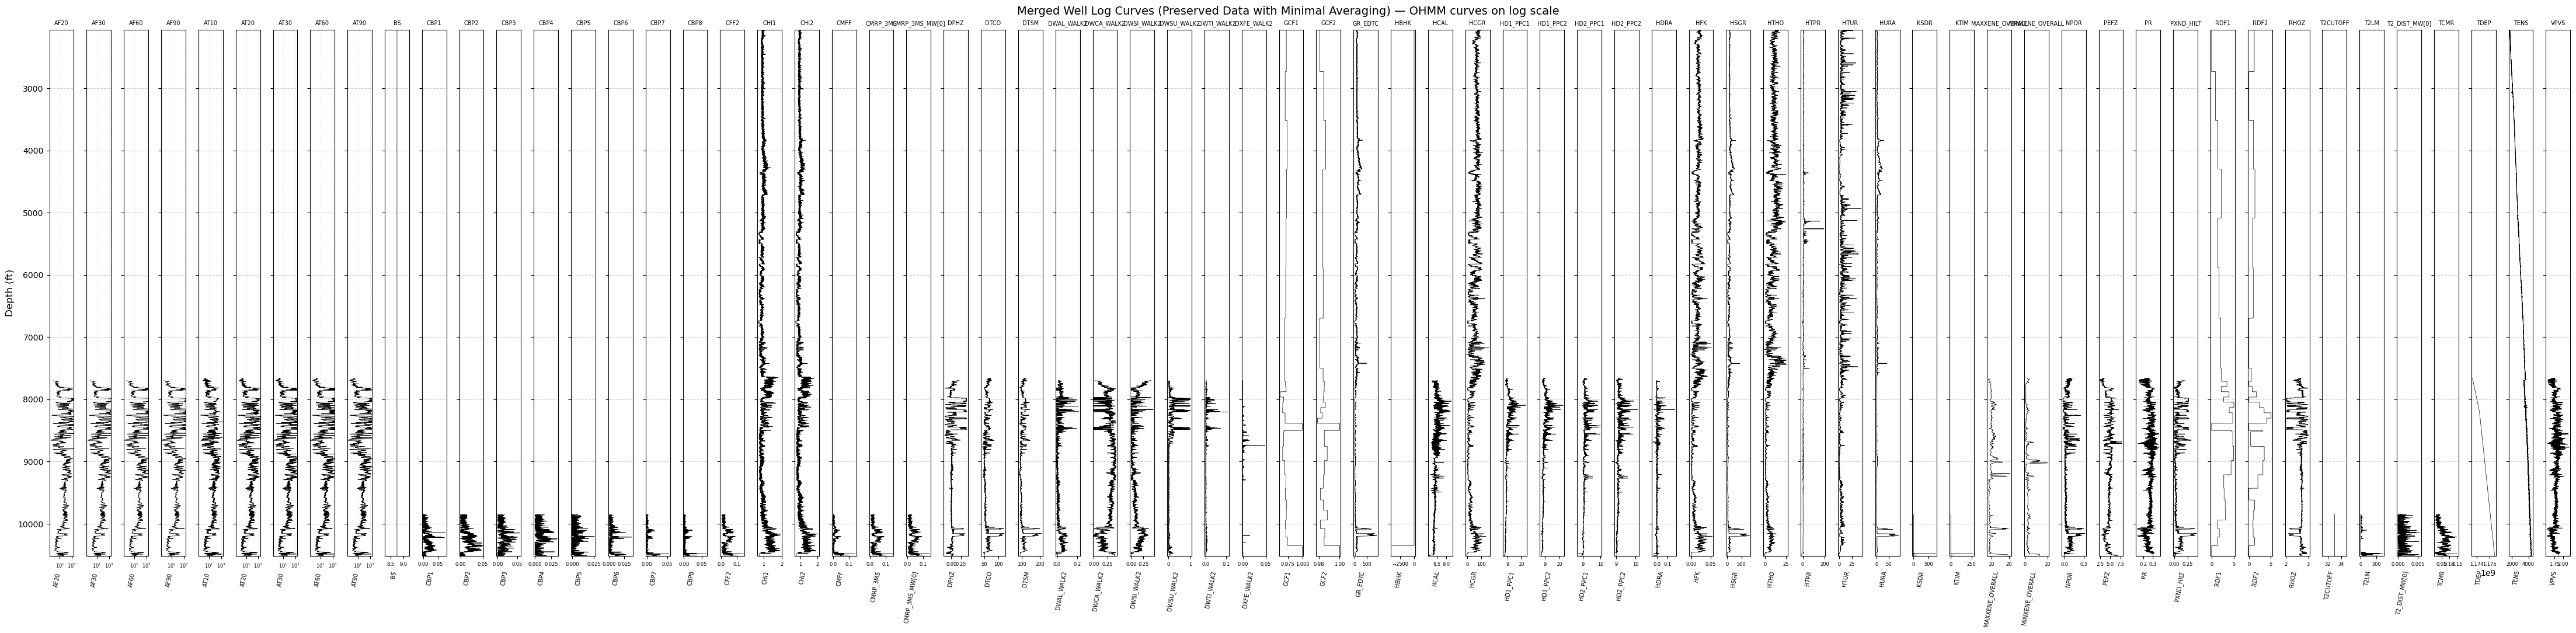

In [16]:
# -----------------------------
# Plot the merged well log curves
# -----------------------------
fig, axes = plt.subplots(
    nrows=1,
    ncols=len(all_available_curves),
    figsize=(len(all_available_curves) * 0.65, 11),
    sharey=True
)

# If only one curve, axes is not a list; normalize
if len(all_available_curves) == 1:
    axes = [axes]

for i, curve in enumerate(all_available_curves):
    ax = axes[i]
    ax.set_title(curve, fontsize=7)

    # Determine if curve should be log-scale (OHMM units)
    curve_is_log = is_ohmm_curve(curve, combined_units_map)

    # Extract data
    x = merged_df[curve].to_numpy(dtype=float)
    y = merged_df.index.to_numpy(dtype=float)

    # Plot with proper masking for log scale
    if np.isfinite(x).any():
        if curve_is_log:
            m = np.isfinite(x) & np.isfinite(y) & (x > 0)
            if np.any(m):
                ax.plot(x[m], y[m], linewidth=0.5, color="black")
                ax.set_xscale("log")
                ax.grid(True, which="both", axis="x", linestyle=":", alpha=0.35)
                ax.set_xlim(0.2,2000)
            else:
                # nothing valid for log scale
                pass
        else:
            m = np.isfinite(x) & np.isfinite(y)
            if np.any(m):
                ax.plot(x[m], y[m], linewidth=0.5, color="black")

    # Formatting
    ax.set_ylim(y.max(), y.min())  # depth increases downward
    ax.set_xlabel(curve, fontsize=7, rotation=80, ha="right")
    ax.tick_params(axis="x", labelsize=6)
    ax.grid(axis="y", linestyle="--", alpha=0.6)

# Formatting
axes[0].set_ylabel("Depth (ft)", fontsize=12)
fig.suptitle("Merged Well Log Curves (Preserved Data with Minimal Averaging) — OHMM curves on log scale", fontsize=14)

# Output filename using first run's wellname (consistent)
wellname0 = (las_data[0][0] if las_data else "WELL").replace("#", "").replace(" ", "_")

plt.tight_layout(pad=1.0, w_pad=0.2)

plots_dir = os.path.join(file_directory, "plots")
os.makedirs(plots_dir, exist_ok=True)

image_filename = os.path.join(
    plots_dir,
    f"Merged_Depth_plot_{wellname0}_{file_directory}_black_and_white.png"
)


fig.savefig(image_filename, dpi=300, bbox_inches="tight", facecolor="white")
plt.show()
plt.close(fig)









# **QC Check** - *merged data as thin yellow curves plotted over individual runs color by las file:*

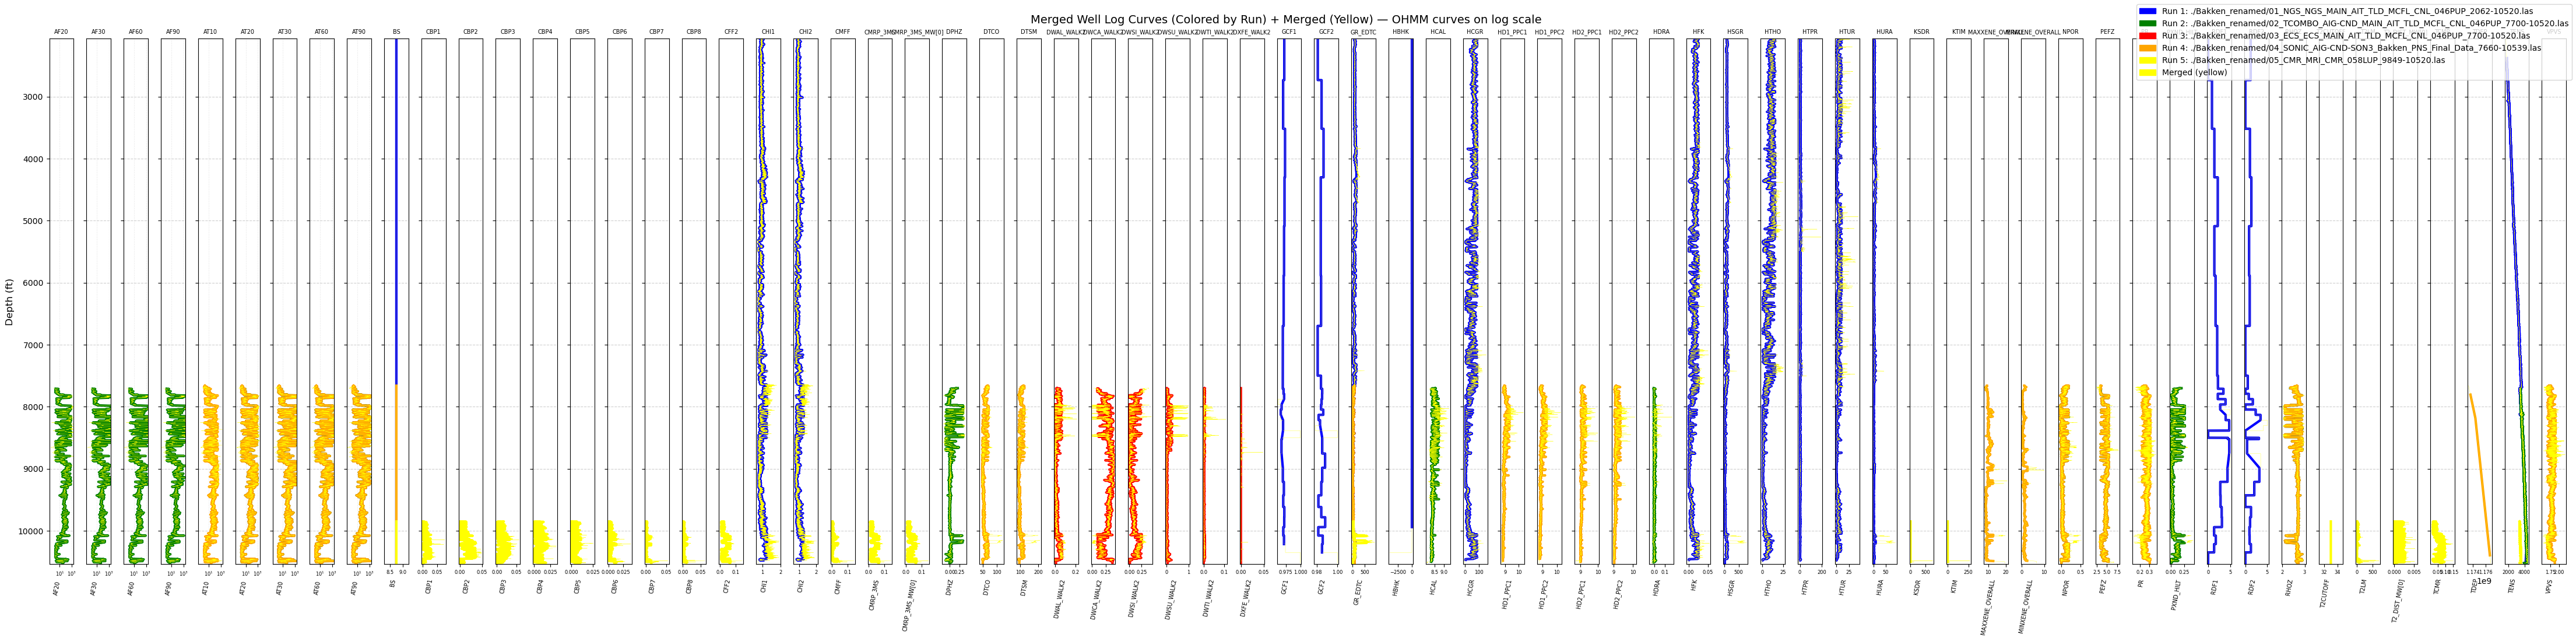

In [17]:
# -----------------------------
# Plot setup (colored by run + merged in yellow)
# -----------------------------
# Colors for each run
#run_colors = ["blue", "green", "red", "orange", "yellow", "black", "purple", "cyan", "gray", "violet", "limegreen"]
run_colors = ["blue", "green", "red", "orange", "yellow", "black","purple","cyan","gray","violet","limegreen","teal"]

if len(las_files) > len(run_colors):
    run_colors = (run_colors * (len(las_files) // len(run_colors) + 1))[:len(las_files)]

# Global depth range (for consistent axes)
min_depth = min(np.nanmin(depth) for _, depth, _, _ in las_data)
max_depth = max(np.nanmax(depth) for _, depth, _, _ in las_data)

legend_patches = [mpatches.Patch(color=run_colors[i], label=f"Run {i+1}: {las_files[i]}") for i in range(len(las_files))]
legend_patches.append(mpatches.Patch(color="yellow", label="Merged (yellow)"))

fig, axes = plt.subplots(
    nrows=1,
    ncols=len(all_available_curves),
    figsize=(len(all_available_curves) * 0.65, 11),
    sharey=True
)

# If only one curve, axes is not a list; normalize
if len(all_available_curves) == 1:
    axes = [axes]

for i, curve in enumerate(all_available_curves):
    ax = axes[i]
    ax.set_title(curve, fontsize=7)

    # Determine if curve should be log-scale (OHMM units)
    curve_is_log = is_ohmm_curve(curve, combined_units_map)

    # -------------------------
    # Colored plots by run
    # -------------------------
    for run_index, (wellname, depth, df_filtered, _) in enumerate(las_data):
        if curve not in df_filtered.columns or not df_filtered[curve].notna().any():
            continue

        x = df_filtered[curve].to_numpy(dtype=float)
        y = np.asarray(depth, float)

        if curve_is_log:
            m = safe_log_mask(x) & np.isfinite(y)
            if np.any(m):
                ax.plot(x[m], y[m], linewidth=3, color=run_colors[run_index], alpha=1.0)
                ax.set_xlim(0.2,2000)
        else:
            m = np.isfinite(x) & np.isfinite(y)
            if np.any(m):
                ax.plot(x[m], y[m], linewidth=3, color=run_colors[run_index], alpha=1.0)

    # -------------------------
    # Plot merged curve (yellow)
    # -------------------------
    if curve in merged_df.columns and merged_df[curve].notna().any():
        x = merged_df[curve].to_numpy(dtype=float)
        y = merged_df.index.to_numpy(dtype=float)

        if curve_is_log:
            m = safe_log_mask(x) & np.isfinite(y)
            if np.any(m):
                ax.plot(x[m], y[m], linewidth=0.25, color="yellow", alpha=1.0)
        else:
            m = np.isfinite(x) & np.isfinite(y)
            if np.any(m):
                ax.plot(x[m], y[m], linewidth=0.25, color="yellow", alpha=1.0)

    # Axis formatting
    ax.set_ylim(max_depth, min_depth)
    ax.set_xlabel(curve, fontsize=7, rotation=80, ha="right")
    ax.tick_params(axis="x", labelsize=6)
    ax.grid(axis="y", linestyle="--", alpha=0.6)

    # Apply log scaling for OHMM curves
    if curve_is_log:
        ax.set_xscale("log")
        ax.grid(True, which="both", axis="x", linestyle=":", alpha=0.35)

# Formatting
axes[0].set_ylabel("Depth (ft)", fontsize=12)
fig.suptitle("Merged Well Log Curves (Colored by Run) + Merged (Yellow) — OHMM curves on log scale", fontsize=14)
fig.legend(handles=legend_patches, loc="upper right", fontsize=10, frameon=True)

# Save and display the image
plt.tight_layout(pad=1.0, w_pad=0.2)





plt.tight_layout(pad=1.0, w_pad=0.2)

plots_dir = os.path.join(file_directory, "plots")
os.makedirs(plots_dir, exist_ok=True)

image_filename = os.path.join(
    plots_dir,
    f"Merged_Depth_plot_{wellname0}_{file_directory}_yellow-line_plotted-over-colored-individual-las-files_QC-check.png"
)


fig.savefig(image_filename, dpi=300, bbox_inches="tight", facecolor="white")
plt.show()
plt.close(fig)









---
---
# **Save all Merged data to las and csv files:**

In [18]:
# ===========================================================
# MERGE LAS RUNS  ➜  build merged_df  ➜  add NMR partition curves
#                 ➜  update units map for NEW curves
#                 ➜  (optional) write CSV + LAS
# ===========================================================

import numpy as np
import pandas as pd
import lasio

# -----------------------------
# USER SETTINGS
# -----------------------------
# assumes you already built las_files + file_directory in a prior cell
# las_files = [...]
# file_directory = "MAG1" (or whatever folder)

# -----------------------------
# Helper: detect OHMM curves (units) and safely plot on log scale
# -----------------------------
def is_ohmm_curve(curve_name: str, units_map: dict) -> bool:
    u = (units_map.get(curve_name, "") or "").strip().upper().replace(" ", "")
    return any(tok in u for tok in ["OHMM", "OHM.M", "OHM-M", "OHM/M", "MD", "MS"])

def clip0(x):
    """clip to >=0, keep NaN where non-finite"""
    x = np.asarray(x, dtype=float)
    return np.where(np.isfinite(x), np.maximum(x, 0.0), np.nan)

# -----------------------------
# Read LAS and return df + units
# -----------------------------
def get_filtered_well_data(file):
    las = lasio.read(file)
    df_log = las.df()

    # Ensure depth unique by averaging duplicate values
    # (las.df() index is DEPT; we force explicit groupby)
    df_log = df_log.groupby("DEPT").mean().reset_index()
    df_log.set_index("DEPT", inplace=True)

    units_map = {c.mnemonic: (c.unit or "") for c in las.curves}
    wellname = las.well.WELL.value if "WELL" in las.well else file
    return wellname, df_log.index, df_log, units_map

# -----------------------------
# Sanity check
# -----------------------------
if "las_files" not in globals() or not las_files:
    raise ValueError("`las_files` is empty. Run your folder-selection cell first.")

# -----------------------------
# Read all LAS files
# -----------------------------
las_data = [get_filtered_well_data(file) for file in las_files]

# Build a combined units map (first non-empty unit wins)
combined_units_map = {}
for _, _, df, units_map in las_data:
    for c in df.columns:
        if c not in combined_units_map or not combined_units_map[c]:
            combined_units_map[c] = units_map.get(c, "") or combined_units_map.get(c, "")

# Ensure all depths from all LAS files are included
all_depths = np.unique(np.concatenate([depth.values for _, depth, _, _ in las_data]))
merged_depth_index = np.sort(all_depths)

# Get all unique curves across runs
all_available_curves = sorted(set().union(*[df.columns for _, _, df, _ in las_data]))

# Create empty merged DF
merged_df = pd.DataFrame(index=merged_depth_index, columns=all_available_curves, dtype=float)

# -----------------------------
# Merge strategy: preserve data; blend overlap
# -----------------------------
for _, depth, df_log, _ in las_data:
    df_log = df_log.loc[~df_log.index.duplicated(keep="first")]

    for curve in all_available_curves:
        if curve not in df_log.columns:
            continue

        valid_mask = df_log[curve].notna()
        valid_depths = df_log.index[valid_mask]
        if valid_depths.size == 0:
            continue

        if merged_df.loc[valid_depths, curve].isna().all():
            merged_df.loc[valid_depths, curve] = df_log.loc[valid_depths, curve].astype(float)
        else:
            overlap_mask = merged_df.loc[valid_depths, curve].notna()

            # fill where merged is empty
            merged_df.loc[valid_depths[~overlap_mask], curve] = df_log.loc[valid_depths[~overlap_mask], curve].astype(float)

            # blend overlap (favor newer run)
            merged_df.loc[valid_depths[overlap_mask], curve] = (
                df_log.loc[valid_depths[overlap_mask], curve].astype(float) * 0.7 +
                merged_df.loc[valid_depths[overlap_mask], curve].astype(float) * 0.3
            )

# ===========================================================
# NMR PARTITIONING (AFTER merge, on merged_df)
# Creates:
#   PHIT_NMR  = TCMR
#   PHIE_NMR  = CMRP_3MS
#   CBW       = max(PHIT_NMR - PHIE_NMR, 0)
#   FFI       = clip(CMFF, 0..PHIE_NMR)   (if CMFF exists)
#   BVIE      = max(PHIE_NMR - FFI, 0)    (if CMFF exists)
# ===========================================================
TCMR_COL = "TCMR"
EFF_COL  = "CMRP_3MS"
CMFF_COL = "CMFF"   # if present

have_tcmr = TCMR_COL in merged_df.columns
have_eff  = EFF_COL  in merged_df.columns
have_cmff = CMFF_COL in merged_df.columns

if have_tcmr and have_eff:
    tcmr = merged_df[TCMR_COL].astype(float).to_numpy()
    eff  = merged_df[EFF_COL].astype(float).to_numpy()

    merged_df["PHIT_NMR"] = tcmr
    merged_df["PHIE_NMR"] = eff
    merged_df["CBW"]      = clip0(tcmr - eff)

    if have_cmff:
        cmff = merged_df[CMFF_COL].astype(float).to_numpy()

        # clip CMFF to [0, PHIE]
        cmff_clip = np.where(
            np.isfinite(cmff) & np.isfinite(eff),
            np.clip(cmff, 0.0, eff),
            np.nan
        )

        merged_df["FFI"]  = cmff_clip
        merged_df["BVIE"] = clip0(eff - cmff_clip)
    else:
        merged_df["FFI"]  = np.nan
        merged_df["BVIE"] = np.nan

else:
    print("NMR partition skipped: need both TCMR and CMRP_3MS present in merged_df.")

# ===========================================================
# UNITS UPDATE MODULE (goes RIGHT HERE)
# This makes your plots show units for the NEW curves, and lets
# your LAS writer carry units if you choose to pass them through.
# ===========================================================
combined_units_map.update({
    "PHIT_NMR": "v/v",
    "PHIE_NMR": "v/v",
    "CBW":      "v/v",
    "FFI":      "v/v",
    "BVIE":     "v/v",
})
# (optional) ensure vendor curves also have porosity units if blank
combined_units_map.setdefault("TCMR", "v/v")
combined_units_map.setdefault("CMRP_3MS", "v/v")
combined_units_map.setdefault("CMFF", "v/v")
combined_units_map.setdefault("BFV", "v/v")

print("merged_df built with NMR partition curves:", [c for c in ["PHIT_NMR","PHIE_NMR","CBW","FFI","BVIE"] if c in merged_df.columns])

# ===========================================================
# OPTIONAL: WRITE CSV + LAS (uses updated units)
# ===========================================================
# --- Extract well metadata from the first LAS file ---
las_first = lasio.read(las_files[0])

well_metadata = {
    "COMPANY": las_first.well.COMP.value if "COMP" in las_first.well else "Unknown",
    "WELL":    las_first.well.WELL.value if "WELL" in las_first.well else "Unknown",
    "FIELD":   las_first.well.FLD.value  if "FLD"  in las_first.well else "Unknown",
    "COUNTY":  las_first.well.CNTY.value if "CNTY" in las_first.well else "Unknown",
    "STATE":   las_first.well.STAT.value if "STAT" in las_first.well else "Unknown",
}

well_name_cleaned = str(well_metadata["WELL"]).replace("#", "").replace(" ", "_")

# --------------------------------------------------
# Filenames (clean & consistent)
# --------------------------------------------------
csv_filename = f"Merged_Well_Log_{well_name_cleaned}_{file_directory}.csv"
las_filename = f"Merged_Well_Log_{well_name_cleaned}_{file_directory}.las"

# --------------------------------------------------
# Ensure merged directory exists
# --------------------------------------------------
merged_dir = os.path.join(file_directory, "merged_data")
os.makedirs(merged_dir, exist_ok=True)

csv_outfile = os.path.join(merged_dir, csv_filename)
las_outfile = os.path.join(merged_dir, las_filename)

# --------------------------------------------------
# Save CSV
# --------------------------------------------------
merged_df.to_csv(csv_outfile, index=True)
print(f"CSV saved: {csv_outfile}")

# --------------------------------------------------
# Build LAS from merged_df
# --------------------------------------------------
las_merged = lasio.LASFile()

# ---- Well metadata ----
las_merged.well.WELL = well_name_cleaned
las_merged.well.COMP = well_metadata.get("COMPANY", "")
las_merged.well.FLD  = well_metadata.get("FIELD", "")
las_merged.well.CNTY = well_metadata.get("COUNTY", "")
las_merged.well.STAT = well_metadata.get("STATE", "")
las_merged.well.API  = well_metadata.get("API_NUMBER", "")
las_merged.well.UWI  = well_metadata.get("UWI", "")

# ---- Depth curve (must be first) ----
las_merged.append_curve(
    "DEPT",
    merged_df.index.values.astype(float),
    unit="ft",
    descr="Depth"
)

# ---- Add all merged curves with units ----
for curve in merged_df.columns:
    unit = (combined_units_map.get(curve, "") or "").strip()
    las_merged.append_curve(
        curve,
        merged_df[curve].values.astype(float),
        unit=unit,
        descr=curve
    )

# --------------------------------------------------
# Write LAS
# --------------------------------------------------
las_merged.write(las_outfile, version=2.0, wrap=False)
print(f"LAS saved: {las_outfile}")


merged_df built with NMR partition curves: ['PHIT_NMR', 'PHIE_NMR', 'CBW', 'FFI', 'BVIE']
CSV saved: Bakken_renamed/merged_data/Merged_Well_Log_Bakken_Bakken_renamed.csv
LAS saved: Bakken_renamed/merged_data/Merged_Well_Log_Bakken_Bakken_renamed.las


## Add Tops

In [19]:
# ===========================================================
# TOPS LOADER (per selected well folder)
#   - Uses your selected folder: file_directory (e.g. "..._renamed")
#   - Strips suffix to match Well Name in Excel
#   - Creates: tops_df_well, tops_depths, tops
# ===========================================================

import os
import pandas as pd
import numpy as np

# ---- USER: path to your tops file (edit if needed) ----
TOPS_XLSX = "Well Tops (Core).xlsx"   # or "tops/Well Tops (Core).xlsx"

def strip_rename_suffix(folder_name: str) -> str:
    """Remove _rename / _renamed suffix from folder name."""
    if folder_name is None:
        return None
    return re.sub(r"(_renamed|_rename)\s*$", "", folder_name, flags=re.IGNORECASE).strip()

def normalize_name(s: str) -> str:
    """Normalize for robust matching."""
    if s is None:
        return ""
    return re.sub(r"\s+", " ", str(s).strip().upper())

def load_tops_master(tops_xlsx_path: str) -> pd.DataFrame:
    """Load the tops table (tops only)."""
    if not os.path.exists(tops_xlsx_path):
        raise FileNotFoundError(f"Tops file not found: {os.path.abspath(tops_xlsx_path)}")

    # Read only columns you care about
    df = pd.read_excel(
        tops_xlsx_path,
        usecols=["Welll Name", "Well No", "Formation", "Top (ft)"]
    ).copy()

    # Standardize column names
    df.columns = ["well_name", "well_no", "formation", "top_ft"]

    # Normalize
    df["well_name_norm"] = df["well_name"].apply(normalize_name)
    df["formation"] = df["formation"].astype(str).str.strip()
    df["top_ft"] = pd.to_numeric(df["top_ft"], errors="coerce")

    # Clean
    df = df.dropna(subset=["top_ft"])
    df = df.sort_values(["well_name_norm", "top_ft"]).reset_index(drop=True)
    return df

def get_tops_for_selected_well(tops_master: pd.DataFrame, folder_name: str) -> pd.DataFrame:
    """Filter tops for the currently selected well folder (without _renamed)."""
    base = strip_rename_suffix(folder_name)
    base_norm = normalize_name(base)

    df_well = tops_master[tops_master["well_name_norm"] == base_norm].copy()
    df_well = df_well.sort_values("top_ft").reset_index(drop=True)
    return df_well

# ---- Build tops for the currently selected folder ----
tops_df_master = load_tops_master(TOPS_XLSX)

selected_well_folder = file_directory  # from your folder-select cell
selected_well_name = strip_rename_suffix(selected_well_folder)

tops_df_well = get_tops_for_selected_well(tops_df_master, selected_well_folder)

# Globals used by your plotting functions
if tops_df_well.empty:
    print(f"⚠️ No tops found for: '{selected_well_name}' (from folder '{selected_well_folder}')")
    tops_depths = []
    tops = []
else:
    tops_depths = tops_df_well["top_ft"].astype(float).tolist()
    tops = tops_df_well["formation"].astype(str).tolist()

    print(f"Tops loaded for well: '{selected_well_name}'")
    display(tops_df_well[["well_name", "formation", "top_ft"]])


Tops loaded for well: 'Bakken'


well_name           formation        top_ft
0    Bakken        Upper Bakken  10071.526300
1    Bakken       Middle Bakken  10086.717273
2    Bakken        Lower Bakken  10155.293665
3    Bakken   Upper Three Forks  10200.432556
4    Bakken  Middle Three Forks  10239.495058
5    Bakken   Lower Three Forks  10292.446449

---
---
# Comprehensive Plot from Merged Data to Define **Zone of Interest** (ZoI)

Most wells in this dataset have CMR data. BFV from CMR is in the total porosity system and so is TCMR. However CMRP_3MS is in the effective porosity system. Therefore, we take the difference between TCMR and CMRP_3MS as Clay Bound Water (CBW) and subtract that from the BFV to calculate a **BVI in the effective porosity system**. 

Our CMR plot then goes from TCMR to CMRP_3MS shaded in as gray for the CBW volume. We then plot BVI_effective as a dark blue fill on the right side of track and finally shade the difference between BVI_effective and CMRP_3ms as yellow to represent the Free Fluid (FFI) volume. FFI is the only available pore space for hydrocarbons, and there is a strong correlation between FFI and permeability. 


# Range Sliders for Depth Plot:

In [20]:
# ===========================================================
# INTERACTIVE ZONE TEMPLATE PLOT — from merged_df + NMR partition curves
# Creates/updates:
#   - analysis_depth_range = (top_depth, bottom_depth)   with top <= bottom
#   - analysis_df          = sliced DF with numeric DEPT column (no index dependence)
#
# Plotting:
#   - Plots the selected zone from merged_df (depth can be index OR DEPT column)
#
# Requires:
#   - merged_df (DataFrame; depth in index OR a DEPT column)
# Optional:
#   - combined_units_map (dict: mnemonic -> units)
#   - tops_depths, tops
#   - well_name_cleaned, file_directory
# ===========================================================

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import LogLocator, NullFormatter
import ipywidgets as widgets
from IPython.display import display, clear_output

# -----------------------------
# Helpers
# -----------------------------
def nice_label(mnemonic, units_map):
    u = (units_map.get(mnemonic, "") or "").strip() if isinstance(units_map, dict) else ""
    return f"{mnemonic}\n[{u}]" if u else mnemonic

def first_present(cols, candidates):
    s = set(cols)
    for c in candidates:
        if c in s:
            return c
    return None

def add_tops(ax, top_depth, bottom_depth):
    if "tops_depths" in globals() and "tops" in globals():
        for d in tops_depths:
            if top_depth <= d <= bottom_depth:
                ax.axhline(d, color="red", linewidth=2.0)

def add_tops_labels(ax, top_depth, bottom_depth):
    """
    Draw top names in the GR track, right-justified.
    Uses x in axes fraction (0..1) and y in data (depth).
    """
    if "tops_depths" in globals() and "tops" in globals():
        for d, nm in zip(tops_depths, tops):
            if top_depth <= d <= bottom_depth:
                ax.text(
                    0.985, d, str(nm),
                    transform=ax.get_yaxis_transform(),
                    ha="right", va="center",
                    color="black", fontsize=20,
                    zorder=50,
                    bbox=dict(facecolor="white", edgecolor="none", alpha=0.65, pad=1.5)
                )

def setup_porosity_axis(a):
    ticks = [-0.15, 0.00, 0.15, 0.30, 0.45]
    a.set_xlim(-0.15, 0.45)
    a.invert_xaxis()
    a.set_xticks(ticks)
    a.grid(True, axis="x", linestyle="--", linewidth=0.7, alpha=0.8)

def ensure_depth_column(df, depth_col="DEPT"):
    """
    Return a copy with a numeric DEPT column guaranteed.
    If DEPT doesn't exist, it is created from index.
    """
    d = df.copy()
    if depth_col not in d.columns:
        d[depth_col] = d.index
    d[depth_col] = pd.to_numeric(d[depth_col], errors="coerce")
    d = d.dropna(subset=[depth_col])
    return d

def df_depth_limits_any(df, depth_col="DEPT"):
    """
    Return (min_depth, max_depth) from either DEPT column or index.
    Prefers DEPT if present.
    """
    d = df.copy()
    if depth_col in d.columns:
        dep = pd.to_numeric(d[depth_col], errors="coerce").to_numpy()
    else:
        dep = pd.to_numeric(pd.Index(d.index), errors="coerce").to_numpy()
    dep = dep[np.isfinite(dep)]
    if dep.size == 0:
        raise ValueError("No finite depths found in DEPT or index.")
    return float(dep.min()), float(dep.max())

def curve_depth_limits_any(df, curve, depth_col="DEPT"):
    """
    Return (top_depth, base_depth) where df[curve] is finite.
    Uses DEPT if present, else index.
    """
    d = df.copy()
    if curve not in d.columns:
        raise ValueError(f"{curve} not present in df.")
    d = ensure_depth_column(d, depth_col=depth_col)
    vals = pd.to_numeric(d[curve], errors="coerce").to_numpy()
    dep  = d[depth_col].to_numpy(dtype=float)
    m = np.isfinite(vals) & np.isfinite(dep)
    if not np.any(m):
        raise ValueError(f"No finite values found for {curve}.")
    return float(dep[m].min()), float(dep[m].max())

def build_units_map_for_df(df, base_units=None):
    u = dict(base_units) if isinstance(base_units, dict) else {}
    for c in df.columns:
        if c not in u:
            u[c] = ""
    for c in ["PHIT_NMR", "PHIE_NMR", "FFI", "BVIE", "BVI_E", "CBW"]:
        if c in df.columns and not u.get(c, ""):
            u[c] = "v/v"
    return u

def slice_zone_df(df, top_depth, bottom_depth, depth_col="DEPT"):
    """
    Slice by depth using DEPT column (created if needed).
    Returns sorted, reset-index df with numeric DEPT.
    """
    top_depth, bottom_depth = (top_depth, bottom_depth) if top_depth <= bottom_depth else (bottom_depth, top_depth)
    d = ensure_depth_column(df, depth_col=depth_col)
    z = d.loc[(d[depth_col] >= top_depth) & (d[depth_col] <= bottom_depth)].copy()
    z = z.sort_values(depth_col).reset_index(drop=True)
    return z

# -----------------------------
# Main plot function (works with DEPT column OR index)
# -----------------------------
def plot_zone_template_from_df(df_in, units_map, top_depth, bottom_depth, title=None, depth_col="DEPT"):
    if df_in is None or df_in.empty:
        raise ValueError("merged_df is empty.")

    top_depth, bottom_depth = (top_depth, bottom_depth) if top_depth <= bottom_depth else (bottom_depth, top_depth)

    # Slice using DEPT column, regardless of whether original df had it
    z = slice_zone_df(df_in, top_depth, bottom_depth, depth_col=depth_col)
    if z.empty:
        raise ValueError(f"No data in zone {top_depth}–{bottom_depth}.")

    depth = z[depth_col].to_numpy(dtype=float)

    # Candidate lists
    gr_cands  = ["GR", "SGR", "HGR", "HSGR"]
    cgr_cands = ["CGR", "HCGR"]

    cali_cands = ["CALI","CALS","HCAL","CAL","CALIPER","HD1_PPC1","HD2_PPC1"]
    bs_cands   = ["BS","BITSIZE","BIT","BIT_SIZE"]
    dcal_cands = ["DCAL","DCALI","D_CAL","CALD"]

    rhob_cands = ["RHOB", "RHOZ"]
    drho_cands = ["DRHO", "HDRA", "HDRH", "DROH", "DRH", "RHOC"]
    tnph_cands = ["TNPH", "NPHI", "NPOR", "CNL"]
    tcmr_cands = ["PHIT_NMR", "TCMR", "MPHIS"]
    cmrp_cands = ["PHIE_NMR", "CMRP_3MS", "CMRP3MS", "CMRP", "MPHI"]

    rxo_cands  = ["RXOZ", "Rxo", "RXO", "RxoZ"]
    at90_cands = ["AT90", "AF90", "AO90", "ILD", "RT"]
    at60_cands = ["AT60", "AF60", "AO60"]
    at30_cands = ["AT30", "AF30", "AO30"]
    at20_cands = ["AT20", "AF20", "AO20"]
    at10_cands = ["AT10", "AF10", "AO10"]

    bvie_cands = ["BVIE", "BVI_E"]
    cbw_cands  = ["CBW"]
    ffi_cands  = ["FFI", "CMFF"]

    # Pick curves
    gr   = first_present(z.columns, gr_cands)
    cgr  = first_present(z.columns, cgr_cands)

    cali = first_present(z.columns, cali_cands)
    bs   = first_present(z.columns, bs_cands)
    dcal = first_present(z.columns, dcal_cands)

    rhob = first_present(z.columns, rhob_cands)
    drho = first_present(z.columns, drho_cands)
    tnph = first_present(z.columns, tnph_cands)
    tcmr = first_present(z.columns, tcmr_cands)
    cmrp = first_present(z.columns, cmrp_cands)

    rxo  = first_present(z.columns, rxo_cands)
    at90 = first_present(z.columns, at90_cands)
    at60 = first_present(z.columns, at60_cands)
    at30 = first_present(z.columns, at30_cands)
    at20 = first_present(z.columns, at20_cands)
    at10 = first_present(z.columns, at10_cands)

    cbw_name  = first_present(z.columns, cbw_cands)
    bvie_name = first_present(z.columns, bvie_cands)
    ffi_name  = first_present(z.columns, ffi_cands)

    # -----------------------------
    # Create 4 tracks
    # -----------------------------
    fig, ax = plt.subplots(
        nrows=1, ncols=4, figsize=(18, 20), sharey=True,
        gridspec_kw={"width_ratios": [1.8, 1.9, 1.7, 1.7]}
    )

    if title is None:
        title = f"Zone Template Plot — {top_depth:g}–{bottom_depth:g} ft"
    fig.suptitle(title, fontsize=18, color="blue", y=0.995)
    fig.subplots_adjust(top=0.80, wspace=0.24)

    # Common Y formatting
    for a in ax:
        a.set_ylim(top_depth, bottom_depth)
        a.invert_yaxis()
        a.yaxis.grid(True, linestyle="--", linewidth=0.5, alpha=0.7)
        add_tops(a, top_depth, bottom_depth)

    add_tops_labels(ax[0], top_depth, bottom_depth)

    # ==========================================================
    # Track 1: GR/CGR fills + Hole condition
    # ==========================================================
    ax[0].set_title("GR/CGR + Hole", fontsize=14, color="green")
    x_left_gr, x_right_gr = 0.0, 200.0
    ax[0].set_xlim(x_left_gr, x_right_gr)
    ax[0].grid(True, axis="x", linestyle="--", linewidth=0.7, alpha=0.6)

    a_fill_gr = ax[0].twiny()
    a_fill_gr.set_xlim(x_left_gr, x_right_gr)
    a_fill_gr.spines["top"].set_visible(False)
    a_fill_gr.get_xaxis().set_visible(False)
    a_fill_gr.grid(False)

    gr_vals  = pd.to_numeric(z[gr], errors="coerce").to_numpy() if gr else None
    cgr_vals = pd.to_numeric(z[cgr], errors="coerce").to_numpy() if cgr else None

    if cgr_vals is not None:
        a_fill_gr.fill_betweenx(depth, 0.0, cgr_vals, where=np.isfinite(cgr_vals), facecolor="green", alpha=1.0)

    if (gr_vals is not None) and (cgr_vals is not None):
        a_fill_gr.fill_betweenx(
            depth, cgr_vals, gr_vals,
            where=np.isfinite(gr_vals) & np.isfinite(cgr_vals) & (gr_vals >= cgr_vals),
            facecolor="magenta", alpha=1.0
        )

    if (gr_vals is not None) and (cgr_vals is None):
        a_fill_gr.fill_betweenx(depth, 0.0, gr_vals, where=np.isfinite(gr_vals), facecolor="green", alpha=0.25)

    if gr:
        a = ax[0].twiny()
        a.set_xlim(x_left_gr, x_right_gr)
        a.plot(gr_vals, depth, color="green", linewidth=2.5)
        a.set_xlabel(nice_label(gr, units_map), color="green")
        a.tick_params(axis="x", colors="green")
        a.spines["top"].set_position(("outward", 0))
        a.grid(False)

    if cgr:
        a = ax[0].twiny()
        a.set_xlim(x_left_gr, x_right_gr)
        a.plot(cgr_vals, depth, color="magenta", linewidth=2.5)
        a.set_xlabel(nice_label(cgr, units_map), color="magenta")
        a.tick_params(axis="x", colors="magenta")
        a.spines["top"].set_position(("outward", 35))
        a.grid(False)

    cali_min, cali_max = 5.0, 25.0
    dcal_min, dcal_max = -2.0, 2.0

    if cali:
        a = ax[0].twiny()
        a.set_xlim(cali_min, cali_max)
        a.plot(pd.to_numeric(z[cali], errors="coerce").to_numpy(), depth, color="brown", linewidth=1.6)
        a.set_xlabel(nice_label(cali, units_map), color="brown")
        a.tick_params(axis="x", colors="brown")
        a.spines["top"].set_position(("outward", 80))
        a.grid(False)

    if bs:
        a = ax[0].twiny()
        a.set_xlim(cali_min, cali_max)
        a.plot(pd.to_numeric(z[bs], errors="coerce").to_numpy(), depth, color="black", linewidth=1.1, linestyle="--")
        a.set_xlabel(nice_label(bs, units_map), color="black")
        a.tick_params(axis="x", colors="black")
        a.spines["top"].set_position(("outward", 115))
        a.grid(False)

    if cali and bs:
        cali_vals_h = pd.to_numeric(z[cali], errors="coerce").to_numpy()
        bs_vals_h   = pd.to_numeric(z[bs], errors="coerce").to_numpy()
        a_fill_h = ax[0].twiny()
        a_fill_h.set_xlim(cali_min, cali_max)
        a_fill_h.spines["top"].set_visible(False)
        a_fill_h.get_xaxis().set_visible(False)
        a_fill_h.grid(False)

        a_fill_h.fill_betweenx(
            depth, bs_vals_h, cali_vals_h,
            where=np.isfinite(cali_vals_h) & np.isfinite(bs_vals_h) & (cali_vals_h > bs_vals_h),
            facecolor="yellow", alpha=0.25
        )

    if dcal:
        DC = pd.to_numeric(z[dcal], errors="coerce").to_numpy()

        a_fill_d = ax[0].twiny()
        a_fill_d.set_xlim(dcal_min, dcal_max)
        a_fill_d.spines["top"].set_visible(False)
        a_fill_d.get_xaxis().set_visible(False)
        a_fill_d.grid(False)

        a_fill_d.fill_betweenx(depth, 0.0, np.clip(DC, 0.0, None),
                               where=np.isfinite(DC) & (DC > 0), facecolor="yellow", alpha=0.45)
        a_fill_d.fill_betweenx(depth, np.clip(DC, None, 0.0), 0.0,
                               where=np.isfinite(DC) & (DC < 0), facecolor="saddlebrown", alpha=0.45)

        a = ax[0].twiny()
        a.set_xlim(dcal_min, dcal_max)
        a.plot(DC, depth, color="purple", linewidth=1.4, linestyle="--")
        a.set_xlabel(nice_label(dcal, units_map), color="purple")
        a.tick_params(axis="x", colors="purple")
        a.spines["top"].set_position(("outward", 150))
        a.grid(False)

    # ==========================================================
    # Track 2: RHOB / TNPH / PHIT / PHIE / DRHO
    # ==========================================================
    ax[1].set_title("RHOB / TNPH / NMR / DRHO", fontsize=14, color="blue")
    overlay_done = False

    if tnph:
        a = ax[1].twiny()
        setup_porosity_axis(a)
        a.plot(pd.to_numeric(z[tnph], errors="coerce").to_numpy(), depth, color="green", linewidth=1.8)
        a.set_xlabel(nice_label(tnph, units_map), color="green")
        a.tick_params(axis="x", colors="green")
        a.spines["top"].set_position(("outward", 0))
        overlay_done = True

    if tcmr:
        a = ax[1].twiny()
        setup_porosity_axis(a)
        a.plot(pd.to_numeric(z[tcmr], errors="coerce").to_numpy(), depth, color="black", linewidth=0.9)
        a.set_xlabel(nice_label(tcmr, units_map), color="black")
        a.tick_params(axis="x", colors="black")
        a.spines["top"].set_position(("outward", 35))
        overlay_done = True

    if cmrp:
        a = ax[1].twiny()
        setup_porosity_axis(a)
        a.plot(pd.to_numeric(z[cmrp], errors="coerce").to_numpy(), depth, color="brown", linewidth=0.9)
        a.set_xlabel(nice_label(cmrp, units_map), color="brown")
        a.tick_params(axis="x", colors="brown")
        a.spines["top"].set_position(("outward", 70))
        overlay_done = True

    if rhob:
        a = ax[1].twiny()
        a.set_xlim(1.95, 2.95)
        a.plot(pd.to_numeric(z[rhob], errors="coerce").to_numpy(), depth, color="red", linewidth=1.8)
        a.set_xlabel(nice_label(rhob, units_map), color="red")
        a.tick_params(axis="x", colors="red")
        a.spines["top"].set_position(("outward", 105))
        a.grid(False)
        overlay_done = True

    if drho:
        a = ax[1].twiny()
        a.set_xlim(-0.15, 0.15)
        a.plot(pd.to_numeric(z[drho], errors="coerce").to_numpy(), depth, color="purple", linewidth=0.7, linestyle="--")
        a.set_xlabel(nice_label(drho, units_map), color="purple")
        a.tick_params(axis="x", colors="purple")
        a.spines["top"].set_position(("outward", 140))
        a.grid(False)
        overlay_done = True

    if not overlay_done:
        ax[1].text(0.5, 0.5, "No RHOB / TNPH / NMR / DRHO", transform=ax[1].transAxes, ha="center", va="center")

    # ==========================================================
    # Track 3: Resistivity (log)
    # ==========================================================
    ax[2].set_title("Resistivity (log)", fontsize=14, color="blue")
    ax[2].set_xscale("log")
    ax[2].set_xlim(0.2, 2000)

    ax[2].xaxis.set_major_locator(LogLocator(base=10.0, subs=(1.0,), numticks=10))
    ax[2].xaxis.set_minor_locator(LogLocator(base=10.0, subs=np.arange(2, 10) * 0.1))
    ax[2].xaxis.set_minor_formatter(NullFormatter())

    ax[2].grid(which="major", axis="x", linestyle="-", linewidth=2.2, alpha=1.0)
    ax[2].grid(which="minor", axis="x", linestyle=":", linewidth=0.7, alpha=0.9)

    res_curves = [
        ("RXO",  rxo,  "blue",   "-",         1.0,   0),
        ("AT10", at10, "green",  "--",        1.0,  35),
        ("AT20", at20, "orange", "-.",        1.0,  70),
        ("AT30", at30, "red",    ":",         1.0, 105),
        ("AT60", at60, "purple", (0, (5, 2)), 1.0, 140),
        ("AT90", at90, "black",  "--",        2.8, 175),
    ]

    any_res = False
    for _, c, color, ls, lw, off in res_curves:
        if c:
            a = ax[2].twiny()
            a.set_xscale("log")
            a.set_xlim(0.2, 2000)
            a.plot(pd.to_numeric(z[c], errors="coerce").to_numpy(), depth, color=color, linestyle=ls, linewidth=lw)
            a.set_xlabel(nice_label(c, units_map), color=color)
            a.tick_params(axis="x", colors=color)
            a.spines["top"].set_position(("outward", off))
            a.grid(False)
            any_res = True

    if not any_res:
        ax[2].text(0.5, 0.5, "No resistivity curves", transform=ax[2].transAxes, ha="center", va="center")

    # ==========================================================
    # Track 4: NMR Partition
    # ==========================================================
    ax[3].set_title("NMR Partition", fontsize=14, color="blue")
    x_left, x_right = 0.0, 0.30
    ax[3].set_xlim(x_left, x_right)
    ax[3].invert_xaxis()
    ax[3].grid(True, axis="x", linestyle="--", linewidth=0.5, alpha=0.6)

    phit = pd.to_numeric(z[tcmr], errors="coerce").to_numpy() if tcmr else None
    phie = pd.to_numeric(z[cmrp], errors="coerce").to_numpy() if cmrp else None

    bvie = pd.to_numeric(z[bvie_name], errors="coerce").to_numpy() if bvie_name else None

    if bvie is None and (phie is not None) and ffi_name:
        ff = pd.to_numeric(z[ffi_name], errors="coerce").to_numpy()
        ff_clip = np.where(np.isfinite(ff) & np.isfinite(phie), np.clip(ff, 0.0, phie), np.nan)
        bvie = np.where(np.isfinite(phie) & np.isfinite(ff_clip), np.maximum(phie - ff_clip, 0.0), np.nan)

    a_fill = ax[3].twiny()
    a_fill.set_xlim(x_left, x_right)
    a_fill.invert_xaxis()
    a_fill.spines["top"].set_visible(False)
    a_fill.get_xaxis().set_visible(False)
    a_fill.grid(False)

    any_nmr = False

    if bvie is not None:
        a_fill.fill_betweenx(depth, 0.0, bvie, where=np.isfinite(bvie), facecolor="blue", alpha=1.0)
        any_nmr = True

    if (phie is not None) and (bvie is not None):
        a_fill.fill_betweenx(depth, bvie, phie,
                             where=np.isfinite(phie) & np.isfinite(bvie) & (phie >= bvie),
                             facecolor="yellow", alpha=1.0)
        any_nmr = True

    if (phit is not None) and (phie is not None):
        a_fill.fill_betweenx(depth, phie, phit,
                             where=np.isfinite(phit) & np.isfinite(phie) & (phit >= phie),
                             facecolor="gray", alpha=0.65)
        any_nmr = True

    for curve_name, color, off, lw, ls in [
        (tcmr,      "black",  0,   0.9, "-"),
        (cmrp,      "brown", 35,   0.9, "-"),
        (bvie_name, "navy",  70,   0.9, "-."),
    ]:
        if curve_name and curve_name in z.columns:
            a = ax[3].twiny()
            a.set_xlim(x_left, x_right)
            a.invert_xaxis()
            a.plot(pd.to_numeric(z[curve_name], errors="coerce").to_numpy(), depth, color=color, linewidth=lw, linestyle=ls)
            a.set_xlabel(nice_label(curve_name, units_map), color=color)
            a.tick_params(axis="x", colors=color)
            a.spines["top"].set_position(("outward", off))
            a.grid(False)

    if not any_nmr:
        ax[3].text(0.5, 0.5, "No NMR curves", transform=ax[3].transAxes, ha="center", va="center")

    plt.tight_layout(rect=[0, 0, 1, 0.99])
    return fig

# -----------------------------
# Units map (includes computed curves)
# -----------------------------
_base_units = combined_units_map if "combined_units_map" in globals() else {}
_units = build_units_map_for_df(merged_df, base_units=_base_units)

# -----------------------------
# Slider defaults (prefer PHIT_NMR coverage if usable)
# -----------------------------
df_min, df_max = df_depth_limits_any(merged_df, depth_col="DEPT")

preferred_curve = "PHIT_NMR"
if preferred_curve in merged_df.columns:
    try:
        slider_min, slider_max = curve_depth_limits_any(merged_df, preferred_curve, depth_col="DEPT")
        print(f"Auto zone from {preferred_curve}: {slider_min:.1f} – {slider_max:.1f} ft")
    except Exception as e:
        slider_min, slider_max = df_min, df_max
        print(f"⚠️ {preferred_curve} present but unusable ({e}). Using full range.")
else:
    slider_min, slider_max = df_min, df_max
    print(f" {preferred_curve} not present. Using full range: {slider_min:.1f} – {slider_max:.1f} ft")

# -----------------------------
# Interactive widget + callback (SINGLE UI)
# -----------------------------
int_range_slider = widgets.FloatRangeSlider(
    value=[slider_min, slider_max],
    min=9000,
    max=df_max,
    step=0.5,                 # <-- change to 1.0 if you truly want 1-ft increments
    description="Depths:",
    continuous_update=False,
    readout=True,
    readout_format=".1f",
    layout=widgets.Layout(width="900px")
)

save_btn = widgets.Button(description="Save current plot", button_style="success", icon="save")
save_status = widgets.HTML(value="")
plot_out = widgets.Output()

# Global state for downstream cells
analysis_depth_range = None  # (top, base) with top <= base
analysis_df = None           # sliced zone df with numeric DEPT column

def _make_title():
    if "well_name_cleaned" in globals() and "file_directory" in globals():
        return f"Zone Plot — {well_name_cleaned} — {file_directory}"
    return "Zone Plot — merged_df"

def _make_plot(top_d, bot_d):
    return plot_zone_template_from_df(
        merged_df,
        _units,
        top_d,
        bot_d,
        title=_make_title(),
        depth_col="DEPT"
    )

def _redraw(*_):
    global analysis_depth_range, analysis_df

    top_d, bot_d = map(float, int_range_slider.value)
    top_d, bot_d = (top_d, bot_d) if top_d <= bot_d else (bot_d, top_d)

    analysis_depth_range = (top_d, bot_d)
    analysis_df = slice_zone_df(merged_df, top_d, bot_d, depth_col="DEPT")

    with plot_out:
        clear_output(wait=True)
        fig = _make_plot(top_d, bot_d)
        plt.show()
        plt.close(fig)

def on_save_clicked(_):
    top_d, bot_d = map(float, int_range_slider.value)
    top_d, bot_d = (top_d, bot_d) if top_d <= bot_d else (bot_d, top_d)

    fig = _make_plot(top_d, bot_d)

    plots_dir = os.path.join(file_directory, "plots") if "file_directory" in globals() else "plots"
    os.makedirs(plots_dir, exist_ok=True)

    well = well_name_cleaned if "well_name_cleaned" in globals() else "unknown_well"
    folder = file_directory if "file_directory" in globals() else "unknown_folder"
    fname = f"ZonePlot_{well}_{folder}_{int(top_d)}-{int(bot_d)}ft.png"
    outfile = os.path.join(plots_dir, fname)

    fig.savefig(outfile, dpi=300, bbox_inches="tight", facecolor="white")
    plt.close(fig)

    save_status.value = f"<b> Saved:</b> <code>{outfile}</code>"

int_range_slider.observe(_redraw, names="value")
save_btn.on_click(on_save_clicked)

# Initial draw + UI
_redraw()
display(widgets.VBox([widgets.HBox([int_range_slider, save_btn]), save_status, plot_out]))

print("analysis_depth_range =", analysis_depth_range)
print("analysis_df shape    =", None if analysis_df is None else analysis_df.shape)
print("analysis_df has DEPT  =", None if analysis_df is None else ("DEPT" in analysis_df.columns))


Auto zone from PHIT_NMR: 9849.0 – 10520.0 ft


analysis_depth_range = (9849.0, 10520.0)
analysis_df shape    = (1343, 74)
analysis_df has DEPT  = True


---
---
># **Start Point 3** - Petrophysical Workflow begins at this point
> Now we will only use the **Zone of Interest** Defined bt the Range Sliders
> You might want to **Run Cell-by-Cell** in this notebook from this point on due to all the interactive plots


## 1) Use only the active depth window representing the ZoI 
### Build *analysis_df* from original merged_df 

In [24]:
# ===========================================================
# PETROPHYSICS CALC CELL (full cell)
# - Uses the SAME depth interval as your slider cell
# - ALWAYS slices from merged_df (not some stray df)
# - Ensures Depth is a column named DEPT (not the index)
# - Leaves results in analysis_df for the next plotting cell
# ===========================================================

import numpy as np
import pandas as pd

# -----------------------------
# 0) Choose the active depth window
#    Prefer analysis_depth_range set by the slider plot cell,
#    otherwise fall back to the slider widget value.
# -----------------------------
if "analysis_depth_range" in globals() and analysis_depth_range is not None:
    top_a, base_a = map(float, analysis_depth_range)
else:
    top_a, base_a = map(float, int_range_slider.value)

# Ensure top <= base (in case slider is reversed)
top_a, base_a = (top_a, base_a) if top_a <= base_a else (base_a, top_a)

# -----------------------------
# 1) Build analysis_df from merged_df ONLY
# -----------------------------
if "merged_df" not in globals() or merged_df is None or merged_df.empty:
    raise ValueError("merged_df is missing or empty. Run the merge cell first.")

# Ensure merged_df is sorted by depth index (assumes depth is the index)
analysis_df = merged_df.sort_index().loc[top_a:base_a].copy()

# Normalize column names (strip whitespace)
analysis_df.columns = [str(c).strip() for c in analysis_df.columns]

# -----------------------------
# 2) Make Depth a curve called DEPT (not the index)
# -----------------------------
# If the index is depth, move it into a column named DEPT
analysis_df = analysis_df.reset_index()

# Rename whatever the index column is to DEPT (robust to index name being None)
idx_col = analysis_df.columns[0]
if idx_col != "DEPT":
    analysis_df = analysis_df.rename(columns={idx_col: "DEPT"})

# Guarantee DEPT is numeric
analysis_df["DEPT"] = pd.to_numeric(analysis_df["DEPT"], errors="coerce")

# Optional: keep analysis_df ordered by DEPT
analysis_df = analysis_df.sort_values("DEPT").reset_index(drop=True)

print(f"--- analysis_df created from merged_df: {top_a:.0f}–{base_a:.0f} ft  |  rows={len(analysis_df):,}")
print(f"--- Columns={analysis_df.shape[1]}  |  DEPT column present={('DEPT' in analysis_df.columns)}")
print()

analysis_df.head()



--- analysis_df created from merged_df: 10014–10448 ft  |  rows=868
--- Columns=74  |  DEPT column present=True



DEPT     AF20     AF30     AF60     AF90     AT10     AT20     AT30  \
0  10014.5  35.4291  36.0545  34.6776  33.7466  34.8235  36.0539  36.1690   
1  10015.0  34.7363  35.3384  34.2665  33.0637  33.4687  34.7842  35.1602   
2  10015.5  33.7468  34.2449  33.2316  32.0649  33.9433  35.0157  35.5212   
3  10016.0  32.6053  33.0875  32.1826  30.9865  32.6699  33.4086  33.6530   
4  10016.5  31.5422  32.0603  31.1223  29.8935  30.8497  31.9016  32.0096   

      AT60     AT90  ...  T2_DIST_MW[0]    TCMR          TDEP    TENS    VPVS  \
0  34.6224  34.7873  ...         0.0004  0.0309  1.176271e+09  3665.2  1.8000   
1  34.3309  33.5909  ...         0.0007  0.0282  1.176272e+09  3680.3  1.8000   
2  34.5650  33.8314  ...         0.0011  0.0292  1.176272e+09  3674.3  1.8129   
3  32.7937  31.9906  ...         0.0012  0.0337  1.176273e+09  3703.8  1.8194   
4  30.6766  30.2279  ...         0.0016  0.0380  1.176273e+09  3706.5  1.8194   

   PHIT_NMR  PHIE_NMR     CBW     FFI    BVIE  
0    0.0309    0.0143  0.0166  0.0052  0.0091  
1    0.0282    0.0133  0.0149  0.0058  0.0075  
2    0.0292    0.0117  0.0175  0.0070  0.0047  
3    0.0337    0.0106  0.0231  0.0079  0.0027  
4    0.0380    0.0122  0.0258  0.0092  0.0030  

[5 rows x 74 columns]

## 2) Define curve families (flexible):

In [25]:
# ===========================================================
# PETROPHYSICS ANALYSIS DF BUILD (single cell)
# - Uses SAME depth interval as your slider cell
# - Slices from merged_df ONLY
# - Ensures Depth is a column named DEPT (not the index)
# - Picks "family winner" curves (GR, RHOB, TNPH, RT, NMR, etc.)
# - Interpolates across SHORT NaN gaps ONLY on the family winners
# - Leaves results in:
#     analysis_df          (DataFrame)
#     <*_curve vars>       (chosen curve names)
#     selected_family_curves (list of curves interpolated)
# ===========================================================

import numpy as np
import pandas as pd

# -----------------------------
# 0) Choose active depth window
# -----------------------------
if "analysis_depth_range" in globals() and analysis_depth_range is not None:
    top_a, base_a = map(float, analysis_depth_range)
else:
    top_a, base_a = map(float, int_range_slider.value)

top_a, base_a = (top_a, base_a) if top_a <= base_a else (base_a, top_a)

# -----------------------------
# 1) Build analysis_df from merged_df ONLY
# -----------------------------
if "merged_df" not in globals() or merged_df is None or merged_df.empty:
    raise ValueError("merged_df is missing or empty. Run the merge cell first.")

analysis_df = merged_df.sort_index().loc[top_a:base_a].copy()
analysis_df.columns = [str(c).strip() for c in analysis_df.columns]

# -----------------------------
# 2) Make Depth a curve called DEPT (not the index)
# -----------------------------
analysis_df = analysis_df.reset_index()
idx_col = analysis_df.columns[0]
if idx_col != "DEPT":
    analysis_df = analysis_df.rename(columns={idx_col: "DEPT"})
analysis_df["DEPT"] = pd.to_numeric(analysis_df["DEPT"], errors="coerce")
analysis_df = analysis_df.sort_values("DEPT").reset_index(drop=True)

# -----------------------------
# 3) Helpers for family picks + interpolation
# -----------------------------
def first_present(cols, candidates):
    s = set(cols)
    for c in candidates:
        if c in s:
            return c
    return None

def interp_small_gaps_by_depth(df: pd.DataFrame,
                               cols: list[str],
                               depth_col: str = "DEPT",
                               max_gap_ft: float = 2.0) -> pd.DataFrame:
    """
    Interpolate NaNs in cols using depth as x, but only fill gaps whose
    depth span <= max_gap_ft. Larger gaps remain NaN. No edge extrapolation.
    """
    out = df.copy()
    out[depth_col] = pd.to_numeric(out[depth_col], errors="coerce")
    out = out.sort_values(depth_col).reset_index(drop=True)
    x = out[depth_col].to_numpy()

    for c in cols:
        if c not in out.columns:
            continue

        s0 = pd.to_numeric(out[c], errors="coerce")
        y0 = s0.to_numpy()

        good = np.isfinite(x) & np.isfinite(y0)
        if good.sum() < 2:
            continue

        xg = x[good]
        yg = y0[good]
        order = np.argsort(xg)
        xg, yg = xg[order], yg[order]

        # handle duplicate depths
        xg_u, idx_u = np.unique(xg, return_index=True)
        yg_u = yg[idx_u]

        # fill all missing (we'll undo large gaps + edges next)
        y_fill = y0.copy()
        missing = np.isfinite(x) & ~np.isfinite(y0)
        y_fill[missing] = np.interp(x[missing], xg_u, yg_u)
        s_fill = pd.Series(y_fill)

        # undo fills for large gaps + edges
        isnan = ~np.isfinite(y0)
        if isnan.any():
            d = np.diff(np.r_[False, isnan, False].astype(int))
            starts = np.where(d == 1)[0]
            ends   = np.where(d == -1)[0] - 1

            for st, en in zip(starts, ends):
                left = st - 1
                right = en + 1

                # edge gaps: keep NaN (no extrapolation)
                if left < 0 or right >= len(y0):
                    s_fill.iloc[st:en+1] = np.nan
                    continue

                # must be bracketed by real values
                if not np.isfinite(y0[left]) or not np.isfinite(y0[right]):
                    s_fill.iloc[st:en+1] = np.nan
                    continue

                gap_ft = abs(x[right] - x[left])
                if gap_ft > max_gap_ft:
                    s_fill.iloc[st:en+1] = np.nan

        out[c] = s_fill.values

    return out

# -----------------------------
# 4) Candidate lists (families)
# -----------------------------
gr_cands   = ["HSGR", "GR", "SGR", "HGR"]
cgr_cands  = ["HCGR", "CGR"]

rhob_cands = ["RHOZ", "RHOB"]
tnph_cands = ["TNPH", "NPHI", "CNL", "NPOR"]
rt_cands   = ["AT90", "AF90", "AO90", "ILD", "RT"]

tcmr_cands = ["PHIT_NMR", "TCMR", "MPHIS"]
cmrp_cands = ["PHIE_NMR", "CMRP_3MS", "CMRP3MS", "CMRP", "MPHI"]

bvie_cands = ["BVIE", "BVI_E"]
cbw_cands  = ["CBW"]
ffi_cands  = ["FFI", "CMFF"]

pef_cands  = ["PEFZ","PEF8","PEF","PE"]
dtco_cands = ["DTCO","DTC","DT", "DTCO3"]

dept_cands = ["DEPT","DEPTH"]

# -----------------------------
# 5) Pick curves (family winners)
# -----------------------------
gr_curve    = first_present(analysis_df.columns, gr_cands)
cgr_curve   = first_present(analysis_df.columns, cgr_cands)
rhob_curve  = first_present(analysis_df.columns, rhob_cands)
tnph_curve  = first_present(analysis_df.columns, tnph_cands)
rt_curve    = first_present(analysis_df.columns, rt_cands)

tcmr_curve  = first_present(analysis_df.columns, tcmr_cands)
cmrp_curve  = first_present(analysis_df.columns, cmrp_cands)

cbw_curve   = first_present(analysis_df.columns, cbw_cands)
bvie_curve  = first_present(analysis_df.columns, bvie_cands)
ffi_curve   = first_present(analysis_df.columns, ffi_cands)

pef_curve   = first_present(analysis_df.columns, pef_cands)
dtco_curve  = first_present(analysis_df.columns, dtco_cands)

dept_curve  = first_present(analysis_df.columns, dept_cands)  # should be DEPT after our rename

# Require a minimum set (tune as you like)
missing_req = [("RHOZ/RHOB", rhob_curve), ("TNPH/NPHI", tnph_curve), ("AT90/RT", rt_curve)]
missing_req = [name for name, val in missing_req if val is None]
if missing_req:
    print("\nDEBUG: first 80 columns:")
    print(list(analysis_df.columns)[:80])
    raise ValueError(f"Missing required curves in analysis interval: {missing_req}")

print("\nCurves used in our analysis:")
print(f"  Density : {rhob_curve}")
print(f"  Neutron : {tnph_curve}")
print(f"  Rt      : {rt_curve}")
print(f"  GR      : {gr_curve}")
print(f"  CGR     : {cgr_curve}")
print(f"  TCMR    : {tcmr_curve}")
print(f"  CMRP    : {cmrp_curve}")
print(f"  CBW     : {cbw_curve}")
print(f"  BVIE    : {bvie_curve}")
print(f"  FFI     : {ffi_curve}")
print(f"  PEF     : {pef_curve}")
print(f"  DTCO    : {dtco_curve}")
print(f"  DEPT    : {dept_curve}")

# -----------------------------
# 6) Interpolate short null gaps ONLY on the chosen family curves
# -----------------------------
selected_family_curves = [
    gr_curve, cgr_curve,
    rhob_curve, tnph_curve, rt_curve,
    tcmr_curve, cmrp_curve,
    cbw_curve, bvie_curve, ffi_curve,
    pef_curve, dtco_curve
]
# remove Nones, duplicates, and DEPT
selected_family_curves = [c for c in dict.fromkeys(selected_family_curves) if c and c != "DEPT"]

max_gap_ft = 2.0  # <-- tune (1–2 ft conservative; 3–5 ft more aggressive)

before_nulls = analysis_df[selected_family_curves].isna().sum().sum() if selected_family_curves else 0
analysis_df = interp_small_gaps_by_depth(
    analysis_df,
    cols=selected_family_curves,
    depth_col="DEPT",
    max_gap_ft=max_gap_ft
)
after_nulls = analysis_df[selected_family_curves].isna().sum().sum() if selected_family_curves else 0

print(f"\n ---analysis_df created from merged_df: {top_a:.0f}–{base_a:.0f} ft  |  rows={len(analysis_df):,}")
print(f" Interpolated SMALL gaps only (<= {max_gap_ft} ft) on {len(selected_family_curves)} family-winner curves")
print(f"   Nulls (selected curves): before={before_nulls:,}  after={after_nulls:,}")

# Optional: show remaining nulls by curve (selected curves only)
if selected_family_curves:
    remain = analysis_df[selected_family_curves].isna().sum()
    remain = remain[remain > 0].sort_values(ascending=False)
    if len(remain):
        print("\nRemaining nulls (selected family curves):")
        print(remain)

# Peek stats
analysis_df.describe()



Curves used in our analysis:
  Density : RHOZ
  Neutron : NPOR
  Rt      : AT90
  GR      : HSGR
  CGR     : HCGR
  TCMR    : PHIT_NMR
  CMRP    : PHIE_NMR
  CBW     : CBW
  BVIE    : BVIE
  FFI     : FFI
  PEF     : PEFZ
  DTCO    : DTCO
  DEPT    : DEPT

 ---analysis_df created from merged_df: 10014–10448 ft  |  rows=868
 Interpolated SMALL gaps only (<= 2.0 ft) on 12 family-winner curves
   Nulls (selected curves): before=0  after=0


DEPT        AF20        AF30        AF60         AF90  \
count    868.000000  868.000000  868.000000  868.000000   868.000000   
mean   10231.250000   25.331310   28.217726   28.847410    28.367256   
std      125.357156   53.612317   69.571391   74.034517    88.043376   
min    10014.500000    1.398000    1.389700    1.378900     1.349700   
25%    10122.875000    2.476150    2.455150    2.422325     2.375725   
50%    10231.250000    4.179250    4.157800    4.034450     3.912250   
75%    10339.625000   17.914650   18.781475   19.057000    17.679725   
max    10448.000000  376.580200  672.729800  781.803200  1209.871200   

             AT10        AT20        AT30        AT60         AT90  ...  \
count  868.000000  868.000000  868.000000  868.000000   868.000000  ...   
mean    24.515008   30.269425   31.227774   29.459182    29.614212  ...   
std     50.358331   74.998972   78.230626   74.170597    82.108083  ...   
min      1.278700    1.313400    1.311800    1.313000     1.281800  ...   
25%      2.449400    2.466875    2.425350    2.401450     2.353225  ...   
50%      4.461650    4.278450    4.273250    4.113850     4.012300  ...   
75%     19.852200   19.422300   20.068925   18.787600    18.984275  ...   
max    600.662900  788.419700  773.770000  859.386800  1020.291600  ...   

       T2_DIST_MW[0]        TCMR          TDEP         TENS        VPVS  \
count     868.000000  868.000000  8.680000e+02   868.000000  868.000000   
mean        0.001098    0.067326  1.176493e+09  3734.547235    1.723666   
std         0.000994    0.022078  1.283657e+05    40.120781    0.063194   
min         0.000000    0.015100  1.176271e+09  3638.200000    1.541700   
25%         0.000200    0.052800  1.176382e+09  3702.525000    1.680325   
50%         0.001000    0.066850  1.176493e+09  3729.800000    1.719050   
75%         0.001600    0.082725  1.176604e+09  3765.825000    1.758600   
max         0.005600    0.147800  1.176715e+09  3845.100000    1.981000   

         PHIT_NMR    PHIE_NMR         CBW         FFI        BVIE  
count  868.000000  868.000000  868.000000  868.000000  868.000000  
mean     0.067326    0.033566    0.033760    0.009648    0.023918  
std      0.022078    0.019528    0.019741    0.009325    0.015203  
min      0.015100    0.001700    0.000000    0.000000    0.000000  
25%      0.052800    0.017600    0.017500    0.003500    0.011800  
50%      0.066850    0.027400    0.033450    0.005850    0.021000  
75%      0.082725    0.049800    0.047900    0.013100    0.033325  
max      0.147800    0.091500    0.092200    0.049600    0.069200  

[8 rows x 74 columns]

---
# **5) Chart Book Neutron/Density Porosity using kNN and then Scipy Optimization used to Estimate Lithology:**

### The objective of this portion of the project is to calculate a Neutron log vs. Bulk Density log Cross-Plot Total porosity using the Schlumberger CNL or TNPH Charts as shown below. It is important to use the proper Neutron chart for either fresh or saline fluid densities as specified. The Neutron logs should also be on limestone matrix units with these charts.

![CNL_Image](CNL_TNPH.png)


###  This program uses as training data Neutron Porosity (V/V) vs. Bulk Density (G/CC) with porosities taken from the actual charts). The chartbook porosity estimations are made using kNN. We normalize the Neutron porosity and Bulk Density curves before making any Euclidian distance calculations, and then use a kNN of 3 to estimate the Cross-Plot porosity values from our data set.   

![SMatrixCNL_Image](CNL_TNPH_Matrix.png)



### This program has been tested for the charts available showing good agreement with the training data for the calculated porosities. Further testing is recommended before using this program to better understand the uncertainties in the estimations and validate using a KNN of 3.

### We have 4 sets of chart files representing 4 of the Schlumberger charts: 2 fluid densities for CNL and 2 for TNPH. Other vendor charts will also be included as needed in the future.

    - CNL_1pt0.xlsx
    - CNL_1pt1.xlsx
    - TNPH_1pt0.xlsx
    - TNPH_1pt19.xlsx)


In [26]:
"""
# =============================================================================
# # ======================================================================= # #
# # #
# # #      Read in Digitized Chartbook data stored in Excel spreadsheet   # # #
# # #
# # ======================================================================= # #
# =============================================================================
"""


#select the proper Neutron-Denisity Chartbook file
'''
    Schlumberger CNL Neutron Log at different Fluid Densities
'''
#file = r'./data/CNL_1pt0.xlsx'
#file = r'./data/CNL_1pt1.xlsx'
'''
    Schlumberger TNPH Neutron Log at different Fluid Densities
'''
#file = r'./data/TNPH_1pt0.xlsx'
file = r'./data/TNPH_1pt19.xlsx'


df_chart = pd.read_excel(file,index_col=False)

CNL_chart  = df_chart['Neutron']
RHOB_chart = df_chart['RHOB']
Rho_Matrix_chart  = df_chart['Rho_Matrix']
Porosity_chart = df_chart['Porosity']

FD = 1.1

print(Porosity_chart)

0      0.074231
1      0.072091
2      0.045102
3      0.025699
4      0.013149
         ...   
137    0.337465
138    0.323914
139   -0.009418
140         NaN
141   -0.024965
Name: Porosity, Length: 142, dtype: float64


## Knn is used to estimate Cross Plot porosity and Rho Matrix from the appropriate chart:

In [27]:
import math

"""
===============================================================================
 === 4. Porosity:

 Three logs are available for porosity estimation: sonic, density and
 neutron. Porosity can be evaluated by single or dual combinations of
 any three types mentioned: neutron-density, neutron-sonic and
 sonic-density. Basic porosity formulas are: - Sonic: Willie,
 Raymer-Hunt-Gardner; - Density; - Neutronic;

 The NEUTRON-DENSITY gives best result in any type of lithology
===============================================================================
"""



#kNN Used to estimate Cross Plot porosity and Rho Matrix from the appropriate chart:
def PHIT_Knn(CNL,RHOB):
    """
    # =============================================================================
    # # ===========================================================================
    # # #--------------------------------------------------------------------------
    # ##
    # ##            This is the beginnin of KNN estimating ND xplt Porosity
    # ##
    # # #--------------------------------------------------------------------------
    # # ===========================================================================
    # =============================================================================
    """


    #deptharray = []
    porarray   = []; #make list of 0 length
    RHOMAA_array = []
    Porosity_array = []
    rhoarray = []


    #log Data
    for k in range(0,len(analysis_df) ,1):

            cnl_norm  = (CNL[k]-(-0.05))/(0.6-(-0.05))
            rhob_norm = (RHOB[k]-1.9)/(3-1.9)



            dist_inv    = []
            dist_cnl    = []
            dist_rhob    = []
            inv_dist_array = []
            Por_weight = []
            Rhomatrix_weight =[]
            CNL_norm = []
            RHOB_norm = []

            dist_inv_total = 0
            Por_total     = 0



            #this is the chartbook_reference_data being used
            for i in range(0,len(df_chart),1):

                    CNL_norm.append((CNL_chart[i] - (-0.05)) / (0.6 - (-0.05)))
                    RHOB_norm.append((RHOB_chart[i] - 1.9) / (3.0 - 1.9))

                    #Euclidian Distance
                    dist_cnl.append((abs(cnl_norm   - CNL_norm[i])))
                    dist_rhob.append( abs(rhob_norm - RHOB_norm[i]))

                    if math.sqrt(dist_cnl[i]**2 + dist_rhob[i]**2) > 0:
                        dist_inv.append( 1  /  math.sqrt( dist_cnl[i]**2 + dist_rhob[i]**2)  )
                    else:
                        dist_inv.append( 1  /  math.sqrt( 0.0001 + dist_cnl[i]**2 + dist_rhob[i]**2)  )


                    #calculalte weights
                    Por_weight      .append(dist_inv[i] * Porosity_chart[i])
                    Rhomatrix_weight.append(dist_inv[i] * Rho_Matrix_chart[i])



                    inv_dist_array.append(dist_inv[i]);  # add items

            # =============================================================================
            ###                    KNN Array
            # # ===========================================================================
            # # #--------------------------------------------------------------------------
                    distance_knn_array = [dist_inv, Por_weight, Rhomatrix_weight]
            #        distance_knn_array = [Permeability, Porosity, G1, PD1, BV1, G2, PD2, BV2]
            # # #--------------------------------------------------------------------------
            # # ===========================================================================
            # =============================================================================
            xnorm=np.array(CNL_norm)
            ynorm=np.array(RHOB_norm)


            #knn_array = np.transpose array
            knn_array = np.transpose(distance_knn_array)
            #print(knn_array)

            #Sort array from large to low by column 0 which is dist_inv
            #xknn=np.array(knn_array)

            #matsor x[x[:,column].argsort()[::-1]] and -1 us reverse order
            mat_sort = knn_array[knn_array[:,0].argsort()[::-1]] #firt column reverse sort (-1)
            #mat_sort = x[x[:,1].argsort()[::-1]]
            #mat_sort = x[x[:,2].argsort()[::-1]]


            #------------------------------------------------------------------------------
            #    Number of nearest Neighbors
            #------------------------------------------------------------------------------
            n_neighbors = 3
            #------------------------------------------------------------------------------

            dist_inv_total_knn = 0
            por_total_knn      = 0
            rhomatrix_total_knn      = 0



            #kNN Estimates for first 3 rows
            #dist_inv_total = mat_sort[0][0] + mat_sort[1][0] + mat_sort[2][0]
            for i in range(0,n_neighbors,1):
                dist_inv_total_knn = dist_inv_total_knn + mat_sort[i][0]
                por_total_knn  = por_total_knn + mat_sort[i][1]
                rhomatrix_total_knn  = rhomatrix_total_knn + mat_sort[i][2]


            #back to k values and calculate estimations now
            por_est_knn  = por_total_knn  / dist_inv_total_knn
            rhomatrix_est_knn  = rhomatrix_total_knn  / dist_inv_total_knn


    #------------------------------------------------------------------------------
    #            Write Data to arrays
    #------------------------------------------------------------------------------
            #deptharray.append(Dep[k]);          # Taken from logs
            porarray.append(por_est_knn);        # Calculated Chartbook Porosity
            rhoarray.append(rhomatrix_est_knn);  # Calculated Chartbook Rhomatrix

    return porarray,rhoarray


rhob = analysis_df[rhob_curve].astype(float).to_numpy()
tnph = analysis_df[tnph_curve].astype(float).to_numpy()


#analysis_df['PHIT'] , analysis_df['RHOMAA'] = PHIT_Knn(analysis_df['TNPH'].to_numpy(),analysis_df['RHOZ'].to_numpy())


analysis_df['PHIT'] , analysis_df['RHOMAA'] = PHIT_Knn(tnph,rhob)




analysis_df.head()


DEPT     AF20     AF30     AF60     AF90     AT10     AT20     AT30  \
0  10014.5  35.4291  36.0545  34.6776  33.7466  34.8235  36.0539  36.1690   
1  10015.0  34.7363  35.3384  34.2665  33.0637  33.4687  34.7842  35.1602   
2  10015.5  33.7468  34.2449  33.2316  32.0649  33.9433  35.0157  35.5212   
3  10016.0  32.6053  33.0875  32.1826  30.9865  32.6699  33.4086  33.6530   
4  10016.5  31.5422  32.0603  31.1223  29.8935  30.8497  31.9016  32.0096   

      AT60     AT90  ...          TDEP    TENS    VPVS  PHIT_NMR  PHIE_NMR  \
0  34.6224  34.7873  ...  1.176271e+09  3665.2  1.8000    0.0309    0.0143   
1  34.3309  33.5909  ...  1.176272e+09  3680.3  1.8000    0.0282    0.0133   
2  34.5650  33.8314  ...  1.176272e+09  3674.3  1.8129    0.0292    0.0117   
3  32.7937  31.9906  ...  1.176273e+09  3703.8  1.8194    0.0337    0.0106   
4  30.6766  30.2279  ...  1.176273e+09  3706.5  1.8194    0.0380    0.0122   

      CBW     FFI    BVIE      PHIT    RHOMAA  
0  0.0166  0.0052  0.0091  0.045894  2.771209  
1  0.0149  0.0058  0.0075  0.045895  2.770870  
2  0.0175  0.0070  0.0047  0.045939  2.770577  
3  0.0231  0.0079  0.0027  0.045866  2.771793  
4  0.0258  0.0092  0.0030  0.045696  2.773755  

[5 rows x 76 columns]

---
## **6) Define your Electrical Property Parameters:**

In [28]:
"""
===============================================================================
                      Electrical Properties
===============================================================================

===============================================================================
 We need to define first the variables: m_cem, n_sat. You can start with this
 pair(m_cem=2,_satn=2) as it works well in most of lithologies. If your
 matrix is shaly-mixed, the you can decrease the m_cem to 1.8.
 ==============================================================================
 IMO turtuosity factor 'a' should be 1.0 at 100% porosity where FF = Ro/Rw = 1
 ==============================================================================
"""
m_cem = 1.9       #cementation factor
n_sat = 2.0       #saturation exponent
mslope = 1        # m*_apparent slope vs. Vsh


"""
===============================================================================
 Then choose the water resistivity: Rw. We’ll plot log Resistivity vs.
 log Porosity in Pickett plot. Data can be selected just for the reservoir
 formations (excluding the shaly intervals) by working with the vsh_limit
 (volume of shale) variable.
===============================================================================
"""
Rw = 0.02         # water resistivity at Reservoir Temperature
T   = 150.0       # Reservoir temperature in DegF


"""
 ===============================================================================
          Calculations used with Saturations
 ===============================================================================
"""
TC  = (T-32)/1.8  # Temp DegC

Rw75  = ((T+6.77)*Rw)/(75+6.77)

# Salinity in KPPM
SAL   = (10**((3.562-math.log10(Rw75-0.0123))/0.955))/1000

B     = math.exp(7.3-28.242/math.log(T)-0.2266*math.log(Rw))

Bdacy = (1-0.83*math.exp(-math.exp(-2.38+(42.17/TC))/Rw))*(-3.16+1.59*math.log(TC))**2 #SCA Paper SCA2006-29 (3)

print('Res temp =', T, 'Rw at Res Temp =',Rw, 'Rw@75 =', Rw75, 'B =',B, 'Bdacy =',Bdacy,'SAL =', SAL)

Res temp = 150.0 Rw at Res Temp = 0.02 Rw@75 = 0.03834413599119482 B = 12.807787582482073 Bdacy = 12.184221510750243 SAL = 244.78533063536364


In [29]:
# -----------------------------
# 4) Candidate lists (families)
# -----------------------------
gr_cands   = ["HSGR", "GR", "SGR", "HGR"]
cgr_cands  = ["HCGR", "CGR"]

rhob_cands = ["RHOZ", "RHOB"]
tnph_cands = ["TNPH", "NPHI", "CNL", "NPOR"]
rt_cands   = ["AT90", "AF90", "AO90", "ILD", "RT"]

tcmr_cands = ["PHIT_NMR", "TCMR", "MPHIS"]
cmrp_cands = ["PHIE_NMR", "CMRP_3MS", "CMRP3MS", "CMRP", "MPHI"]

bvie_cands = ["BVIE", "BVI_E"]
cbw_cands  = ["CBW"]
ffi_cands  = ["FFI", "CMFF"]

pef_cands  = ["PEFZ","PEF8","PEF","PE"]
dtco_cands = ["DTCO","DTC","DT", "DTCO3"]

dept_cands = ["DEPT","DEPTH"]

# -----------------------------
# 5) Pick curves (family winners)
# -----------------------------
gr_curve    = first_present(analysis_df.columns, gr_cands)
cgr_curve   = first_present(analysis_df.columns, cgr_cands)
rhob_curve  = first_present(analysis_df.columns, rhob_cands)
tnph_curve  = first_present(analysis_df.columns, tnph_cands)
rt_curve    = first_present(analysis_df.columns, rt_cands)

tcmr_curve  = first_present(analysis_df.columns, tcmr_cands)
cmrp_curve  = first_present(analysis_df.columns, cmrp_cands)

cbw_curve   = first_present(analysis_df.columns, cbw_cands)
bvie_curve  = first_present(analysis_df.columns, bvie_cands)
ffi_curve   = first_present(analysis_df.columns, ffi_cands)

pef_curve   = first_present(analysis_df.columns, pef_cands)
dtco_curve  = first_present(analysis_df.columns, dtco_cands)

dept_curve  = first_present(analysis_df.columns, dept_cands)  # should be DEPT after our rename



print("\nCurves that could be used in our analysis:")
print()
print(f"  Density : {rhob_curve}")
print(f"  Neutron : {tnph_curve}")
print(f"  Rt      : {rt_curve}")
print(f"  GR      : {gr_curve}")
print(f"  CGR      : {cgr_curve}")
print(f"  TCMR    : {tcmr_curve}")
print(f"  CMRP    : {cmrp_curve}")
print(f"  CBW     : {cbw_curve}")
print(f"  BVIE    : {bvie_curve}")
print(f"  FFI     : {ffi_curve}")
print(f"  PEF     : {pef_curve}")
print(f"  DTCO     : {dtco_curve}")
print(f"  DEPT     : {dept_curve}")



gr = analysis_df[gr_curve].astype(float).to_numpy()

if cgr_curve:
    cgr = analysis_df[cgr_curve].astype(float).to_numpy()
    
tnph = analysis_df[tnph_curve].astype(float).to_numpy()
rhob = analysis_df[rhob_curve].astype(float).to_numpy()

if pef_curve:
    pef = analysis_df[pef_curve].astype(float).to_numpy()

if dtco_curve:
    dtco = analysis_df[dtco_curve].astype(float).to_numpy()
    
rt =  analysis_df[rt_curve].astype(float).to_numpy()

if tcmr_curve:
    tcmr =  analysis_df[tcmr_curve].astype(float).to_numpy()
    cmrp =  analysis_df[cmrp_curve].astype(float).to_numpy()
    bvie =  analysis_df[bvie_curve].astype(float).to_numpy()

dept =  analysis_df[dept_curve].astype(float).to_numpy()




Curves that could be used in our analysis:

  Density : RHOZ
  Neutron : NPOR
  Rt      : AT90
  GR      : HSGR
  CGR      : HCGR
  TCMR    : PHIT_NMR
  CMRP    : PHIE_NMR
  CBW     : CBW
  BVIE    : BVIE
  FFI     : FFI
  PEF     : PEFZ
  DTCO     : DTCO
  DEPT     : DEPT


---
---
# 7) Optimize for Lithology - Ruben Charles method modified using ChatGPT

## Load mineral end point parameters for all logging tool:

In [30]:
from IPython.display import display
import numpy as np
import pandas as pd
import panel as pn
from scipy.optimize import minimize

pn.extension()

# -----------------------------
# 1) Load responses table (LOGS x MINERALS)
# -----------------------------
responses_table = pd.read_excel("./data/log_responses2.xlsx", index_col=0)
responses_table.index = responses_table.index.astype(str).str.strip().str.upper()
responses_table.columns = responses_table.columns.astype(str).str.strip().str.upper()

all_logs = list(responses_table.index)
all_mins = list(responses_table.columns)


logs_w = pn.widgets.CheckBoxGroup(
    name="Logs to use in objective",
    options=["CGR","GR","TNPH","RHOB","DTCO","U","PEF"],    
    value=[x for x in ["CGR","TNPH","RHOB"] if x in all_logs],
    inline=True
)

mins_w = pn.widgets.CheckBoxGroup(
    name="Minerals to solve",
    options=["QUARTZ","CALCITE","DOLOMITE","SHALE","POROSITY"],
    value=[x for x in ["QUARTZ","DOLOMITE","SHALE","POROSITY"] if x in all_mins],
    inline=True
)



print("\nCurves that could be used in our analysis:")
print()
print(f"  Density : {rhob_curve}")
print(f"  Neutron : {tnph_curve}")
print(f"  Rt      : {rt_curve}")
print(f"  GR      : {gr_curve}")
print(f"  CGR      : {cgr_curve}")
print(f"  TCMR    : {tcmr_curve}")
print(f"  CMRP    : {cmrp_curve}")
print(f"  CBW     : {cbw_curve}")
print(f"  BVIE    : {bvie_curve}")
print(f"  FFI     : {ffi_curve}")
print(f"  PEF     : {pef_curve}")
print(f"  DTCO     : {dtco_curve}")
print(f"  DEPT     : {dept_curve}")



display(pn.Column(
    pn.pane.DataFrame(responses_table, width=400),
    '',
    '',
    "# **Optimization controls:**",
    "### Select logs used in the optimization (CGR or GR, but not both):",
    logs_w,
    '',
    '',
    "### Select Minerals used in the optimization:",
    mins_w,
    #ref_log_select,
))





Curves that could be used in our analysis:

  Density : RHOZ
  Neutron : NPOR
  Rt      : AT90
  GR      : HSGR
  CGR      : HCGR
  TCMR    : PHIT_NMR
  CMRP    : PHIE_NMR
  CBW     : CBW
  BVIE    : BVIE
  FFI     : FFI
  PEF     : PEFZ
  DTCO     : DTCO
  DEPT     : DEPT


Column(sizing_mode='stretch_width')
    [0] DataFrame(DataFrame, width=400)
    [1] Markdown(str, sizing_mode='stretch_width')
    [2] Markdown(str, sizing_mode='stretch_width')
    [3] Markdown(str, sizing_mode='stretch_width')
    [4] Markdown(str, sizing_mode='stretch_width')
    [5] CheckBoxGroup(inline=True, name='Logs to use i..., options=['CGR', 'GR', ...], sizing_mode='stretch_width', value=['CGR', 'TNPH', 'RHOB'])
    [6] Markdown(str, sizing_mode='stretch_width')
    [7] Markdown(str, sizing_mode='stretch_width')
    [8] Markdown(str, sizing_mode='stretch_width')
    [9] CheckBoxGroup(inline=True, name='Minerals to solve', options=['QUARTZ', 'CALCITE', ...], sizing_mode='stretch_width', value=['QUARTZ', 'DOLOMITE', ...])

## Print out *selected_logs* and *selected_mins* lists:

In [31]:
selected_logs = [s.strip().upper() for s in logs_w.value]
selected_mins = [s.strip().upper() for s in mins_w.value]

print("Selected logs:", selected_logs)
print()
print("Selected minerals:", selected_mins)


Selected logs: ['CGR', 'TNPH', 'RHOB']

Selected minerals: ['QUARTZ', 'DOLOMITE', 'SHALE', 'POROSITY']


In [32]:
# ===========================================================
# SOLVE MINERALS with FIXED PHIT + Bakken rule:
# - Compute U from PEF and RHOB (if possible)
# - Use U in the optimization objective (NOT PEF)
# - Keep PEF off the optimization checkbox options (as you want)
#
# Requirements:
#   - analysis_df contains PHIT (your KNN chartbook porosity)
#   - responses_table has a row "U" with endpoints
#   - analysis_df contains measured RHOB + PEF curves (for computing U)
#   - selected_logs should include "U" (and should NOT include "PEF")
# ===========================================================

from scipy.optimize import minimize
import numpy as np
import pandas as pd

# -----------------------------------------------------------
# Map response-table log names -> actual analysis_df columns
# -----------------------------------------------------------
# NOTE:
#  - We do NOT map "PEF" into objective selection.
#  - We DO map "U" to a computed column named "U" that we will create below.
log_cols_map = {
    "CGR":  cgr_curve  if "cgr_curve"  in globals() else "CGR",
    "GR":   gr_curve   if "gr_curve"   in globals() else "GR",
    "TNPH": tnph_curve if "tnph_curve" in globals() else "TNPH",
    "RHOB": rhob_curve if "rhob_curve" in globals() else "RHOB",
    "DTCO": dtco_curve if "dtco_curve" in globals() else "DTCO",
    "U":    "U",  # computed below
    # "PEF": pef_curve if "pef_curve" in globals() else "PEF",  # display/QC only, not objective
}

# -----------------------------------------------------------
# Compute U = PEF * ((RHOB*1000 + 188.3)/1.0704)/1000
# -----------------------------------------------------------
def add_u_curve_from_pef_rhob(
    df: pd.DataFrame,
    pef_col: str,
    rhob_col: str,
    out_col: str = "U",
) -> pd.DataFrame:
    pef  = pd.to_numeric(df[pef_col], errors="coerce")
    rhob = pd.to_numeric(df[rhob_col], errors="coerce")
    df[out_col] = pef * ((rhob * 1000.0 + 188.3) / 1.0704) / 1000.0
    return df

# Try to compute U (only if we have both measured PEF and RHOB curves)
if ("pef_curve" in globals()) and ("rhob_curve" in globals()):
    if (pef_curve is not None) and (rhob_curve is not None) and (pef_curve in analysis_df.columns) and (rhob_curve in analysis_df.columns):
        analysis_df = add_u_curve_from_pef_rhob(analysis_df, pef_curve, rhob_curve, out_col="U")
        print(f"[U] Computed analysis_df['U'] from PEF='{pef_curve}' and RHOB='{rhob_curve}'.")
    else:
        print("[U] Could not compute U (missing pef_curve/rhob_curve or columns not present).")
else:
    print("[U] pef_curve and/or rhob_curve not defined in globals(); U not computed.")


def solve_minerals_with_fixed_phit(
    analysis_df: pd.DataFrame,
    responses_table: pd.DataFrame,
    log_cols_map: dict,
    selected_logs: list,
    selected_mins: list,          # may include POROSITY; we'll handle it
    phit_col: str = "PHIT",
    porosity_name: str = "POROSITY",
    bounds_by_min: dict | None = None,
    lambda_smooth: float = 2.0,
    enforce_u_not_pef: bool = True,
):
    """
    Solves only solid minerals; POROSITY is fixed from phit_col (e.g., KNN PHIT).
    Uses selected_logs as rows in responses_table.

    Bakken/U rule:
      - If enforce_u_not_pef=True:
          remove "PEF" from selected_logs (if present)
          require "U" if selected_logs contains U and it exists in both df and response table
    """
    df = analysis_df

    selected_logs = [s.strip().upper() for s in selected_logs]
    selected_mins = [s.strip().upper() for s in selected_mins]

    # --- enforce U not PEF for objective ---
    if enforce_u_not_pef and ("PEF" in selected_logs):
        selected_logs = [lg for lg in selected_logs if lg != "PEF"]
        print("[Rule] Removed PEF from objective. Use U instead.")

    # sanity: need PHIT
    if phit_col not in df.columns:
        raise ValueError(f"'{phit_col}' not found in analysis_df. Add your KNN PHIT first.")

    # sanity: if user selected U, ensure it exists both places
    if "U" in selected_logs:
        if "U" not in responses_table.index:
            raise ValueError("selected_logs includes 'U' but responses_table has no 'U' row.")
        u_col = log_cols_map.get("U", None)
        if u_col is None or u_col not in df.columns:
            raise ValueError("selected_logs includes 'U' but analysis_df has no computed 'U' column. Compute U first.")

    # --- separate solids vs porosity ---
    solids = [m for m in selected_mins if m != porosity_name]
    if len(solids) < 1:
        raise ValueError("No solid minerals selected (everything is POROSITY).")

    # --- response rows for logs ---
    # Ensure response table labels are normalized
    rt = responses_table.copy()
    rt.index = rt.index.astype(str).str.strip().str.upper()
    rt.columns = rt.columns.astype(str).str.strip().str.upper()

    missing_logs = [lg for lg in selected_logs if lg not in rt.index]
    if missing_logs:
        raise ValueError(f"responses_table missing log rows: {missing_logs}")

    missing_mins = [m for m in solids + [porosity_name] if m not in rt.columns]
    if missing_mins:
        raise ValueError(f"responses_table missing mineral columns: {missing_mins}")

    A_all = rt.loc[selected_logs, solids + [porosity_name]].to_numpy(dtype=float)
    A_sol = A_all[:, :len(solids)]              # (n_logs, n_solids)
    a_phi = A_all[:, -1]                        # (n_logs,)

    # --- bounds ---
    if bounds_by_min is None:
        bounds_by_min = {m: (0.0, 1.0) for m in solids}
    bnds = tuple(bounds_by_min.get(m, (0.0, 1.0)) for m in solids)

    # outputs
    for m in solids + [porosity_name]:
        col = f"VOL_{m}"
        if col not in df.columns:
            df[col] = np.nan

    for lg in selected_logs:
        col = f"{lg}_RECON"
        if col not in df.columns:
            df[col] = np.nan

    if "Error" not in df.columns:
        df["Error"] = np.nan

    # warm start: distribute solids uniformly
    x_prev = np.ones(len(solids), dtype=float) / max(len(solids), 1)

    for i in range(len(df)):

        # observed y (in log order)
        y = []
        ok = True
        for lg in selected_logs:
            colname = log_cols_map.get(lg, None)
            if colname is None or colname not in df.columns:
                ok = False
                break
            val = pd.to_numeric(df.loc[i, colname], errors="coerce")
            if not np.isfinite(val):
                ok = False
                break
            y.append(float(val))

        if not ok:
            continue

        y = np.array(y, dtype=float)

        # fixed phit
        phit = pd.to_numeric(df.loc[i, phit_col], errors="coerce")
        if not np.isfinite(phit):
            continue
        phit = float(np.clip(phit, 0.0, 0.60))

        # solids must sum to (1 - phit)
        target_sum = 1.0 - phit

        def sum_solids(v):
            return np.sum(v) - target_sum

        cons = [{"type": "eq", "fun": sum_solids}]

        # objective: misfit + smoothness
        def obj(v):
            yhat = A_sol @ v + a_phi * phit
            r = y - yhat
            misfit = float(r @ r)
            smooth = lambda_smooth * float((v - x_prev) @ (v - x_prev))
            return misfit + smooth

        # scale initial guess to match target_sum
        x0 = x_prev.copy()
        s = x0.sum()
        if s > 0:
            x0 = x0 * (target_sum / s)
        else:
            x0 = np.ones(len(solids), dtype=float) * (target_sum / len(solids))

        res = minimize(
            obj,
            x0,
            bounds=bnds,
            constraints=cons,
            method="SLSQP",
            options={"maxiter": 200, "ftol": 1e-9}
        )

        if not res.success:
            continue

        v_sol = res.x
        x_prev = v_sol

        # save solids + porosity
        for k, m in enumerate(solids):
            df.loc[i, f"VOL_{m}"] = v_sol[k]
        df.loc[i, f"VOL_{porosity_name}"] = phit  # fixed

        # recon logs
        yhat = A_sol @ v_sol + a_phi * phit
        for j, lg in enumerate(selected_logs):
            df.loc[i, f"{lg}_RECON"] = yhat[j]

        df.loc[i, "Error"] = float(np.mean(np.abs(y - yhat)))

    return df, solids


# -----------------------------------------------------------
# Example usage:
# -----------------------------------------------------------
# selected_logs = [s.strip().upper() for s in logs_w.value]   # from your widget (PEF not in options)
# selected_mins = [s.strip().upper() for s in mins_w.value]
#
# analysis_df, solids = solve_minerals_with_fixed_phit(
#     analysis_df=analysis_df,
#     responses_table=responses_table,
#     log_cols_map=log_cols_map,
#     selected_logs=selected_logs,      # include "U" if you want it used
#     selected_mins=selected_mins,
#     phit_col="PHIT",
#     porosity_name="POROSITY",
#     lambda_smooth=2.0,
#     enforce_u_not_pef=True,
# )
#
# print("Solved solids:", solids)


[U] Computed analysis_df['U'] from PEF='PEFZ' and RHOB='RHOZ'.


In [33]:
selected_logs_list = [s.strip().upper() for s in logs_w.value]
selected_mins_list = [s.strip().upper() for s in mins_w.value]


analysis_df, solids = solve_minerals_with_fixed_phit(
    analysis_df=analysis_df,
    responses_table=responses_table,
    log_cols_map=log_cols_map,
    selected_logs=selected_logs_list,
    selected_mins=selected_mins_list,
    phit_col = "PHIT",
    porosity_name = "POROSITY",
    lambda_smooth=2.0,
    enforce_u_not_pef=True,   
)


print("Solved solids:", solids)

analysis_df.head()

Solved solids: ['QUARTZ', 'DOLOMITE', 'SHALE']


DEPT     AF20     AF30     AF60     AF90     AT10     AT20     AT30  \
0  10014.5  35.4291  36.0545  34.6776  33.7466  34.8235  36.0539  36.1690   
1  10015.0  34.7363  35.3384  34.2665  33.0637  33.4687  34.7842  35.1602   
2  10015.5  33.7468  34.2449  33.2316  32.0649  33.9433  35.0157  35.5212   
3  10016.0  32.6053  33.0875  32.1826  30.9865  32.6699  33.4086  33.6530   
4  10016.5  31.5422  32.0603  31.1223  29.8935  30.8497  31.9016  32.0096   

      AT60     AT90  ...    RHOMAA          U  VOL_QUARTZ  VOL_DOLOMITE  \
0  34.6224  34.7873  ...  2.771209  12.819013    0.368323      0.434132   
1  34.3309  33.5909  ...  2.770870  12.801624    0.373027      0.446619   
2  34.5650  33.8314  ...  2.770577  12.829958    0.375568      0.454224   
3  32.7937  31.9906  ...  2.771793  12.778133    0.372971      0.450927   
4  30.6766  30.2279  ...  2.773755  12.688393    0.369561      0.446463   

   VOL_SHALE  VOL_POROSITY  CGR_RECON  TNPH_RECON  RHOB_RECON     Error  
0   0.151651      0.045894  41.271862    0.080563    2.651626  0.029567  
1   0.134459      0.045895  38.451392    0.075331    2.656951  0.025424  
2   0.124269      0.045939  36.769876    0.072285    2.660083  0.022026  
3   0.130236      0.045866  37.710050    0.074077    2.658576  0.024517  
4   0.138280      0.045696  38.981392    0.076416    2.656651  0.028057  

[5 rows x 85 columns]

In [34]:
print("response_table logs:", responses_table.index.tolist())
print("response_table minerals:", responses_table.columns.tolist())
print("selected_logs:", selected_logs)
print("selected_mins:", selected_mins)

for lg in selected_logs:
    print(lg, "->", log_cols_map.get(lg), "exists?", log_cols_map.get(lg) in analysis_df.columns)


response_table logs: ['CGR', 'GR', 'TNPH', 'RHOB', 'DTCO', 'PEF', 'U']
response_table minerals: ['QUARTZ', 'CALCITE', 'DOLOMITE', 'SHALE', 'POROSITY']
selected_logs: ['CGR', 'TNPH', 'RHOB']
selected_mins: ['QUARTZ', 'DOLOMITE', 'SHALE', 'POROSITY']
CGR -> HCGR exists? True
TNPH -> NPOR exists? True
RHOB -> RHOZ exists? True


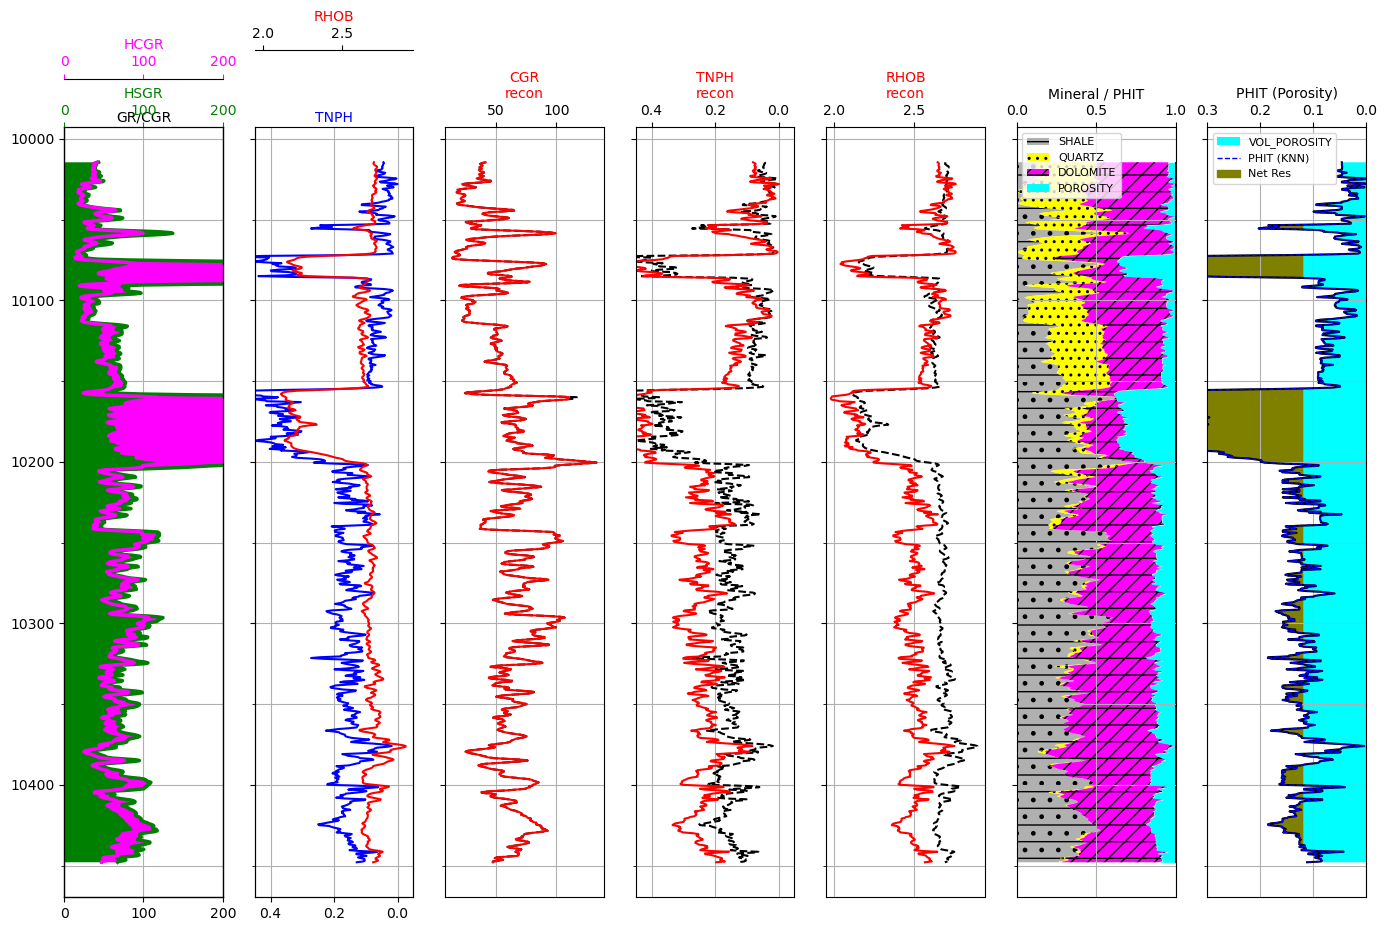

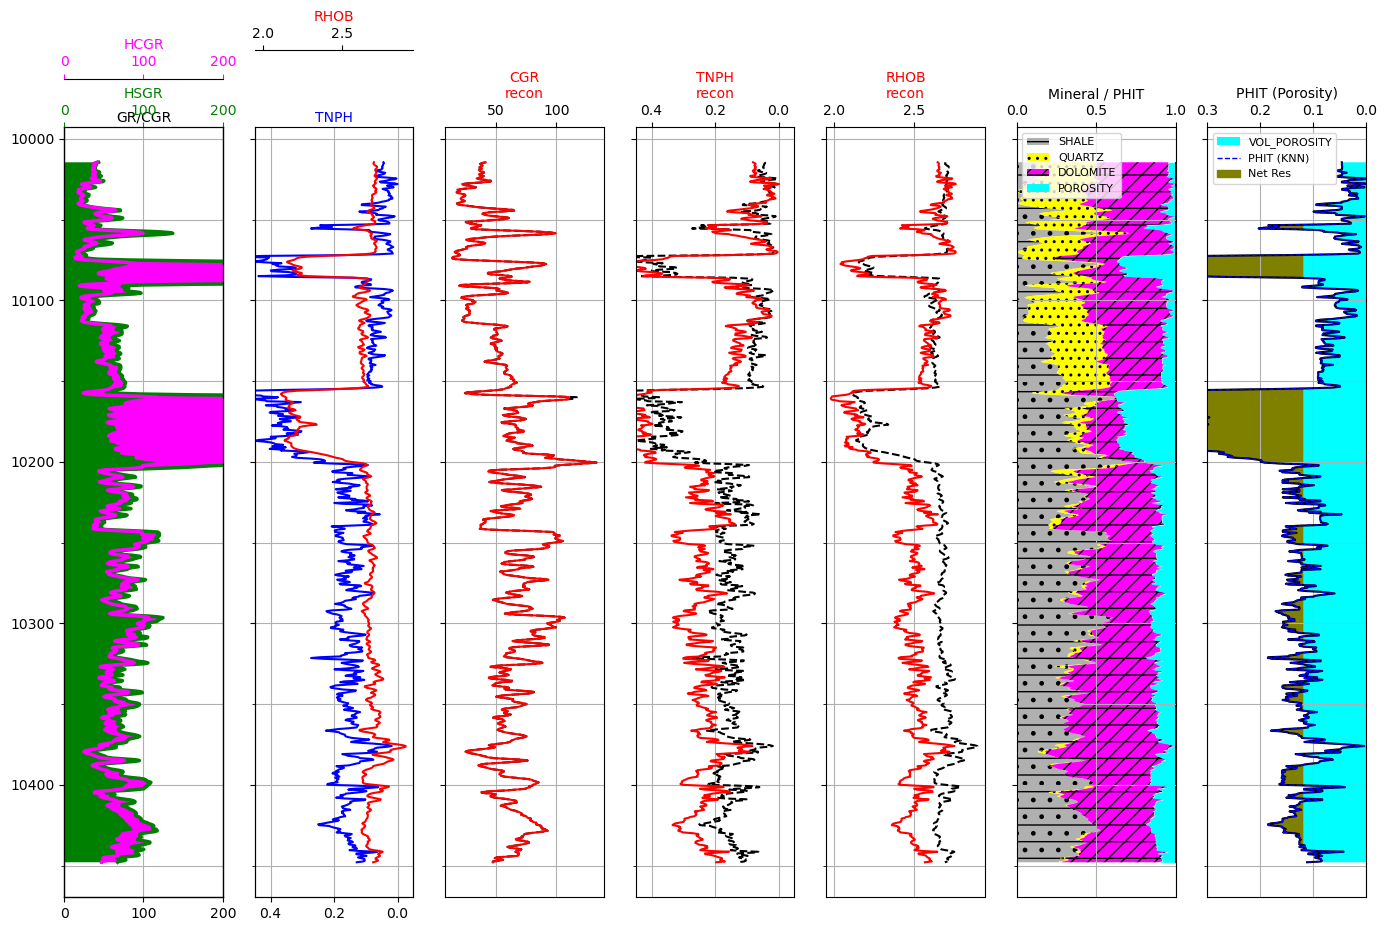

In [35]:
# ===========================================================
# FLEXIBLE LITH + RECON DEPTH PLOT (FULL CELL)
# - Uses responses_table naming: GR, TNPH, RHOB, DTCO, PEF
# - Uses mineral naming: QUARTZ, CALCITE, DOLOMITE, SHALE, POROSITY
# - Supports POROSITY fixed from analysis_df["PHIT"] (KNN chartbook)
#   or from analysis_df["VOL_POROSITY"] if you stored it there.
# - Stack colors/hatches follow your conventions.
# ===========================================================

import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator

# -----------------------------
# Mineral styles (your conventions)
# -----------------------------
MIN_STYLE = {
    "QUARTZ":   dict(facecolor="yellow",     hatch="..",  edgecolor="black"),  # back-dot hatch
    "DOLOMITE": dict(facecolor="magenta",    hatch="/-/", edgecolor="black"),  # dolomite-type hatch
    "CALCITE":  dict(facecolor="dodgerblue", hatch="++",  edgecolor="black"),  # limestone style
    "SHALE":    dict(facecolor="#b0b0b0",    hatch="-.",  edgecolor="black"),
    "POROSITY": dict(facecolor="cyan",       hatch=None,  edgecolor="black"),
}

def Plot_lith_flexible(
    analysis_df: pd.DataFrame,
    log_cols_map: dict,
    selected_logs: list,
    selected_mins: list,
    dept_col: str = "DEPT",
    rt_curve_name: str | None = None,
    gr_xlim=(0, 200),
    tnph_xlim=(0.45, -0.05),
    rhob_xlim=(1.95, 2.95),
    dtco_xlim=(140, 40),
    pef_xlim=(0, 6),
    rt_xlim=(0.2, 2000),
    phit_xlim=(0.30, 0.0),
    y_major=100,
    y_minor=50,
    mineral_order: list | None = None,   # optional: force stack order
    savepath: str | None = None,
):
    """
    Expects:
      - dept_col exists in analysis_df
      - measured log columns exist in analysis_df (via log_cols_map, keys like "GR","TNPH"...)
      - recon columns (optional) named like: f"{LOG}_RECON"
      - volume columns (optional) named like: f"VOL_{MIN}"
      - porosity source preferred order:
            1) analysis_df["VOL_POROSITY"]
            2) analysis_df["PHIT"]  (KNN chartbook)
    """

    df = analysis_df.copy()

    # normalize names
    selected_logs = [str(x).strip().upper() for x in selected_logs]
    selected_mins = [str(x).strip().upper() for x in selected_mins]

    # depth
    if dept_col not in df.columns:
        raise ValueError(f"'{dept_col}' not found in analysis_df")
    dept = pd.to_numeric(df[dept_col], errors="coerce").to_numpy()

    # measured arrays
    measured = {}
    for lg in selected_logs:
        df_col = log_cols_map.get(lg, None)
        if df_col is None or df_col not in df.columns:
            measured[lg] = None
        else:
            measured[lg] = pd.to_numeric(df[df_col], errors="coerce").to_numpy()

    # x-lims
    xlims = {
        "GR": gr_xlim,
        "TNPH": tnph_xlim,
        "RHOB": rhob_xlim,
        "DTCO": dtco_xlim,
        "PEF": pef_xlim,
    }


    gr_candidates=("GR_EDTC","HSGR","GR","SGR","HGR"),
    cgr_candidates=("CGR","HCGR"),
    plot_cgr=True,


    def _pick_curve(dfcols, candidates):
        s = set(dfcols)
        for c in candidates:
            if c in s:
                return c
        return None






    
    # track counts
    n_meas_tracks = 1          # GR
    n_meas_tracks += 1         # TNPH/RHOB combo
    n_meas_tracks += 1 if (rt_curve_name is not None and rt_curve_name in df.columns) else 0
    n_recon_tracks = len(selected_logs)
    n_stack_tracks = 1
    n_phi_tracks = 1

    ncols = n_meas_tracks + n_recon_tracks + n_stack_tracks + n_phi_tracks

    fig = plt.figure(figsize=(2.4 * ncols, 10))
    ax = []
    for k in range(ncols):
        ax.append(fig.add_subplot(1, ncols, k + 1) if k == 0 else fig.add_subplot(1, ncols, k + 1, sharey=ax[0]))

    # Y formatting
    ax[0].yaxis.set_major_locator(MultipleLocator(y_major))
    ax[0].yaxis.set_minor_locator(MultipleLocator(y_minor))
    ax[0].invert_yaxis()

    for a in ax:
        a.tick_params(which="both", top=True, labeltop=True, bottom=False, labelbottom=False)

    col = 0

    # -----------------------------
    # Track 0: GR + CGR (like your other plots)
    # -----------------------------
    # Prefer explicit mapping first; otherwise fall back to candidates
    gr_col  = log_cols_map.get("GR", None)
    cgr_col = log_cols_map.get("CGR", None)

    if (gr_col is None) or (gr_col not in df.columns):
        gr_col = _pick_curve(df.columns, gr_candidates)

    if plot_cgr:
        if (cgr_col is None) or (cgr_col not in df.columns):
            cgr_col = _pick_curve(df.columns, cgr_candidates)
    else:
        cgr_col = None

    gr_vals  = pd.to_numeric(df[gr_col], errors="coerce").to_numpy() if gr_col else None
    cgr_vals = pd.to_numeric(df[cgr_col], errors="coerce").to_numpy() if cgr_col else None

    ax[col].set_xlim(*xlims["GR"])
    ax[col].set_xlabel("GR/CGR")
    ax[col].xaxis.set_label_position("top")
    ax[col].grid(True, which="both")
    ax[col].tick_params(labelleft=True)

    # Fill layer (hidden x-axis)
    a_fill = ax[col].twiny()
    a_fill.set_xlim(*xlims["GR"])
    a_fill.spines["top"].set_visible(False)
    a_fill.get_xaxis().set_visible(False)
    a_fill.grid(False)

    if (cgr_vals is not None) and np.any(np.isfinite(cgr_vals)):
        a_fill.fill_betweenx(
            dept, 0.0, cgr_vals,
            where=np.isfinite(cgr_vals),
            facecolor="green", alpha=1.0
        )

    if (gr_vals is not None) and (cgr_vals is not None) and np.any(np.isfinite(gr_vals)) and np.any(np.isfinite(cgr_vals)):
        a_fill.fill_betweenx(
            dept, cgr_vals, gr_vals,
            where=np.isfinite(gr_vals) & np.isfinite(cgr_vals) & (gr_vals >= cgr_vals),
            facecolor="magenta", alpha=1.0
        )

    if (gr_vals is not None) and (cgr_vals is None) and np.any(np.isfinite(gr_vals)):
        a_fill.fill_betweenx(
            dept, 0.0, gr_vals,
            where=np.isfinite(gr_vals),
            facecolor="green", alpha=0.25
        )

    # Plot GR and CGR as twiny axes (offset labels)
    if (gr_vals is not None) and np.any(np.isfinite(gr_vals)):
        a = ax[col].twiny()
        a.set_xlim(*xlims["GR"])
        a.plot(gr_vals, dept, color="green", linewidth=2.5)
        a.set_xlabel(gr_col, color="green")
        a.tick_params(axis="x", colors="green")
        a.spines["top"].set_position(("outward", 0))
        a.grid(False)
    else:
        ax[col].set_xlabel("GR (missing)")

    if (cgr_vals is not None) and np.any(np.isfinite(cgr_vals)):
        a = ax[col].twiny()
        a.set_xlim(*xlims["GR"])
        a.plot(cgr_vals, dept, color="magenta", linewidth=2.5)
        a.set_xlabel(cgr_col, color="magenta")
        a.tick_params(axis="x", colors="magenta")
        a.spines["top"].set_position(("outward", 35))
        a.grid(False)

    col += 1

    # -----------------------------
    # Track 1: TNPH + RHOB (twiny)
    # -----------------------------
    tnph_present = measured.get("TNPH") is not None
    rhob_present = measured.get("RHOB") is not None

    if tnph_present:
        ax[col].plot(measured["TNPH"], dept, color="blue")
        ax[col].set_xlim(*xlims["TNPH"])
        ax[col].set_xlabel("TNPH", color="blue")
    else:
        ax[col].set_xlabel("TNPH (missing)")
    ax[col].xaxis.set_label_position("top")
    ax[col].tick_params(labelleft=False)
    ax[col].grid(True, which="both")

    if rhob_present:
        t = ax[col].twiny()
        t.plot(measured["RHOB"], dept, color="red")
        t.set_xlim(*xlims["RHOB"])
        t.set_xlabel("RHOB", color="red")
        t.tick_params(labelleft=False, top=True, labeltop=True, bottom=False, labelbottom=False)
        t.xaxis.set_label_position("top")
        t.spines.top.set_position(("axes", 1.10))

    col += 1

    # -----------------------------
    # Optional Track: RT
    # -----------------------------
    if rt_curve_name is not None and rt_curve_name in df.columns:
        rt = pd.to_numeric(df[rt_curve_name], errors="coerce").to_numpy()
        ax[col].plot(rt, dept, "--", color="black")
        ax[col].set_xscale("log")
        ax[col].set_xlim(*rt_xlim)
        ax[col].set_xlabel(rt_curve_name)
        ax[col].xaxis.set_label_position("top")
        ax[col].tick_params(labelleft=False)
        ax[col].grid(True, which="both")
        col += 1

    # -----------------------------
    # Recon tracks: one per selected log
    # (measured dashed + recon red)
    # -----------------------------
    for lg in selected_logs:
        recon_col = f"{lg}_RECON"
        meas = measured.get(lg, None)
        recon = pd.to_numeric(df[recon_col], errors="coerce").to_numpy() if recon_col in df.columns else None

        if meas is not None:
            ax[col].plot(meas, dept, "--", color="black")
        if recon is not None:
            ax[col].plot(recon, dept, "-", color="red")

        ax[col].set_xlabel(f"{lg}\nrecon", color="red")
        ax[col].xaxis.set_label_position("top")
        ax[col].tick_params(labelleft=False)
        ax[col].grid(True, which="both")

        if lg in xlims:
            ax[col].set_xlim(*xlims[lg])

        col += 1

    # -----------------------------
    # Stacked mineral volumes
    # - uses VOL_<MIN> for solids
    # - POROSITY uses VOL_POROSITY if present, else PHIT if present
    # -----------------------------
    stack_ax = ax[col]
    stack_ax.set_xlim(0, 1)
    stack_ax.set_xlabel("Mineral / PHIT")
    stack_ax.xaxis.set_label_position("top")
    stack_ax.tick_params(labelleft=False)
    stack_ax.grid(True, which="both")

    # minerals to plot (ensure POROSITY included if available)
    plot_mins = list(selected_mins)
    if ("VOL_POROSITY" in df.columns or "PHIT" in df.columns) and ("POROSITY" not in plot_mins):
        plot_mins.append("POROSITY")

    if mineral_order is None:
        preferred = ["SHALE", "QUARTZ", "DOLOMITE", "CALCITE", "POROSITY"]
        mineral_order = [m for m in preferred if m in plot_mins] + [m for m in plot_mins if m not in preferred]

    cum = np.zeros(len(df), dtype=float)

    for m in mineral_order:

        # POROSITY: prefer VOL_POROSITY else PHIT
        if m == "POROSITY":
            if "VOL_POROSITY" in df.columns:
                v = pd.to_numeric(df["VOL_POROSITY"], errors="coerce").fillna(0.0).to_numpy()
            elif "PHIT" in df.columns:
                v = pd.to_numeric(df["PHIT"], errors="coerce").fillna(0.0).to_numpy()
            else:
                continue
        else:
            vcol = f"VOL_{m}"
            if vcol not in df.columns:
                continue
            v = pd.to_numeric(df[vcol], errors="coerce").fillna(0.0).to_numpy()

        v = np.clip(v, 0, 1)

        st = MIN_STYLE.get(m, dict(facecolor="lightgray", hatch=None, edgecolor="black"))
        stack_ax.fill_betweenx(
            dept,
            cum,
            cum + v,
            facecolor=st["facecolor"],
            edgecolor=st.get("edgecolor", "black"),
            hatch=st.get("hatch", None),
            linewidth=0.0,
            alpha=1.0,
            label=m
        )
        cum = cum + v

    # remainder (should be tiny if sums are consistent)
    stack_ax.fill_betweenx(dept, cum, 1.0, color="black", alpha=1.0)
    stack_ax.legend(loc="upper left", fontsize=8)

    col += 1

    # -----------------------------
    # PHIT / NetRes Track
    # - prefers VOL_POROSITY, else PHIT (KNN)
    # - overlays PHIT if both exist
    # -----------------------------
    phi_ax = ax[col]
    phi_ax.set_xlabel("PHIT (Porosity)")
    phi_ax.xaxis.set_label_position("top")
    phi_ax.tick_params(labelleft=False)
    phi_ax.grid(True, which="both")
    phi_ax.set_xlim(*phit_xlim)

    phit_series = None
    phit_label = None

    if "VOL_POROSITY" in df.columns:
        phit_series = pd.to_numeric(df["VOL_POROSITY"], errors="coerce").to_numpy()
        phit_label = "VOL_POROSITY"
    elif "PHIT" in df.columns:
        phit_series = pd.to_numeric(df["PHIT"], errors="coerce").to_numpy()
        phit_label = "PHIT (KNN)"

    if phit_series is not None:
        phi_ax.plot(phit_series, dept, "-", color="black")
        phi_ax.fill_betweenx(dept, 0.0, phit_series, facecolor="cyan", alpha=1.0, label=phit_label)

        # overlay KNN PHIT for QC if both exist
        if ("PHIT" in df.columns) and ("VOL_POROSITY" in df.columns):
            phit_knn = pd.to_numeric(df["PHIT"], errors="coerce").to_numpy()
            phi_ax.plot(phit_knn, dept, "--", color="blue", linewidth=1.0, label="PHIT (KNN)")

        cutoff = 0.12
        phi_ax.fill_betweenx(dept, cutoff, phit_series, where=phit_series > cutoff, color="olive", alpha=1.0, label="Net Res")
        phi_ax.legend(loc="upper left", fontsize=8)
    else:
        phi_ax.text(0.1, 0.5, "No PHIT found (need VOL_POROSITY or PHIT)", transform=phi_ax.transAxes)

    # -----------------------------
    # Save/show
    # -----------------------------
    if savepath:
        fig.savefig(savepath, bbox_inches="tight", dpi=200)

    plt.show()

    plt.close()
    
    return fig


# -----------------------------
# Example call
# -----------------------------
Plot_lith_flexible(
     analysis_df=analysis_df,
     log_cols_map=log_cols_map,
     selected_logs=selected_logs,   # list of LOG names, e.g. ["GR","TNPH","RHOB","PEF"]
     selected_mins=selected_mins,   # list of mineral names, e.g. ["QUARTZ","DOLOMITE","SHALE"] (POROSITY optional)
     dept_col="DEPT",
     rt_curve_name=None,
     savepath="fig1.png",
)


---
# 6) Calculate Shale Volumes using Multiple Shale Indicators Combined using Hodges-Lehman for the final Vshale.

## **Start with Vshale from Gamma Ray (Vsh_GR):** *Define GR Clean and Shale Picks*

In [36]:
analysis_df.head()

DEPT     AF20     AF30     AF60     AF90     AT10     AT20     AT30  \
0  10014.5  35.4291  36.0545  34.6776  33.7466  34.8235  36.0539  36.1690   
1  10015.0  34.7363  35.3384  34.2665  33.0637  33.4687  34.7842  35.1602   
2  10015.5  33.7468  34.2449  33.2316  32.0649  33.9433  35.0157  35.5212   
3  10016.0  32.6053  33.0875  32.1826  30.9865  32.6699  33.4086  33.6530   
4  10016.5  31.5422  32.0603  31.1223  29.8935  30.8497  31.9016  32.0096   

      AT60     AT90  ...    RHOMAA          U  VOL_QUARTZ  VOL_DOLOMITE  \
0  34.6224  34.7873  ...  2.771209  12.819013    0.368323      0.434132   
1  34.3309  33.5909  ...  2.770870  12.801624    0.373027      0.446619   
2  34.5650  33.8314  ...  2.770577  12.829958    0.375568      0.454224   
3  32.7937  31.9906  ...  2.771793  12.778133    0.372971      0.450927   
4  30.6766  30.2279  ...  2.773755  12.688393    0.369561      0.446463   

   VOL_SHALE  VOL_POROSITY  CGR_RECON  TNPH_RECON  RHOB_RECON     Error  
0   0.151651      0.045894  41.271862    0.080563    2.651626  0.029567  
1   0.134459      0.045895  38.451392    0.075331    2.656951  0.025424  
2   0.124269      0.045939  36.769876    0.072285    2.660083  0.022026  
3   0.130236      0.045866  37.710050    0.074077    2.658576  0.024517  
4   0.138280      0.045696  38.981392    0.076416    2.656651  0.028057  

[5 rows x 85 columns]

In [37]:
"""
===============================================================================
           The following are the log parameter inputs for all calculations
===============================================================================

===============================================================================
 Shale and Porosity Parameters for many Calculations
    Mihai has a 100% clay point that I do not think is possible.
    We use a 100% shale point
===============================================================================
"""
# GR endpoint parameters for shale calculations
gr_clean, gr_shale      = 25  , 160                             # Shale Parmaetrs for GR

# SP endpoint parameters for shale calculations
sp_clean, sp_shale      = -50  , 0                              # Shale Parameters for SP

# Endpoint Parameters for Neutron-Density Shale Triangle
neut_shale, den_shale   = 0.49 , 2.65                           # Shale Parmaters for Neutron-Density
neut_matrix, den_matrix = -0.04 , 2.65                          # Matrix Parmameters for Neutron-Density
neut_fl, den_fl         =  1.0 , 1.1                            # Fluid Parmameters for Neutron-Density

# Fluid Parameters for MRIL tool
mphi_shale              = 0.0                                   # MRIL Parameters

# Fluid Parameters for Sonic tool                               # Sonic Parameters
dt_matrix, dt_fl, dt_shale = 55.5,  188.0,  90.0
cp, alpha                  =   1,    5/8                                           

# Rt Shale parameters
rt_shale = 6
rt_clean = 170

mphi_shale  = 0.0 




In [38]:
# -----------------------------
# 4) Candidate lists (families)
# -----------------------------
gr_cands   = ["HSGR", "GR", "SGR", "HGR"]
cgr_cands  = ["HCGR", "CGR"]

rhob_cands = ["RHOZ", "RHOB"]
tnph_cands = ["TNPH", "NPHI", "CNL", "NPOR"]
rt_cands   = ["AT90", "AF90", "AO90", "ILD", "RT"]

tcmr_cands = ["PHIT_NMR", "TCMR", "MPHIS"]
cmrp_cands = ["PHIE_NMR", "CMRP_3MS", "CMRP3MS", "CMRP", "MPHI"]

bvie_cands = ["BVIE", "BVI_E"]
cbw_cands  = ["CBW"]
ffi_cands  = ["FFI", "CMFF"]

pef_cands  = ["PEFZ","PEF8","PEF","PE"]
dtco_cands = ["DTCO","DTC","DT", "DTCO3"]

dept_cands = ["DEPT","DEPTH"]

# -----------------------------
# 5) Pick curves (family winners)
# -----------------------------
gr_curve    = first_present(analysis_df.columns, gr_cands)
cgr_curve   = first_present(analysis_df.columns, cgr_cands)
rhob_curve  = first_present(analysis_df.columns, rhob_cands)
tnph_curve  = first_present(analysis_df.columns, tnph_cands)
rt_curve    = first_present(analysis_df.columns, rt_cands)

tcmr_curve  = first_present(analysis_df.columns, tcmr_cands)
cmrp_curve  = first_present(analysis_df.columns, cmrp_cands)

cbw_curve   = first_present(analysis_df.columns, cbw_cands)
bvie_curve  = first_present(analysis_df.columns, bvie_cands)
ffi_curve   = first_present(analysis_df.columns, ffi_cands)

pef_curve   = first_present(analysis_df.columns, pef_cands)
dtco_curve  = first_present(analysis_df.columns, dtco_cands)

dept_curve  = first_present(analysis_df.columns, dept_cands)  # should be DEPT after our rename



print("\nCurves that could be used in our analysis:")
print()
print(f"  Density : {rhob_curve}")
print(f"  Neutron : {tnph_curve}")
print(f"  Rt      : {rt_curve}")
print(f"  GR      : {gr_curve}")
print(f"  CGR      : {cgr_curve}")
print(f"  TCMR    : {tcmr_curve}")
print(f"  CMRP    : {cmrp_curve}")
print(f"  CBW     : {cbw_curve}")
print(f"  BVIE    : {bvie_curve}")
print(f"  FFI     : {ffi_curve}")
print(f"  PEF     : {pef_curve}")
print(f"  DTCO     : {dtco_curve}")
print(f"  DEPT     : {dept_curve}")




gr = analysis_df[gr_curve].astype(float).to_numpy()

if cgr_curve:
    cgr = analysis_df[cgr_curve].astype(float).to_numpy()
    
tnph = analysis_df[tnph_curve].astype(float).to_numpy()
rhob = analysis_df[rhob_curve].astype(float).to_numpy()
pef = analysis_df[pef_curve].astype(float).to_numpy()

if dtco_curve:
    dtco = analysis_df[dtco_curve].astype(float).to_numpy()
    
rt =  analysis_df[rt_curve].astype(float).to_numpy()

if tcmr_curve:
    tcmr =  analysis_df[tcmr_curve].astype(float).to_numpy()
    cmrp =  analysis_df[cmrp_curve].astype(float).to_numpy()
    bvie =  analysis_df[bvie_curve].astype(float).to_numpy()

dept =  analysis_df[dept_curve].astype(float).to_numpy()

vol_shale =  analysis_df["VOL_SHALE"].astype(float).to_numpy()



Curves that could be used in our analysis:

  Density : RHOZ
  Neutron : NPOR
  Rt      : AT90
  GR      : HSGR
  CGR      : HCGR
  TCMR    : PHIT_NMR
  CMRP    : PHIE_NMR
  CBW     : CBW
  BVIE    : BVIE
  FFI     : FFI
  PEF     : PEFZ
  DTCO     : DTCO
  DEPT     : DEPT


In [39]:
'''
Final Shale Parameters:
'''

import matplotlib
import matplotlib.pyplot as plt
from matplotlib import gridspec



def shale_plot3(  gr_clean, gr_shale, neut_shale, dt_matrix, dt_shale):
    
    # =============================================================================
    # We will create several displays (GR,SP vs DEPTH track, histograms, N-D
    # crossplot, vsh track) in order to see and choose the right parameters
    # for our clay/clean formations as well as to compare the results of all
    # vsh methods calculated above.
    # =============================================================================

    fig = plt.figure(figsize=(20,12))
    fig.suptitle('Shale Parameter Plot: Volume of Shale from Different Methods',color='blue' , fontsize=18)
    #fig.subplots_adjust(top=0.85,wspace=0.3, hspace =0.3)

    gs = gridspec.GridSpec(4, 4)
    ax1 = fig.add_subplot(gs[:,0])
    ax3 = fig.add_subplot(gs[0,1])
    ax2 = fig.add_subplot(gs[1,1])
    ax4 = fig.add_subplot(gs[2,1])
    ax5 = fig.add_subplot(gs[3,1])
    ax6 = fig.add_subplot(gs[:,2],sharey = ax1)
    ax7 = fig.add_subplot(gs[:,3],sharey = ax1)
 
    if cgr_curve:
    # Graph for GR,SP
        ax1.twiny()
        #ax1.invert_yaxis()
        ax1.grid(True)
        ax1.set_ylabel('DEPTH')
        ax1.plot(cgr, dept, color='green',linewidth = 3.0,label= 'CGR')
        ax1.set_title('CGR', color = 'blue')
        ax1.set_xlabel('CGR [api]', color='green')
        ax1.axvline(x=gr_clean,  color='lime',  linestyle='-',linewidth = 3.0, label= 'gr_clean')
        ax1.axvline(x=gr_shale,  color='olive', linestyle='-.',linewidth = 3.0, label= 'gr_shale')
    else:
        ax1.twiny()
        #ax1.invert_yaxis()
        ax1.grid(True)
        ax1.set_ylabel('DEPTH')
        ax1.plot(gr, dept, color='green',linewidth = 3.0,label= 'GR')
        ax1.set_title('GR', color = 'blue')
        ax1.set_xlabel('GR [api]', color='green')
        ax1.axvline(x=gr_clean,  color='lime',  linestyle='-',linewidth = 3.0, label= 'gr_clean')
        ax1.axvline(x=gr_shale,  color='olive', linestyle='-.',linewidth = 3.0, label= 'gr_shale')


        

    if dtco_curve:
        ax1.plot(dtco, dept, color='blue', linewidth = 4.0,linestyle='--',label= 'DTCO')
        ax1.set_title('DTCO                     GR', color = 'blue')
        ax1.set_xlabel("DTCO [,  GR ",color='black')
        ax1.axvline(x=dt_matrix,  color='cyan',   linestyle='-',linewidth = 3.0, label= 'dt_clean')
        ax1.axvline(x=dt_shale,  color='dodgerblue' ,  linestyle='-',linewidth = 3.0, label= 'dt_shale')
        ax1.legend()
        ax1.set_xlim(0,200)
        ax1.legend()


    if cgr_curve:
        #The histogram of GR
        ax2.hist(cgr,bins=100,color='green')
        ax2.axvline(x=gr_clean,  color='blue',  linestyle='-', label= 'gr_clean')
        ax2.axvline(x=gr_shale,  color='brown', linestyle='-.', label= 'gr_shale')
        #ax2.fill_betweenx(analysis_df.GR, gr_clean, gr_shale,color='yellow',label= 'GR',alpha=0.1)    
        ax2.axvspan(gr_clean,gr_shale,alpha=0.1,color='yellow',label='GR')
        ax2.set_xlim(0,200)
        ax2.set_title('CGR [api] Histogram', color ='green')
        #ax2.set_xlabel('GR [api]')
        ax2.set_ylabel('Frequency')
        ax2.grid(True)
    else:
        #The histogram of GR
        ax2.hist(gr,bins=100,color='green')
        ax2.axvline(x=gr_clean,  color='blue',  linestyle='-', label= 'gr_clean')
        ax2.axvline(x=gr_shale,  color='brown', linestyle='-.', label= 'gr_shale')
        #ax2.fill_betweenx(analysis_df.GR, gr_clean, gr_shale,color='yellow',label= 'GR',alpha=0.1)    
        ax2.axvspan(gr_clean,gr_shale,alpha=0.1,color='yellow',label='GR')
        ax2.set_xlim(0,200)
        ax2.set_title('GR [api] Histogram', color ='green')
        #ax2.set_xlabel('GR [api]')
        ax2.set_ylabel('Frequency')
        ax2.grid(True)

    

    if dtco_curve:
        # N-D XPlot for Volume of Shale
        ax3.plot(dtco, rhob,'ro',markersize=4)
        ax3.set_title('DTCO - RHOB Xplot', color = 'blue')
        ax3.set_xlabel('DTCO [v/v]')
        ax3.set_xlim(40,140)
        ax3.set_ylim(3,1.0)
        ax3.set_ylabel('RHOB [g/cc]')
        ax3.grid(True)
        ax3.text(0.05, 2.1, 'clean line', color='red', fontsize=8)
        ax3.text(dt_shale, 2.65, 'shale point',color='red', fontsize=8)
        ax3.text(dt_matrix, 2.65, 'martrix point',color='red', fontsize=8)
        ax3.text(140, 1.1, 'fluid point',color='red', fontsize=8)
        # Plot Shale Triangle Dt-D
        ax3.plot([dt_matrix,dt_fl],[den_matrix,den_fl], marker='o', color='blue') # this is clean line
        ax3.plot([dt_matrix,dt_shale],[den_matrix,den_shale], marker='o', color='blue') #this is to the shale point
        ax3.plot([dt_shale,dt_fl],[den_shale,den_fl], marker='o', color='blue') #this is from the shale point to 100% porosity line
        ax3.plot(dt_shale,den_shale,'bo')#,color='blue')

    
    '''#The histogram of SP  
    ax3.hist(analysis_df.SP.dropna(),bins=20, color='black')
    ax3.set_xlim(-75,25)
    ax3.set_title('SP [mV] Histogram', color = 'black')    
    #ax3.set_xlabel('SP [mV]')
    ax3.set_ylabel('Frequency')
    ax3.axvline(x=sp_clean,  color='red'  ,  linestyle='-',linewidth = 3.0, label= 'sp_clean')
    ax3.axvline(x=sp_shale,  color='gray' ,  linestyle='-',linewidth = 3.0, label= 'sp_shale')
    #ax3.fill_betweenx(analysis_df.GR, sp_clean, sp_shale,  color='gray',label= 'SP',alpha=0.1)    
    ax3.axvspan(sp_clean,sp_shale,alpha=0.1,color='yellow',label='SP')
    ax3.grid(True)'''

    # N-MPHI XPlot for Volume of Shale
    ax4.plot(tnph, cmrp,'ro',markersize=4)
    ax4.set_title('NPHI - CMRP Xplot', color = 'blue')
    #ax4.set_xlabel('NPHI [v/v]')
    ax4.set_xlim(-.05,1.0)
    ax4.set_ylim(0,1.0)
    ax4.set_ylabel('CMRP [V/V]')
    ax4.grid(True)
    ax4.text(0.05, 0, 'clean line', color='red', fontsize=8)
    ax4.text(neut_shale, 0, 'shale point',color='red', fontsize=8)
    ax4.text(1, 1, 'fluid point',color='red', fontsize=8)




    # Plot Shale Triangle N-Mphi
    ax4.plot([neut_matrix,neut_fl],[0,1], marker='o', color='blue') # this is clean line
    ax4.plot([neut_matrix,neut_shale],[0,mphi_shale], marker='o', color='blue') #this is to the shale point
    ax4.plot([neut_shale,1],[mphi_shale,1], marker='o', color='blue') #this is from the shale point to 100% porosity line
    ax4.plot(neut_shale,mphi_shale,'bo')#,color='blue')
    ax4.fill_between([0,0], [1,1], [neut_shale,mphi_shale], color='yellow', alpha=0.1)    
    
    
    # N-D XPlot for Volume of Shale
    ax5.plot(tnph, rhob,'ro',markersize=4)
    ax5.set_title('NPHI - RHOB Xplot', color = 'blue')
    ax5.set_xlabel('NPHI [v/v]')
    ax5.set_xlim(-.05,1.0)
    ax5.set_ylim(3,1.0)
    ax5.set_ylabel('RHOB [g/cc]')
    ax5.grid(True)
    ax5.text(0.05, 2.1, 'clean line', color='red', fontsize=8)
    ax5.text(neut_shale, 2.95, 'shale point',color='red', fontsize=8)
    ax5.text(0.6, 1.2, 'fluid point',color='red', fontsize=8)

    # Plot Shale Triangle N-D
    ax5.plot([neut_matrix,neut_fl],[den_matrix,den_fl], marker='o', color='blue') # this is clean line
    ax5.plot([neut_matrix,neut_shale],[den_matrix,den_shale], marker='o', color='blue') #this is to the shale point
    ax5.plot([neut_shale,1],[den_shale,den_fl], marker='o', color='blue') #this is from the shale point to 100% porosity line
    ax5.plot(neut_shale,den_shale,'bo')#,color='blue')

    ax5.fill_between([0,2.65], [1,1], [neut_shale,2.65], color='yellow', alpha=0.1)    
    


    ''' Endpoint Parameters for Neutron-Density Shale Triangle
    neut_shale, den_shale   = 0.32 , 2.65                           # Shale Parmaters for Neutron-Density
    neut_matrix, den_matrix = -0.04 , 2.65                          # Matrix Parmameters for Neutron-Density
    neut_fl, den_fl         =  1.0 , 1.1                            # Fluid Parmameters for Neutron-Density
   '''
    
    def vshgr(gr, gr_clean, gr_shale, clip=True):
        """
        Linear GR Vsh:
          Vsh = (GR - GR_clean) / (GR_shale - GR_clean)
        gr_log can be numpy array or pandas Series.
        gr_clean, gr_shale can be scalars (floats) or arrays.
        """
        #gr_log = np.asarray(gr_log, dtype=float)
        denom = (gr_shale - gr_clean)
        if np.any(np.asarray(denom) == 0):
            raise ValueError("gr_shale - gr_clean is zero (or contains zeros). Fix gr_clean/gr_shale.")
        vshgr = (gr - gr_clean) / denom
        # Replace inf/-inf with nan
        vshgr = np.where(np.isfinite(vshgr), vshgr, np.nan)
        if clip:
            vshgr = np.clip(vshgr, 0.0, 1.0)
        return vshgr


    # vsh Dt vs. bulk density
    def vshdtden(dt_log,den_log,  dt_matrix,den_matrix, dt_fl, den_fl,  dt_shale,den_shale):
        term1 = (den_fl - den_matrix)*(dt_log-dt_matrix)   - (den_log - den_matrix)*(dt_fl - dt_matrix)
        term2 = (den_fl - den_matrix)*(dt_shale-dt_matrix) - (den_shale-den_matrix)*(dt_fl - dt_matrix)
        vshdtden=term1/term2
        return vshdtden
    
    
    def vshcmr(nphi, mphi , nphi_sh, mphi_sh):
        #--------------------------------------------------
        #
        #    COMPUTE VSH FROM MPHI-NPHI Shale TRIANGLE
        #
        #--------------------------------------------------
        #mphi_shale = 0.0
        phi = (mphi * nphi_sh - nphi * mphi_sh)/(nphi_sh - mphi_sh)
        vshnmphi = (nphi - phi)/(nphi_sh)
        return vshnmphi
    
    def vshnd(neut_log,den_log,neut_matrix,den_matrix,neut_fl,den_fl,neut_shale,den_shale):
        term1 = (den_fl-den_matrix)*(neut_log-neut_matrix)-(den_log-den_matrix)*(neut_fl-neut_matrix)
        term2 =(den_fl-den_matrix)*(neut_shale-neut_matrix)-(den_shale-den_matrix)*(neut_fl-neut_matrix)
        vshnd=term1/term2
        return vshnd

    
    if cgr_curve:
        analysis_df["Vshgr"] = vshgr(cgr, gr_clean, gr_shale)
        ax6.plot(analysis_df["Vshgr"], dept, label ='Vsh_CGR',color="green", linewidth = 3.0)

    else:
        analysis_df["Vshgr"] = vshgr(gr, gr_clean, gr_shale)
        ax6.plot(analysis_df["Vshgr"], dept, label ='Vsh_GR',color="green", linewidth = 3.0)

    #plt.title("Volume of Shale")
    ax6.twiny()  
    #ax6.plot(vshgr(gr, gr_clean, gr_shale), dept, label ='Vsh_GR',color="green", linewidth = 3.0)



    if dtco_curve:
        analysis_df['Vshdtden']  =  vshdtden(dtco,rhob,  dt_matrix,den_matrix ,dt_fl, den_fl,  dt_shale,den_shale)
        #ax6.plot(vshdtden(dtco,rhob,  dt_matrix,den_matrix,  dt_fl ,den_fl,  dt_shale,den_shale), dept,label ='Vsh_DT_Den',color="blue", linewidth = 2.0)
        ax6.plot(analysis_df['Vshdtden'], dept,label ='Vsh_DT_Den',color="blue", linewidth = 2.0)
    
    analysis_df['Vshnd'] = vshnd(tnph,rhob,neut_matrix,den_matrix,neut_fl,den_fl,neut_shale,den_shale)
    analysis_df['Vshcmr'] = vshcmr(tnph, cmrp , neut_shale, mphi_shale)
    #ax6.plot(vshnd(tnph,rhob,neut_matrix,den_matrix,neut_fl,den_fl,neut_shale,den_shale), analysis_df.DEPT,label ='Vsh_ND',color="red")
    ax6.plot(  analysis_df['Vshnd'], analysis_df.DEPT,label ='Vsh_ND',color="red")
    ax6.plot(  vol_shale, dept,label ='Vsh_OPT',color="magenta", linewidth = 3.0)
    
    
    
    ax6.set_title('Calculated Shale Volumes', color = 'blue')
    ax6.legend(loc='best',fontsize='12')
    ax6.set_xlim(0,1)
    #ax6.set_ylim(top_depth,bottom_depth)
    ##############ax6.invert_yaxis()
    ax6.grid(True)
    ax6.set_xlabel('Vsh [v.v]')
    
    
    '''
    #plt.title("Volume of Shale")
    #ax6.twiny()    
    ax6.plot(vshgr(analysis_df.GR, gr_clean, gr_shale), analysis_df.DEPT, label ='Vsh_GR',color="green", linewidth = 1.0)
    ax6.plot(vshnd(analysis_df.NPHI,analysis_df.RHOB,neut_matrix,den_matrix,neut_fl,den_fl,neut_shale,den_shale), analysis_df.DEPT,label ='Vsh_ND',color="red", linewidth = 1.0)
    ax6.plot(vshsp(analysis_df.SP, sp_clean, sp_shale), analysis_df.DEPT,label ='Vsh_SP',color="black", linewidth = 1.0)
    ax6.plot(vshdt(analysis_df.DT, dt_matrix, dt_shale), analysis_df.DEPT,label ='Vsh_DT',color="blue", linewidth = 1.0)
    ax6.plot(vshdtden(analysis_df.DT,analysis_df.RHOB,  dt_matrix,den_matrix,  dt_fluid,den_fl,  dt_shale,den_shale), analysis_df.DEPT,label ='Vsh_DT_Den',color="olive", linewidth = 1.0)
    ax6.plot(analysis_df.VOL_SH, analysis_df.DEPT,label ='Vsh Optim',color="orange", linewidth = 1.0)
    
    #(n,k,  dt_matrix,den_matrix,  dt_fluid,den_fl,  dt_shale,den_shale)
    #ax6.plot(vshnmphi(analysis_df.NPHI, analysis_df.MPHI , neut_shale, mphi_shale), analysis_df.DEPT,label ='Vsh_NeutMphi',color="blue", linewidth = 3.0)
    ax6.set_title('Calculated Shale Volumes', color = 'blue')
    ax6.legend(loc='best',fontsize='x-small')
    ax6.set_xlim(0,1)
    ax6.set_ylim(top_depth,bottom_depth)
    ax6.invert_yaxis()
    ax6.grid(True)
    ax6.set_xlabel('Vsh [v.v]')
   
    '''
    
    #ax7.twiny()
    ax7.grid(True)
    ax7.set_xlim(0.2,0)
    ax7.invert_yaxis()
    #ax7.spines['top'].set_position(('outward',40))
    ax7.set_title('NMR Log', color = 'blue')
    ax7.plot(cmrp, dept, label='BVIe[v/v]', color='black')
    ax7.plot(cmrp, dept, label='CMRP[v/v]', color='black')
    ax7.plot(tcmr, dept, label='TCMR[v/v]', color='black')
    ax7.set_xlabel('CMR[v/v]', color='black')    
    #ax7.tick_params(axis='x', colors='black')
    ax7.fill_betweenx(dept,cmrp, 0,color='blue',label= 'BVIe')
    ax7.fill_betweenx(dept,cmrp, bvie,color='yellow',label= 'Free Fluid')  
    ax7.fill_betweenx(dept,tcmr, cmrp,color='gray',label= 'CBW')  
    
    
    fig.tight_layout()
    
    return fig
    
    
    #plt.savefig ('vsh_plot.png', dpi=200, format='png')

    # =============================================================================
    # Use the histrograms to re-evaluate: - GR min, max (clean, clay) - SP
    # min, max (clean, clay) - RT min, max (clean, clay) From ND Xplot extract
    # the clean line and clay point.
    # 
    # All vshgr (you can apply any correction here), vshsp, vshrt and vshnd
    # curves are plotted in the same track for comparison. It is obvious that
    # the vshgr and vshnd match very well, comparing with the rest.
    # 
    # To simplify the intepretation we will accept the vshgr as the vsh.
    # Another approch is to consider vsh as the minimum value obtained through
    # several methods (vsh = min (vshgr,vshsp,vshnd)) or Hodges-Lehman Median Filter
    # =============================================================================





In [40]:
'''
This is the ipywidgets version
'''


dtclean_slider  = widgets.FloatSlider(min=20,max=140,step=1.0,value=dt_matrix,description='dt_matrix')
dtshale_slider  = widgets.FloatSlider(min=20,max=140,step=1.0,value=dt_shale,description='dt_shale')

#spclean_slider  = widgets.FloatSlider(min=-100,max=25,step=0.5,value=sp_clean,description='sp_clean')
#spshale_slider  = widgets.FloatSlider(min=-100,max=25,step=0.5,value=sp_shale,description='sp_shale')
grclean_slider  = widgets.FloatSlider(min=0,max=200,step=0.5,value=gr_clean,description='gr_clean')
grshale_slider  = widgets.FloatSlider(min=0,max=200,step=0.5,value=gr_shale,description='gr_shale')
neutshale_slider  = widgets.FloatSlider(min=0,max=0.80,step=0.01,value=neut_shale,description='neutron_shale')
#mphishale_slider  = pn.widgets.FloatSlider(start=0,end=0.30,step=0.01,value=mphi_shale,name='mphi_shale')


#pn.interact(shale_plot3, sp_clean = spclean_slider, sp_shale = spshale_slider, gr_clean = grclean_slider, gr_shale = grshale_slider, neut_shale=neutshale_slider)
#This code will create two sliders for frequency and amplitude, and a plot that updates according to the slider values.
widgets.interact(shale_plot3,  dt_matrix = dtclean_slider, dt_shale = dtshale_slider, gr_clean = grclean_slider, gr_shale = grshale_slider, neut_shale=neutshale_slider)
#This code will create two sliders for frequency and amplitude, and a plot that updates according to the slider values.
#pn.interact(shale_plot3, sp_clean = spclean_slider, sp_shale = spshale_slider, gr_clean = grclean_slider, gr_shale = grshale_slider, neut_shale=neutshale_slider)


interactive(children=(FloatSlider(value=25.0, description='gr_clean', max=200.0, step=0.5), FloatSlider(value=…

<function __main__.shale_plot3(gr_clean, gr_shale, neut_shale, dt_matrix, dt_shale)>

# Run this cell and all below:

In [41]:
gr_clean = grclean_slider.value 
gr_shale = grshale_slider.value
neut_shale = neutshale_slider.value
#mphi_shale = mphishale_slider.value
dt_clean = dtclean_slider.value 
dt_shale = dtshale_slider.value

#print(GR_cl ='gr_clean, ', GR_sh =', gr_shale, ', Neut_sh =',neut_shale,', Mphi_sh =',mphi_shale,', DT_cl =',dt_clean, ', DT_sh =', dt_shale)

print('GR_cl =',gr_clean, ', GR_sh =', gr_shale, ', Neut_sh =',neut_shale,', Mphi_sh =',mphi_shale,', DT_cl =',dt_clean, ', DT_sh =', dt_shale)


GR_cl = 25.0 , GR_sh = 160.0 , Neut_sh = 0.49 , Mphi_sh = 0.0 , DT_cl = 56.0 , DT_sh = 90.0


In [42]:
analysis_df.head()

DEPT     AF20     AF30     AF60     AF90     AT10     AT20     AT30  \
0  10014.5  35.4291  36.0545  34.6776  33.7466  34.8235  36.0539  36.1690   
1  10015.0  34.7363  35.3384  34.2665  33.0637  33.4687  34.7842  35.1602   
2  10015.5  33.7468  34.2449  33.2316  32.0649  33.9433  35.0157  35.5212   
3  10016.0  32.6053  33.0875  32.1826  30.9865  32.6699  33.4086  33.6530   
4  10016.5  31.5422  32.0603  31.1223  29.8935  30.8497  31.9016  32.0096   

      AT60     AT90  ...  VOL_SHALE  VOL_POROSITY  CGR_RECON  TNPH_RECON  \
0  34.6224  34.7873  ...   0.151651      0.045894  41.271862    0.080563   
1  34.3309  33.5909  ...   0.134459      0.045895  38.451392    0.075331   
2  34.5650  33.8314  ...   0.124269      0.045939  36.769876    0.072285   
3  32.7937  31.9906  ...   0.130236      0.045866  37.710050    0.074077   
4  30.6766  30.2279  ...   0.138280      0.045696  38.981392    0.076416   

   RHOB_RECON     Error     Vshgr  Vshdtden     Vshnd    Vshcmr  
0    2.651626  0.029567  0.120510  0.138687  0.223937  0.061429  
1    2.656951  0.025424  0.099639  0.136182  0.218897  0.059388  
2    2.660083  0.022026  0.087184  0.131924  0.220896  0.067143  
3    2.658576  0.024517  0.094150  0.145199  0.230058  0.072041  
4    2.656651  0.028057  0.103568  0.160478  0.237404  0.068367  

[5 rows x 89 columns]

## Hodges-Lehman Method:

### What Shale Indicators do you want to consider?"

In [43]:
import numpy as np
import panel as pn
import itertools

pn.extension()

print("\nCurves that could be used in our analysis:")
print()
print(f"  Density : {rhob_curve}")
print(f"  Neutron : {tnph_curve}")
print(f"  Rt      : {rt_curve}")
print(f"  GR      : {gr_curve}")
print(f"  CGR      : {cgr_curve}")
print(f"  TCMR    : {tcmr_curve}")
print(f"  CMRP    : {cmrp_curve}")
print(f"  CBW     : {cbw_curve}")
print(f"  BVIE    : {bvie_curve}")
print(f"  FFI     : {ffi_curve}")
print(f"  PEF     : {pef_curve}")
print(f"  DTCO     : {dtco_curve}")
print(f"  DEPT     : {dept_curve}")




# -----------------------------
# 1) Checkbox widget
# -----------------------------
checkbox_group = pn.widgets.CheckBoxGroup(
    name="Shale Indicators",
    value=["Vshgr", "Vshcmr", "Vshnd","Vshdtden","VOL_SHALE"],
    options=["Vshgr", "Vshcmr", "Vshnd","Vshdtden","VOL_SHALE"],
    inline=True
)

pn.Column(
    "### Select shale indicators for Hodges–Lehmann Vsh",
    checkbox_group
)





Curves that could be used in our analysis:

  Density : RHOZ
  Neutron : NPOR
  Rt      : AT90
  GR      : HSGR
  CGR      : HCGR
  TCMR    : PHIT_NMR
  CMRP    : PHIE_NMR
  CBW     : CBW
  BVIE    : BVIE
  FFI     : FFI
  PEF     : PEFZ
  DTCO     : DTCO
  DEPT     : DEPT


Column(sizing_mode='stretch_width')
    [0] Markdown(str, sizing_mode='stretch_width')
    [1] CheckBoxGroup(inline=True, name='Shale Indicators', options=['Vshgr', 'Vshcmr', ...], sizing_mode='stretch_width', value=['Vshgr', 'Vshcmr', ...])

In [44]:

# -----------------------------
# 2) Hodges–Lehmann (robust)
# -----------------------------
def hodges_lehmann_1d(x):
    """
    Hodges–Lehmann estimator for a 1D array-like.
    - Drops NaNs/infs
    - If 0 values -> NaN
    - If 1 value  -> that value
    - Else HL = median of all pairwise averages (including i=i is optional; here we use i<j)
    """
    x = np.asarray(x, dtype=float)
    x = x[np.isfinite(x)]
    n = x.size
    if n == 0:
        return np.nan
    if n == 1:
        return float(x[0])

    # pairwise averages for i<j
    avgs = [(x[i] + x[j]) / 2.0 for i in range(n) for j in range(i+1, n)]
    return float(np.median(avgs))

# -----------------------------
# 3) Compute HL curve from selected indicators
# -----------------------------
def compute_vsh_hl(event=None):
    cols = list(checkbox_group.value)
    print("Selected indicators:", cols)

    if not cols:
        analysis_df["VSH_HL"] = np.nan
        print("No indicators selected → VSH_HL set to NaN.")
        return

    # sanity check: columns exist
    missing = [c for c in cols if c not in analysis_df.columns]
    if missing:
        raise ValueError(f"Selected columns not found in analysis_df: {missing}")

    # build 2D array (n_depths x n_selected)
    vsh_array = analysis_df[cols].astype(float).to_numpy()

    # HL per depth row
    vsh_hl = np.array([hodges_lehmann_1d(vsh_array[i, :]) for i in range(vsh_array.shape[0])])

    analysis_df["VSH_HL"] = vsh_hl
    print("✅ Wrote analysis_df['VSH_HL']")
    display(analysis_df[cols + ["VSH_HL"]].head(10))



# Run once now
compute_vsh_hl()

# Recompute whenever checkbox changes
checkbox_group.param.watch(lambda e: compute_vsh_hl(), "value")



Selected indicators: ['Vshgr', 'Vshcmr', 'Vshnd', 'Vshdtden', 'VOL_SHALE']
✅ Wrote analysis_df['VSH_HL']


Vshgr    Vshcmr     Vshnd  Vshdtden  VOL_SHALE    VSH_HL
0  0.120510  0.061429  0.223937  0.138687   0.151651  0.139381
1  0.099639  0.059388  0.218897  0.136182   0.134459  0.126615
2  0.087184  0.067143  0.220896  0.131924   0.124269  0.118825
3  0.094150  0.072041  0.230058  0.145199   0.130236  0.128696
4  0.103568  0.068367  0.237404  0.160478   0.138280  0.140701
5  0.098975  0.075510  0.255411  0.186026   0.134785  0.151453
6  0.083461  0.083061  0.257623  0.189282   0.122277  0.146076
7  0.091561  0.077143  0.252581  0.186026   0.129340  0.148239
8  0.097270  0.072449  0.247247  0.170246   0.134403  0.143042
9  0.080272  0.066939  0.247468  0.171676   0.120593  0.136054

Watcher(inst=CheckBoxGroup(inline=True, name='Shale Indicators', options=['Vshgr', 'Vshcmr', ...], sizing_mode='stretch_width', value=['Vshgr', 'Vshcmr', ...]), cls=<class 'panel.widgets.select.CheckBoxGroup'>, fn=<function <lambda> at 0x3235fb560>, mode='args', onlychanged=True, parameter_names=('value',), what='value', queued=False, precedence=0)

In [45]:
analysis_df.head()

DEPT     AF20     AF30     AF60     AF90     AT10     AT20     AT30  \
0  10014.5  35.4291  36.0545  34.6776  33.7466  34.8235  36.0539  36.1690   
1  10015.0  34.7363  35.3384  34.2665  33.0637  33.4687  34.7842  35.1602   
2  10015.5  33.7468  34.2449  33.2316  32.0649  33.9433  35.0157  35.5212   
3  10016.0  32.6053  33.0875  32.1826  30.9865  32.6699  33.4086  33.6530   
4  10016.5  31.5422  32.0603  31.1223  29.8935  30.8497  31.9016  32.0096   

      AT60     AT90  ...  VOL_POROSITY  CGR_RECON  TNPH_RECON  RHOB_RECON  \
0  34.6224  34.7873  ...      0.045894  41.271862    0.080563    2.651626   
1  34.3309  33.5909  ...      0.045895  38.451392    0.075331    2.656951   
2  34.5650  33.8314  ...      0.045939  36.769876    0.072285    2.660083   
3  32.7937  31.9906  ...      0.045866  37.710050    0.074077    2.658576   
4  30.6766  30.2279  ...      0.045696  38.981392    0.076416    2.656651   

      Error     Vshgr  Vshdtden     Vshnd    Vshcmr    VSH_HL  
0  0.029567  0.120510  0.138687  0.223937  0.061429  0.139381  
1  0.025424  0.099639  0.136182  0.218897  0.059388  0.126615  
2  0.022026  0.087184  0.131924  0.220896  0.067143  0.118825  
3  0.024517  0.094150  0.145199  0.230058  0.072041  0.128696  
4  0.028057  0.103568  0.160478  0.237404  0.068367  0.140701  

[5 rows x 90 columns]

Column(sizing_mode='stretch_width')
    [0] Column(sizing_mode='stretch_width')
        [0] FloatSlider(end=0.5, name='CBW_Intercept', sizing_mode='stretch_width', step=0.01, value=0.15)
    [1] Row(sizing_mode='stretch_width')
        [0] Matplotlib(Figure, name='interactive00372', sizing_mode='stretch_width')
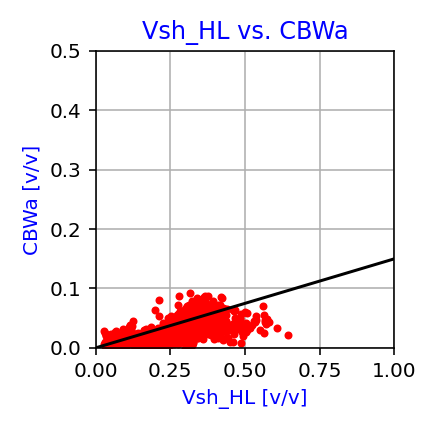

In [46]:
import numpy as np
import matplotlib.pyplot as plt
import panel as pn

def cbw_int_plot(CBW_Int):
    # Create fig/ax explicitly (OO style)
    fig, ax = plt.subplots(figsize=(3, 3))

    ax.set_title("Vsh_HL vs. CBWa", color="blue")

    # Scatter
    ax.plot(
        analysis_df["VSH_HL"].to_numpy(),
        analysis_df["CBW"].to_numpy(),
        "r.",
        label=""
    )

    # Line: y = x * CBW_Int (use 0..1 so it matches your axes)
    x = np.linspace(0.0, 1.0, 200)
    ax.plot(x, x * CBW_Int, "k-", label="")

    ax.set_xlim(0.0, 1.0)
    ax.set_ylim(0.0, 0.5)
    ax.set_ylabel("CBWa [v/v]", color="blue")
    ax.set_xlabel("Vsh_HL [v/v]", color="blue")
    ax.grid(True)

    fig.tight_layout()

    # Critical: prevent Matplotlib auto-display (Panel will display it)
    plt.close(fig)

    return fig

CBW_Int_slider = pn.widgets.FloatSlider(name="CBW_Intercept", start=0, end=0.5, step=0.01, value=0.15)
pn.interact(cbw_int_plot, CBW_Int=CBW_Int_slider)


In [47]:
CBW_Int = CBW_Int_slider.value
print(CBW_Int)


analysis_df['CBWapp'] = (analysis_df['VSH_HL'] * CBW_Int).clip(0,1)

analysis_df['PHIE']=(analysis_df['PHIT'] - CBW_Int * analysis_df['VSH_HL']).clip(0,1)

# Calculations for Swb used in Dual Water and WaxSmits
analysis_df['Swb'] =( 1 - analysis_df['PHIE']/analysis_df['PHIT']).clip(0,1)

# Qv from Swb using Hill, Shirley and Klein
analysis_df['Qv'] = (analysis_df['Swb']/(0.6425/((den_fl*SAL)**0.5) +0.22)).clip(0,5)


0.15


In [48]:
analysis_df.head()

DEPT     AF20     AF30     AF60     AF90     AT10     AT20     AT30  \
0  10014.5  35.4291  36.0545  34.6776  33.7466  34.8235  36.0539  36.1690   
1  10015.0  34.7363  35.3384  34.2665  33.0637  33.4687  34.7842  35.1602   
2  10015.5  33.7468  34.2449  33.2316  32.0649  33.9433  35.0157  35.5212   
3  10016.0  32.6053  33.0875  32.1826  30.9865  32.6699  33.4086  33.6530   
4  10016.5  31.5422  32.0603  31.1223  29.8935  30.8497  31.9016  32.0096   

      AT60     AT90  ...     Error     Vshgr  Vshdtden     Vshnd    Vshcmr  \
0  34.6224  34.7873  ...  0.029567  0.120510  0.138687  0.223937  0.061429   
1  34.3309  33.5909  ...  0.025424  0.099639  0.136182  0.218897  0.059388   
2  34.5650  33.8314  ...  0.022026  0.087184  0.131924  0.220896  0.067143   
3  32.7937  31.9906  ...  0.024517  0.094150  0.145199  0.230058  0.072041   
4  30.6766  30.2279  ...  0.028057  0.103568  0.160478  0.237404  0.068367   

     VSH_HL    CBWapp      PHIE       Swb        Qv  
0  0.139381  0.020907  0.024986  0.455558  1.757860  
1  0.126615  0.018992  0.026902  0.413823  1.596819  
2  0.118825  0.017824  0.028115  0.387988  1.497128  
3  0.128696  0.019304  0.026562  0.420883  1.624061  
4  0.140701  0.021105  0.024591  0.461859  1.782173  

[5 rows x 94 columns]

# Compute Saturations using Waxmans-Smits:

In [49]:
def Plot_sw2( m, n, rw, mslope ):
    
    ild = analysis_df[rt_curve].astype(float).to_numpy()
    phit = analysis_df['PHIT'].to_numpy()
    qv=analysis_df['Qv'].to_numpy()
 
    bvw = []
    bvo=[]
    swt = []
    mstarapp = []


    #log Data
    for k in range(0,len(analysis_df) ,1):  

        #TNPH    = CNL[k]
        #RHOB2   = RHOB[k]
        #GR      = gr[k]
        ILD     = ild[k]
        PHIT    = phit[k]
        QV      = qv[k]
        #RHOMAA2 = rhoarray[k]

        #PORDEN  = (RHOMAA2 - RHOB2)/(RHOMAA2 - FD)

        # =================================================================================
        #       Saturation Calculations
        # =================================================================================
        BVW = PHIT * ( (1/PHIT**m) * (rw/ILD) )**(1/n)

        if BVW > PHIT:
            BVW=PHIT
        else:
            BVW=BVW

        Swt = BVW/PHIT
        BVO = (PHIT*(1-Swt))
        MSTARAPP = np.log10(rw/(ILD*(1+rw*B*QV))) / np.log10(PHIT)
        bvo.append(BVO)
        swt.append(Swt)    
        bvw.append(BVW)    
        mstarapp.append(MSTARAPP)
        #Mstarrapp = Mstarapp(rw,ILD, B, QV, analysis_df['PHIT'].to_numpy())

    ######fig, axs = plt.subplot_mosaic([['left', 'right'],['middle','middle'],['bottom', 'bottom']])
    #fig, axs = plt.subplot_mosaic([['left', 'middle','right'],['bottom', 'bottom','bottom']])
    fig, axs = plt.subplot_mosaic([['left', 'middle','right']])

                              #constrained_layout=True)

    #fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(7, 7))
    fig.suptitle('Saturations from analysis_df',color='blue' , fontsize=16)
    fig.subplots_adjust(top=0.90,wspace=0.2, hspace =.15)
    fig.set_figheight(7)
    fig.set_figwidth(15)
   

    y=analysis_df.DEPT

    # Depth Plot 
    axs['left'].plot(analysis_df.PHIT, y,'-r', lw=1)#, label= 'PHIT')
    axs['left'].plot(bvw, y,'-k', lw=1)#, label= 'BVW')
    axs['left'].set_title("Bulk Volume Plot",color='blue')    
    axs['left'].set_xlabel("BVO/BVW",color='blue')
    axs['left'].set_ylabel("Depth",color='blue')
    axs['left'].set_xlim(0.5, 0.0)
    axs['left'].set_ylim(max(y), min(y))
    axs['left'].fill_betweenx(y,analysis_df.PHIT,bvw, color='green', label= 'BVO')
    axs['left'].fill_betweenx(y,bvw,0, color='cyan', label= 'BVW')
    axs['left'].legend()
    axs['left'].grid()

    # Mstar Plot
    axs['right'].set_title('Vsh vs.Mstar_Apparent', color = 'blue')
    #plt.plot(analysis_df.vsh,analysis_df.Mstarapp,'r.', label='')
    axs['right'].plot(analysis_df.VSH_HL,mstarapp,'r.',label='')   
    #axs['right'].plot(analysis_df.vsh,mstarapp, c=analysis_df.vsh,cmap=cm.jet,label='')   
    #plt.plot(analysis_df.vsh[swt>0.8],mstarapp[swt>0.8],'b.', label='')  
    #axs['right'].plot(analysis_df.vsh,analysis_df.vsh*mslope + m,'k-', label='')#,color='black')
    axs['right'].plot(np.arange(10), np.arange(10) * mslope + m, "k-", label="")
    axs['right'].set_xlim(0.0,1)
    axs['right'].set_ylim(0,7)
    axs['right'].set_ylabel('Mstar Apparent', color = 'blue')
    axs['right'].set_xlabel('Vsh [v/v]', color = 'blue')
    axs['right'].grid(True, which='both',ls='-',color='gray')
    
    # Pickett Plot
    axs['middle'].loglog(rt,analysis_df.PHIT, 'ro')
    axs['middle'].set_xlim(0.01,1000)
    axs['middle'].set_ylim(0.01,1)
    axs['middle'].set_title('Pickett Plot', color = 'blue')
    axs['middle'].set_ylabel('PHIT [v/v]', color = 'blue')
    axs['middle'].set_xlabel('ILD [ohmm]', color = 'blue')
    axs['middle'].grid()
    ######axs['middle'].xaxis.set_major_formatter(ticker.FormatStrFormatter("%.2f"))
    ######axs['middle'].yaxis.set_major_formatter(ticker.FormatStrFormatter("%.2f"))   
    
    #calculate the saturation lines
    sw_plot=(1.0,0.8,0.6,0.4,0.2)
    phit_plot=(0.01,1)
    rt_plot=np.zeros((len(sw_plot),len(phit_plot)))

    for i in range (0,len(sw_plot)):
        for j in range (0,len(phit_plot)):
            rt_result=((rw)/(sw_plot[i]**n)*(1/(phit_plot[j]**m)))
            rt_plot[i,j]=rt_result      
    for i in range(0,len(sw_plot)):
        axs['middle'].plot(rt_plot[i],phit_plot, linewidth=2, label='SW '+str(int(sw_plot[i]*100))+'%')
        axs['middle'].legend (loc='best')
    axs['middle'].grid(True, which='both',ls='-' ,color='gray')

    
    phit_buck_plot = (0.05,0.07,0.1,0.15,0.2,0.25,0.3,0.35)
    sw_buck_plot   = (1,0.75,0.5,0.33,0.25,0.2,0.16,0.14)

    #fig.show()
    #plt.show()
    plt.close(fig)
    
    # use return fig to see plots
    return fig




Column(sizing_mode='stretch_width')
    [0] Column(sizing_mode='stretch_width')
        [0] FloatSlider(end=3.0, format=PrintfTickFormatter(id='3d..., name="Cementation E..., sizing_mode='stretch_width', start=1.0, step=0.01, value=1.9)
        [1] FloatSlider(end=3.0, format=PrintfTickFormatter(id='fc..., name="Saturation Exponent '..., sizing_mode='stretch_width', start=1.0, step=0.01, value=2.0)
        [2] FloatSlider(end=0.1, format=PrintfTickFormatter(id='67..., name='Rw = ', sizing_mode='stretch_width', start=0.01, step=0.001, value=0.02)
        [3] FloatSlider(end=4.0, format=PrintfTickFormatter(id='fb..., name='m* Slope = ', sizing_mode='stretch_width', start=0.01, step=0.01, value=1)
    [1] Row(sizing_mode='stretch_width')
        [0] Matplotlib(Figure, name='interactive00410', sizing_mode='stretch_width')
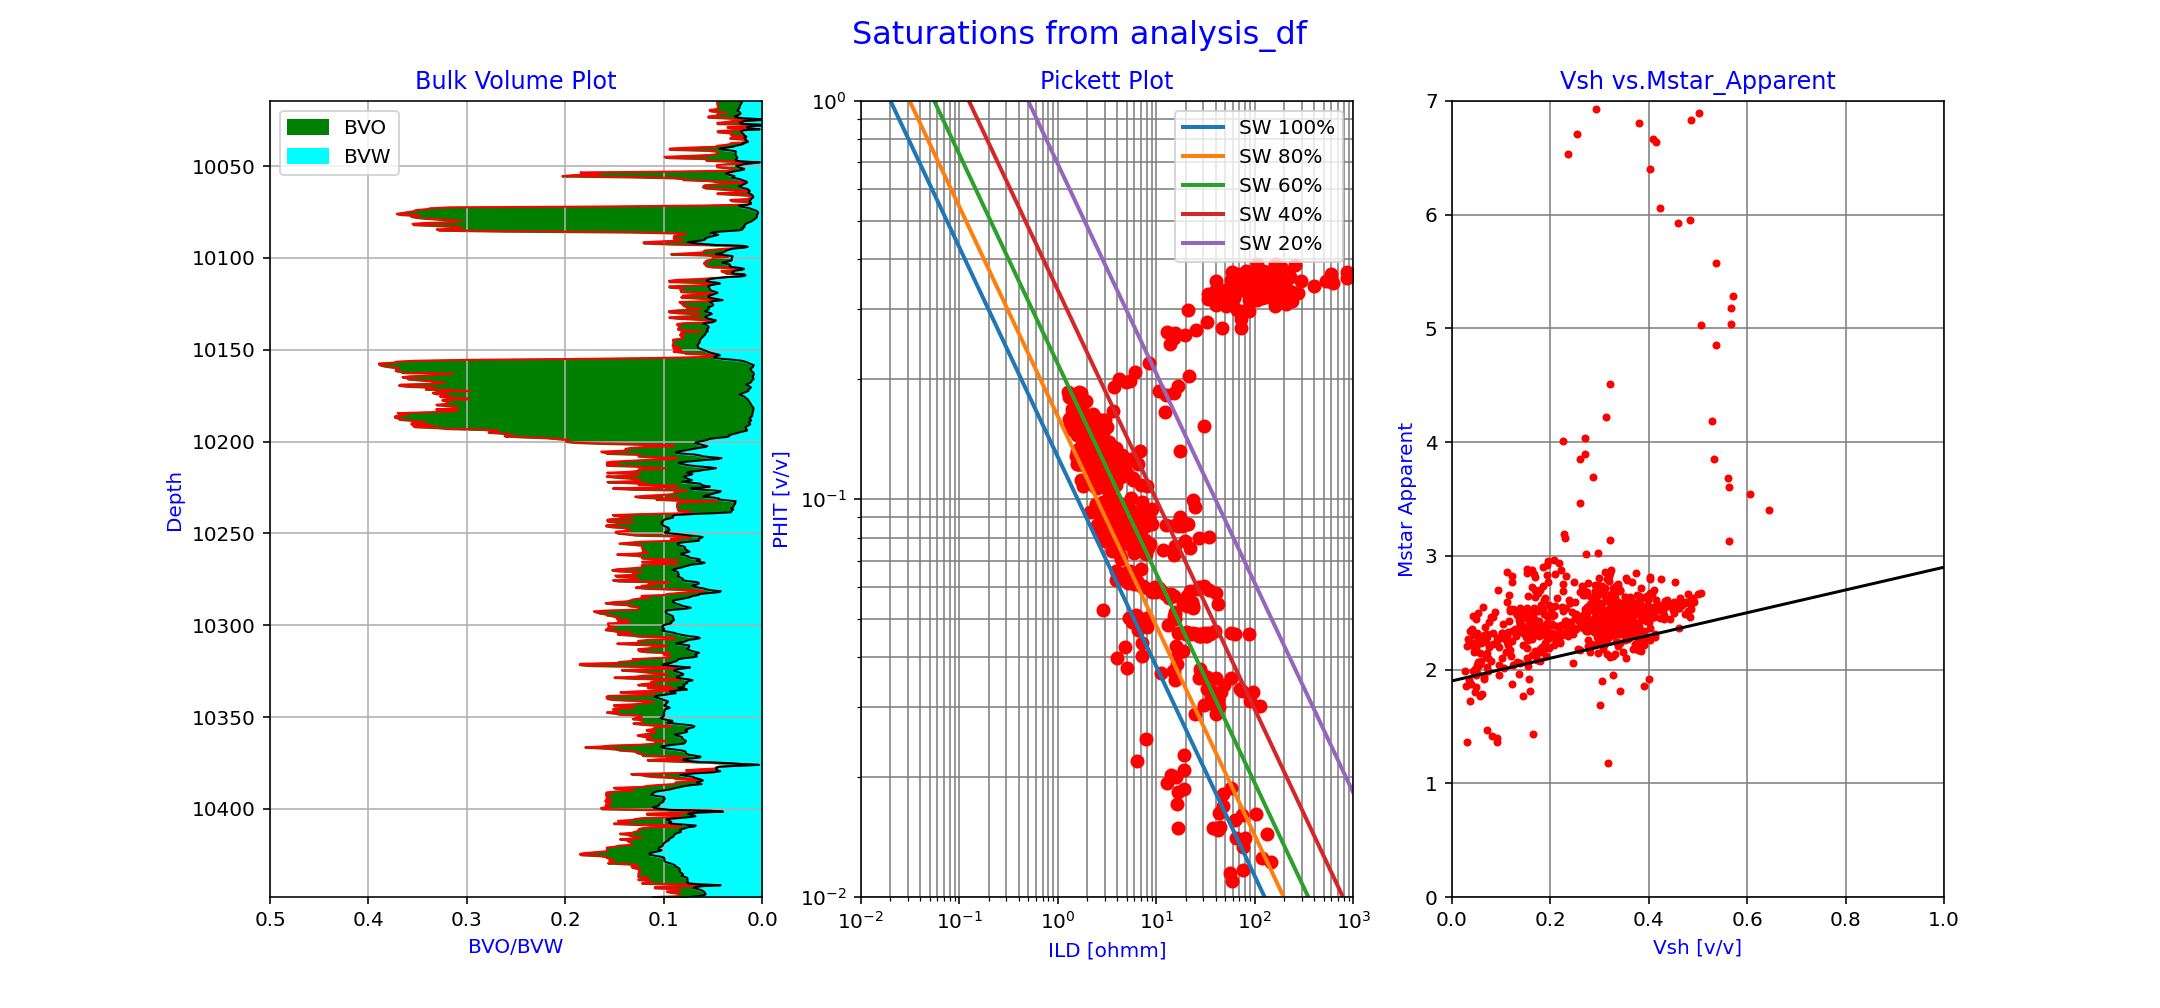

In [50]:
from bokeh.models.formatters import PrintfTickFormatter
from bokeh.models.widgets import Button



'''
Panel Version
'''

#float_slider = pn.widgets.FloatSlider(name='Float Slider', start=0, end=3.141, step=0.01, value=1.57)
m_slider  = pn.widgets.FloatSlider(name="Cementation Exponent 'm_cem' = ", start=1.00, end=3.00, step=0.01, value=m_cem, format=PrintfTickFormatter(format='%.2f'))
n_slider  = pn.widgets.FloatSlider(name="Saturation Exponent 'n_sat' = ", start=1.00, end=3.00, step=0.01, value=n_sat, format=PrintfTickFormatter(format='%.2f'))
rw_slider = pn.widgets.FloatSlider(name='Rw = ', start=0.01, end=0.1, step=0.001, value=Rw, format=PrintfTickFormatter(format='%.3f'))
mslope_slider = pn.widgets.FloatSlider(name='m* Slope = ', start=0.01, end=4.0, step=0.01, value=1, format=PrintfTickFormatter(format='%.3f'))


pn.interact(Plot_sw2, m = m_slider, n = n_slider, rw = rw_slider, mslope = mslope_slider)
#pane  = pn.interact(bvw_plot, m = m_slider, n = n_slider, rw = rw_slider, mslope = mslope_slider)

In [52]:
m_cem = round(m_slider.value,2)
n_sat = round(n_slider.value,2)
Rw = round(rw_slider.value,4)
mslope = round(mslope_slider.value,2)
B = round(B,2)
Bdacy = round(Bdacy,2)


print('m =',m_cem,' , n =',n_sat,' , Rw =',Rw, ' ,mslope =', mslope,', B =',B,' , Bdacy =', Bdacy)

analysis_df['MSTAR']=analysis_df["VSH_HL"]*mslope + m_cem


m = 2.02  , n = 2.0  , Rw = 0.02  ,mslope = 1 , B = 12.81  , Bdacy = 12.18


In [53]:
def write_constants_to_file(file_path, m_cem, n_sat, Rw, mslope, Bdacy):
    try:
        with open(file_path, 'w') as file:
            file.write("m_cem: {}\n".format(m_cem))
            file.write("n_sat: {}\n".format(n_sat))
            file.write("Rw: {}\n".format(Rw))
            file.write("mslope: {}\n".format(mslope))
            file.write("Bdacy: {}\n".format(Bdacy))

        print("Constants successfully written to '{}'.".format(file_path))
    except Exception as e:
        print("Error writing constants to file: {}".format(e))

# Sample constants, replace these with the actual values you want to write
m_cem = round(m_slider.value,2)
n_sat = round(n_slider.value,2)
Rw = round(rw_slider.value,4)
mslope = round(mslope_slider.value,2)
Bdacy = round(Bdacy,2)

# Replace 'Pickett.txt' with the desired file path
file_path = './data/parameters/Pickett.txt'
write_constants_to_file(file_path, m_cem, n_sat, Rw, mslope, Bdacy)


Constants successfully written to './data/parameters/Pickett.txt'.


In [54]:
def read_constants_from_file(file_path):
    constants = {}
    try:
        with open(file_path, 'r') as file:
            for line in file:
                key, value = line.strip().split(':')
                constants[key.strip()] = float(value.strip())
        return constants
    except FileNotFoundError:
        print(f"File '{file_path}' not found.")
        return None
    except Exception as e:
        print("Error reading constants from file: {}".format(e))
        return None

# Replace 'Pickett.txt' with the same file path used for writing
file_path = './data/parameters/Pickett.txt'
read_constants = read_constants_from_file(file_path)

if read_constants:
    m_cem = read_constants['m_cem']
    n_sat = read_constants['n_sat']
    Rw = read_constants['Rw']
    mslope = read_constants['mslope']
    Bdacy = read_constants['Bdacy']

    print("Read constants from file:")
    print("m_cem:", m_cem)
    print("n_sat:", n_sat)
    print("Rw:", Rw)
    print("mslope:", mslope)   
    print("Bdacy:", Bdacy)

Read constants from file:
m_cem: 2.02
n_sat: 2.0
Rw: 0.02
mslope: 1.0
Bdacy: 12.18


In [55]:
print(m_cem,n_sat,Rw,Bdacy)

2.02 2.0 0.02 12.18


In [56]:
analysis_df.head()

DEPT     AF20     AF30     AF60     AF90     AT10     AT20     AT30  \
0  10014.5  35.4291  36.0545  34.6776  33.7466  34.8235  36.0539  36.1690   
1  10015.0  34.7363  35.3384  34.2665  33.0637  33.4687  34.7842  35.1602   
2  10015.5  33.7468  34.2449  33.2316  32.0649  33.9433  35.0157  35.5212   
3  10016.0  32.6053  33.0875  32.1826  30.9865  32.6699  33.4086  33.6530   
4  10016.5  31.5422  32.0603  31.1223  29.8935  30.8497  31.9016  32.0096   

      AT60     AT90  ...     Vshgr  Vshdtden     Vshnd    Vshcmr    VSH_HL  \
0  34.6224  34.7873  ...  0.120510  0.138687  0.223937  0.061429  0.139381   
1  34.3309  33.5909  ...  0.099639  0.136182  0.218897  0.059388  0.126615   
2  34.5650  33.8314  ...  0.087184  0.131924  0.220896  0.067143  0.118825   
3  32.7937  31.9906  ...  0.094150  0.145199  0.230058  0.072041  0.128696   
4  30.6766  30.2279  ...  0.103568  0.160478  0.237404  0.068367  0.140701   

     CBWapp      PHIE       Swb        Qv     MSTAR  
0  0.020907  0.024986  0.455558  1.757860  2.159381  
1  0.018992  0.026902  0.413823  1.596819  2.146615  
2  0.017824  0.028115  0.387988  1.497128  2.138825  
3  0.019304  0.026562  0.420883  1.624061  2.148696  
4  0.021105  0.024591  0.461859  1.782173  2.160701  

[5 rows x 95 columns]

### Waxman-Smits Iterative Analysis:

In [57]:
# my old method

import numpy as np

def waxman_smits_sw_iterative(Rt, PHIT, Qv, Rw, B, m, n,
                              sw0=None, max_iter=60, tol=1e-6, damp=0.6):
    """
    Iterative Waxman–Smits Sw solver (conductivity form).

    Uses:
        Ct = 1/Rt = PHIT^m * ( Sw^n / Rw + B*Qv*Sw^(n-1) )
    Assumes a = 1.

    Returns:
      Sw_ws (array)
    """

    Rt   = np.asarray(Rt, dtype=float)
    PHIT = np.asarray(PHIT, dtype=float)
    Qv   = np.asarray(Qv, dtype=float)

    # Guards
    Rt_safe   = np.where(np.isfinite(Rt) & (Rt > 0), Rt, np.nan)
    PHIT_safe = np.where(np.isfinite(PHIT) & (PHIT > 0), PHIT, np.nan)
    Qv_safe   = np.where(np.isfinite(Qv) & (Qv >= 0), Qv, np.nan)

    # Scalars guard
    if not (np.isfinite(Rw) and Rw > 0):
        raise ValueError("Rw must be a finite positive scalar.")
    if not np.isfinite(B) or B < 0:
        raise ValueError("B must be a finite non-negative scalar.")
    if not np.isfinite(m) or not np.isfinite(n) or m <= 0 or n <= 0:
        raise ValueError("m and n must be finite positive scalars.")

    Ct = 1.0 / Rt_safe
    A  = PHIT_safe**m  # since a=1

    # initial Sw guess
    if sw0 is None:
        # Archie-only guess (ignoring Qv term):
        # Ct/A ≈ Sw^n / Rw  -> Sw ≈ (Rw * Ct/A)^(1/n)
        with np.errstate(invalid="ignore", divide="ignore"):
            sw0 = (Rw * (Ct / A)) ** (1.0 / n)

    if np.isscalar(sw0):
        Sw = np.full_like(PHIT_safe, float(sw0))
    else:
        Sw = np.asarray(sw0, dtype=float).copy()

    Sw = np.clip(Sw, 1e-4, 1.2)

    for _ in range(max_iter):
        Sw_prev = Sw.copy()

        # rhs = Ct/A - B*Qv*Sw^(n-1)
        with np.errstate(invalid="ignore", divide="ignore", over="ignore"):
            rhs = (Ct / A) - (B * Qv_safe * (Sw ** (n - 1.0)))

            # If rhs <= 0, Sw_new would be invalid; keep a tiny floor
            rhs = np.where(np.isfinite(rhs) & (rhs > 1e-20), rhs, np.nan)

            Sw_new = (Rw * rhs) ** (1.0 / n)

        # Damping helps stability
        Sw = damp * Sw_new + (1.0 - damp) * Sw_prev

        Sw = np.clip(Sw, 1e-4, 1.2)

        # convergence
        with np.errstate(invalid="ignore"):
            rel = np.nanmax(np.abs(Sw - Sw_prev) / np.maximum(np.abs(Sw_prev), 1e-6))
        if np.isfinite(rel) and rel < tol:
            break

    Sw = np.clip(Sw, 0.0, 1.0)
    return Sw


# My old WS Iterative
def waxsmits_it(Rt, PHIT,  MSTAR, Qv, Rw, B):

    swt_out = []

    #log Data
    for k in range(0,len(analysis_df) ,1):

            Rt2      = Rt[k]
            PHIT2    = PHIT[k]
            QV2      = Qv[k]
            MSTAR2   = MSTAR[k]
            #Rw      = rw
            #B       = b

            #RHOMAA2 = rhoarray[k]

            #PORDEN  = (RHOMAA2 - RHOB2)/(RHOMAA2 - FD)

            #------------------------------------------------------------
            #      WAXMAN-SMITS ITERATIVE approach to calculating Swt
            #------------------------------------------------------------
            #------------------------------------------------------------

            swap=0
            for i in range(0, 100, 1):
                swap = swap + .01
                swt_i =(((1/PHIT2**MSTAR2)*Rw)/(Rt2*(1+Rw*B*QV2/swap)))**(1/2)
                if swt_i <= swap:
                    exit
            #swt_i=0.5
            # limit sw between 0 and 1:
            if swt_i >  1:
                swt_i = 1
            elif swt_i <= 0:
                swt_i = 0.0001
            else:
                swt_i = swt_i


            swt_out.append(swt_i)
        
    swt_cp = np.clip(swt_out, 0.0, 1.0)
    return swt_cp

# -----------------------------
# Apply to current slider interval
# -----------------------------
if "analysis_depth_range" in globals() and analysis_depth_range is not None:
    top_depth, bottom_depth = map(float, analysis_depth_range)
else:
    top_depth = float(np.nanmin(analysis_df.index.values.astype(float)))
    bottom_depth = float(np.nanmax(analysis_df.index.values.astype(float)))


# Required inputs
Rt   = analysis_df[rt_curve].astype(float).to_numpy()
PHIT =  analysis_df['PHIT'].to_numpy()
Qv   = analysis_df['Qv'].to_numpy()
MSTAR = analysis_df['MSTAR'].to_numpy()


# Parameters (must be finite scalars)
# Rw: your formation water resistivity (ohm-m)
# B : your Bdacy (must match your Qv units)
Rw = float(Rw)
B  = float(Bdacy)
m  = float(m_cem)
n  = float(n_sat)



'''
# 1) Method 1 might be better
Sw_it = waxman_smits_sw_iterative(Rt, PHIT, Qv, Rw, B, m, n, sw0=None)
analysis_df["SW_IT"] = Sw_it
analysis_df["BVWT_IT"]   = PHIT * Sw_it
analysis_df["BVWe_IT"]   = PHIT * Sw_it - analysis_df["CBWapp"]


# 2) Method 2 - my old iterative 
Sw_cp = waxsmits_it(Rt, PHIT,  MSTAR, Qv, Rw, B)
analysis_df["SW_CP"] = Sw_cp
analysis_df["BVWT_CP"]   = PHIT * Sw_cp
analysis_df["BVWe_CP"]   = PHIT * Sw_cp - analysis_df["CBWapp"]
'''


# -----------------------------
# Waxman-Smits BVW in effective porosity system
# BVWT = PHIT * Sw  (total BVW)
# BVWe = BVWT - CBW (effective BVW; remove clay-bound water)
# -----------------------------

# Safety: CBWapp must exist and be numeric
cbw = pd.to_numeric(analysis_df["CBWapp"], errors="coerce").fillna(0.0)

# ---- Method 1: preferred iterative ----
Sw_it = waxman_smits_sw_iterative(Rt, PHIT, Qv, Rw, B, m, n, sw0=None)
analysis_df["SW_IT"] = Sw_it

analysis_df["BVWT_IT"] = PHIT * analysis_df["SW_IT"]

# subtract CBW and clip at 0 (prevents negative "effective BVW")
analysis_df["BVWe_IT"] = (analysis_df["BVWT_IT"] - cbw).clip(lower=0.0)

# ---- Method 2: old iterative ----
Sw_cp = waxsmits_it(Rt, PHIT, MSTAR, Qv, Rw, B)
analysis_df["SW_CP"] = Sw_cp

analysis_df["BVWT_CP"] = PHIT * analysis_df["SW_CP"]
analysis_df["BVWe_CP"] = (analysis_df["BVWT_CP"] - cbw).clip(lower=0.0)





print(m_cem,n_sat,Rw,Bdacy)


# Quick diagnostics
nan_sw = np.sum(~np.isfinite(Sw_cp))
print(f"✅ Waxman–Smits done for {top_depth:.1f}–{bottom_depth:.1f} ft")
print(f"Added columns: SW_CP, BVW_CP, SW_IT, BVW_IT | NaNs in SW_CP: {nan_sw} / {len(Sw_cp)}")
print("SW_CP stats:", np.nanmin(Sw_cp), np.nanmedian(Sw_cp), np.nanmax(Sw_cp))


2.02 2.0 0.02 12.18
✅ Waxman–Smits done for 10014.5–10448.0 ft
Added columns: SW_CP, BVW_CP, SW_IT, BVW_IT | NaNs in SW_CP: 0 / 868
SW_CP stats: 0.014125566389374492 0.8519157686301286 1.0


In [58]:
analysis_df.head()

DEPT     AF20     AF30     AF60     AF90     AT10     AT20     AT30  \
0  10014.5  35.4291  36.0545  34.6776  33.7466  34.8235  36.0539  36.1690   
1  10015.0  34.7363  35.3384  34.2665  33.0637  33.4687  34.7842  35.1602   
2  10015.5  33.7468  34.2449  33.2316  32.0649  33.9433  35.0157  35.5212   
3  10016.0  32.6053  33.0875  32.1826  30.9865  32.6699  33.4086  33.6530   
4  10016.5  31.5422  32.0603  31.1223  29.8935  30.8497  31.9016  32.0096   

      AT60     AT90  ...      PHIE       Swb        Qv     MSTAR     SW_IT  \
0  34.6224  34.7873  ...  0.024986  0.455558  1.757860  2.159381  0.365682   
1  34.3309  33.5909  ...  0.026902  0.413823  1.596819  2.146615  0.387288   
2  34.5650  33.8314  ...  0.028115  0.387988  1.497128  2.138825  0.393127   
3  32.7937  31.9906  ...  0.026562  0.420883  1.624061  2.148696  0.398179   
4  30.6766  30.2279  ...  0.024591  0.461859  1.782173  2.160701  0.402727   

    BVWT_IT   BVWe_IT     SW_CP   BVWT_CP   BVWe_CP  
0  0.016783  0.000000  0.558857  0.025648  0.004741  
1  0.017774  0.000000  0.565452  0.025951  0.006959  
2  0.018060  0.000236  0.561069  0.025775  0.007951  
3  0.018263  0.000000  0.580284  0.026616  0.007311  
4  0.018403  0.000000  0.602304  0.027523  0.006418  

[5 rows x 101 columns]

In [59]:
print(m_cem,n_sat,Rw)

2.02 2.0 0.02


# Final Plot

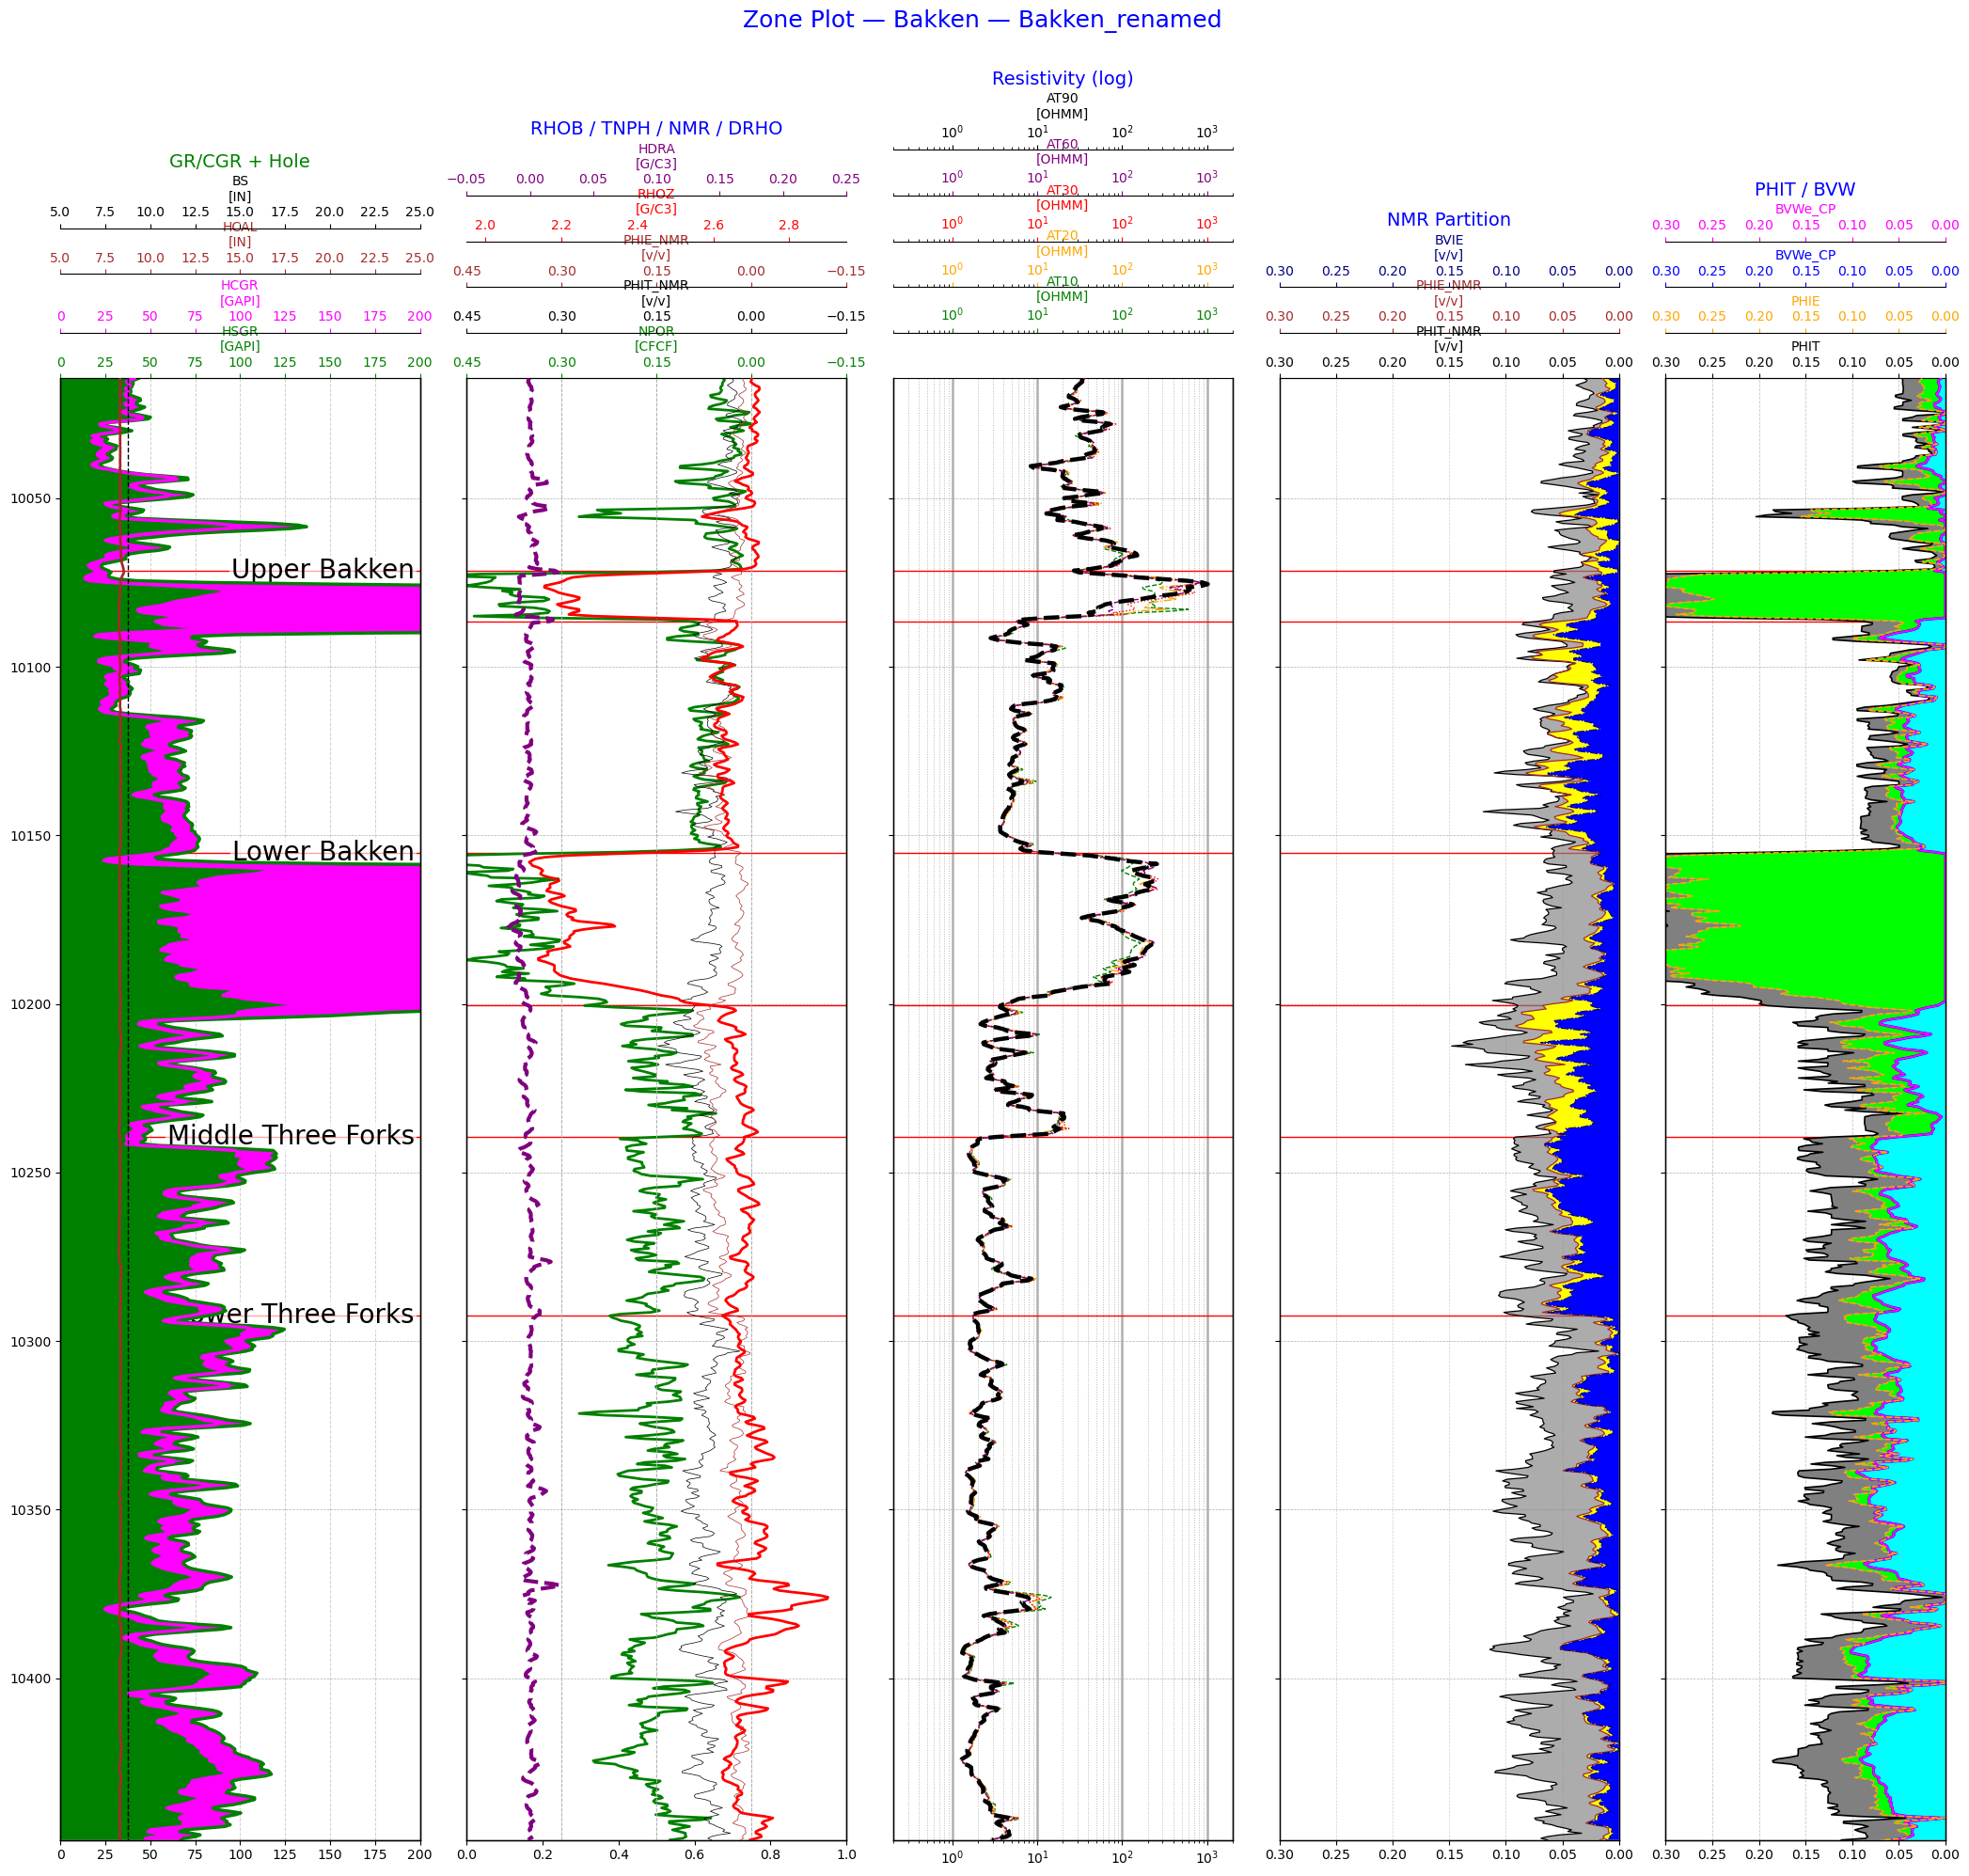

In [60]:
# ===========================================================
# ZONE TEMPLATE PLOT — from analysis_df (DEPT column) + NMR partition curves
# Track layout (5 tracks):
#   1) GR/CGR + Hole (CALI/BS/DCAL)
#   2) RHOB / TNPH / PHIT_NMR / PHIE_NMR / DRHO
#   3) Resistivity family (log)
#   4) NMR partition: CBW / FFI / BVIE (+ optional BFV QC)
#   5) PHIT / BVW / PHIE shading
# ===========================================================
# back to normal inline
#########%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import LogLocator, NullFormatter

# -----------------------------
# USER INPUTS
# -----------------------------
top_summary = top_a
bottom_summary = base_a

# -----------------------------
# Helpers
# -----------------------------
def nice_label(mnemonic, units_map):
    u = (units_map.get(mnemonic, "") or "").strip() if isinstance(units_map, dict) else ""
    return f"{mnemonic}\n[{u}]" if u else mnemonic

def first_present(cols, candidates):
    s = set(cols)
    for c in candidates:
        if c in s:
            return c
    return None

def add_tops(ax, top_depth, bottom_depth):
    if "tops_depths" in globals() and "tops" in globals():
        for d in tops_depths:
            if top_depth <= d <= bottom_depth:
                ax.axhline(d, color="red", linewidth=1.0)

def add_tops_labels(ax, top_depth, bottom_depth):
    """
    Draw top names in the GR track, right-justified.
    Uses x in axes fraction (0..1) and y in data (depth).
    """
    if "tops_depths" in globals() and "tops" in globals():
        for d, nm in zip(tops_depths, tops):
            if top_depth <= d <= bottom_depth:
                ax.text(
                    0.985, d, str(nm),
                    transform=ax.get_yaxis_transform(),
                    ha="right", va="center",
                    color="black", fontsize=20,
                    zorder=50,
                    bbox=dict(facecolor="white", edgecolor="none", alpha=0.65, pad=1.5)
                )

def setup_porosity_axis(a):
    """
    Standard porosity axis:
    - Range: 0.45 → -0.15 (inverted)
    - Gridlines at [-0.15, 0.00, 0.15, 0.30, 0.45]
    """
    ticks = [-0.15, 0.00, 0.15, 0.30, 0.45]
    a.set_xlim(-0.15, 0.45)
    a.invert_xaxis()
    a.set_xticks(ticks)
    a.grid(True, axis="x", linestyle="--", linewidth=0.7, alpha=0.8)

# -----------------------------
# Plot function (FROM DF with DEPT column)
# -----------------------------
def plot_zone_template_from_df(df_in, units_map, top_depth, bottom_depth, title=None, depth_col="DEPT"):
    if df_in is None or df_in.empty:
        raise ValueError("Input dataframe is empty.")
    if depth_col not in df_in.columns:
        raise ValueError(f"Dataframe must contain a '{depth_col}' column.")

    # Copy, coerce depth to numeric, sort, slice
    df = df_in.copy()
    df[depth_col] = pd.to_numeric(df[depth_col], errors="coerce")
    df = df.dropna(subset=[depth_col]).sort_values(depth_col)

    z = df.loc[(df[depth_col] >= top_depth) & (df[depth_col] <= bottom_depth)].copy()
    if z.empty:
        raise ValueError(f"No data in zone {top_depth}–{bottom_depth} (based on {depth_col}).")

    depth = z[depth_col].to_numpy()

    # -----------------------------
    # Candidate lists
    # -----------------------------
    gr_cands  = ["GR", "SGR", "HGR", "HSGR"]
    cgr_cands = ["CGR", "HCGR"]

    cali_cands = ["CALI","CALS","HCAL","CAL","CALIPER","HD1_PPC1","HD2_PPC1"]
    bs_cands   = ["BS","BITSIZE","BIT","BIT_SIZE"]
    dcal_cands = ["DCAL","DCALI","D_CAL","CALD"]

    rhob_cands = ["RHOB", "RHOZ"]
    drho_cands = ["DRHO", "HDRA", "HDRH", "DROH", "DRH", "RHOC"]
    tnph_cands = ["TNPH", "NPHI", "NPOR", "CNL"]
    tcmr_cands = ["PHIT_NMR", "TCMR", "MPHIS"]
    cmrp_cands = ["PHIE_NMR", "CMRP_3MS", "CMRP3MS", "CMRP", "MPHI"]

    rxo_cands  = ["RXOZ", "Rxo", "RXO", "RxoZ"]
    at90_cands = ["AT90", "AF90", "AO90", "ILD", "RT"]
    at60_cands = ["AT60", "AF60", "AO60"]
    at30_cands = ["AT30", "AF30", "AO30"]
    at20_cands = ["AT20", "AF20", "AO20"]
    at10_cands = ["AT10", "AF10", "AO10"]

    cbw_cands  = ["CBW"]
    bvie_cands = ["BVIE","BVI_E"]
    ffi_cands  = ["FFI", "CMFF"]
    bfv_cands  = ["BFV","BFV_3MS","BFV3MS","MBVI"]

    phit_cands = ["PHIT", "PHIT_RMS", "PHIT_NMR", "TCMR"]
    sw_cands   = ["SW_IT", "SW_CP", "SW_ARCHIE"]
    bvw_cands  = ["BVWe_CP", "BVWe_IT"]
    phie_cands = ["PHIE", "PHIE_NMR", "CMRP_3MS", "CMRP", "MPHI"]

    # -----------------------------
    # Pick curves
    # -----------------------------
    gr   = first_present(z.columns, gr_cands)
    cgr  = first_present(z.columns, cgr_cands)

    cali = first_present(z.columns, cali_cands)
    bs   = first_present(z.columns, bs_cands)
    dcal = first_present(z.columns, dcal_cands)

    rhob = first_present(z.columns, rhob_cands)
    drho = first_present(z.columns, drho_cands)
    tnph = first_present(z.columns, tnph_cands)
    tcmr = first_present(z.columns, tcmr_cands)
    cmrp = first_present(z.columns, cmrp_cands)

    rxo  = first_present(z.columns, rxo_cands)
    at90 = first_present(z.columns, at90_cands)
    at60 = first_present(z.columns, at60_cands)
    at30 = first_present(z.columns, at30_cands)
    at20 = first_present(z.columns, at20_cands)
    at10 = first_present(z.columns, at10_cands)

    cbw  = first_present(z.columns, cbw_cands)
    bvie = first_present(z.columns, bvie_cands)
    ffi  = first_present(z.columns, ffi_cands)
    bfv  = first_present(z.columns, bfv_cands)

    phit_name = first_present(z.columns, phit_cands)
    sw_name   = first_present(z.columns, sw_cands)
    bvw_name  = first_present(z.columns, bvw_cands)
    phie_name = first_present(z.columns, phie_cands)

    # -----------------------------
    # Create 5 tracks
    # -----------------------------
    fig, ax = plt.subplots(
        nrows=1, ncols=5, figsize=(21, 20), sharey=True,
        gridspec_kw={"width_ratios": [1.8, 1.9, 1.7, 1.7, 1.4]}
    )

    if title is None:
        title = f"Zone Template Plot — {top_depth:g}–{bottom_depth:g} ft"
    fig.suptitle(title, fontsize=18, color="blue", y=0.995)
    fig.subplots_adjust(top=0.88, wspace=0.24)

    # Common Y formatting
    for a in ax:
        a.set_ylim(top_depth, bottom_depth)
        a.invert_yaxis()
        a.yaxis.grid(True, linestyle="--", linewidth=0.5)
        a.get_xaxis().set_visible(True)
        add_tops(a, top_depth, bottom_depth)
    add_tops_labels(ax[0], top_depth, bottom_depth)

    # ==========================================================
    # Track 1: GR/CGR + Hole (CALI/BS/DCAL)
    # ==========================================================
    ax[0].set_title("GR/CGR + Hole", fontsize=14, color="green")

    x_left_gr, x_right_gr = 0.0, 200.0
    ax[0].set_xlim(x_left_gr, x_right_gr)
    ax[0].grid(True, axis="x", linestyle="--", linewidth=0.7, alpha=0.6)

    a_fill_gr = ax[0].twiny()
    a_fill_gr.set_xlim(x_left_gr, x_right_gr)
    a_fill_gr.spines["top"].set_visible(False)
    a_fill_gr.get_xaxis().set_visible(False)
    a_fill_gr.grid(False)

    gr_vals  = z[gr].astype(float).to_numpy() if gr else None
    cgr_vals = z[cgr].astype(float).to_numpy() if cgr else None

    if cgr_vals is not None:
        a_fill_gr.fill_betweenx(depth, 0.0, cgr_vals, where=np.isfinite(cgr_vals),
                                facecolor="green", alpha=1.0)

    if (gr_vals is not None) and (cgr_vals is not None):
        a_fill_gr.fill_betweenx(
            depth, cgr_vals, gr_vals,
            where=np.isfinite(gr_vals) & np.isfinite(cgr_vals) & (gr_vals >= cgr_vals),
            facecolor="magenta", alpha=1.0
        )

    if (gr_vals is not None) and (cgr_vals is None):
        a_fill_gr.fill_betweenx(depth, 0.0, gr_vals, where=np.isfinite(gr_vals),
                                facecolor="green", alpha=0.25)

    if gr:
        a = ax[0].twiny()
        a.set_xlim(x_left_gr, x_right_gr)
        a.plot(gr_vals, depth, color="green", linewidth=2.5)
        a.set_xlabel(nice_label(gr, units_map), color="green")
        a.tick_params(axis="x", colors="green")
        a.spines["top"].set_position(("outward", 0))
        a.grid(False)

    if cgr:
        a = ax[0].twiny()
        a.set_xlim(x_left_gr, x_right_gr)
        a.plot(cgr_vals, depth, color="magenta", linewidth=2.5)
        a.set_xlabel(nice_label(cgr, units_map), color="magenta")
        a.tick_params(axis="x", colors="magenta")
        a.spines["top"].set_position(("outward", 35))
        a.grid(False)

    # Hole overlay scales (your latest preference)
    cali_min, cali_max = 5.0, 25.0
    dcal_min, dcal_max = -2.0, 2.0

    if cali:
        a = ax[0].twiny()
        a.set_xlim(cali_min, cali_max)
        a.plot(z[cali].astype(float).to_numpy(), depth, color="brown", linewidth=2.0)
        a.set_xlabel(nice_label(cali, units_map), color="brown")
        a.tick_params(axis="x", colors="brown")
        a.spines["top"].set_position(("outward", 80))
        a.grid(False)

    if bs:
        a = ax[0].twiny()
        a.set_xlim(cali_min, cali_max)
        a.plot(z[bs].astype(float).to_numpy(), depth, color="black", linewidth=1.0, linestyle="--")
        a.set_xlabel(nice_label(bs, units_map), color="black")
        a.tick_params(axis="x", colors="black")
        a.spines["top"].set_position(("outward", 115))
        a.grid(False)

    if cali and bs:
        cali_vals_h = z[cali].astype(float).to_numpy()
        bs_vals_h   = z[bs].astype(float).to_numpy()

        a_fill_h = ax[0].twiny()
        a_fill_h.set_xlim(cali_min, cali_max)
        a_fill_h.spines["top"].set_visible(False)
        a_fill_h.get_xaxis().set_visible(False)
        a_fill_h.grid(False)

        a_fill_h.fill_betweenx(
            depth, bs_vals_h, cali_vals_h,
            where=np.isfinite(cali_vals_h) & np.isfinite(bs_vals_h) & (cali_vals_h > bs_vals_h),
            facecolor="yellow", alpha=0.25
        )

    if dcal:
        DC = z[dcal].astype(float).to_numpy()

        a_fill_d = ax[0].twiny()
        a_fill_d.set_xlim(dcal_min, dcal_max)
        a_fill_d.spines["top"].set_visible(False)
        a_fill_d.get_xaxis().set_visible(False)
        a_fill_d.grid(False)

        a_fill_d.fill_betweenx(
            depth, 0.0, np.clip(DC, 0.0, None),
            where=np.isfinite(DC) & (DC > 0),
            facecolor="yellow", alpha=0.45
        )
        a_fill_d.fill_betweenx(
            depth, np.clip(DC, None, 0.0), 0.0,
            where=np.isfinite(DC) & (DC < 0),
            facecolor="saddlebrown", alpha=0.45
        )

        a = ax[0].twiny()
        a.set_xlim(dcal_min, dcal_max)
        a.plot(DC, depth, color="purple", linewidth=4.0, linestyle="--")
        a.set_xlabel(nice_label(dcal, units_map), color="purple")
        a.tick_params(axis="x", colors="purple")
        a.spines["top"].set_position(("outward", 150))
        a.grid(False)

    # ==========================================================
    # Track 2: RHOB / TNPH / NMR / DRHO
    # ==========================================================
    ax[1].set_title("RHOB / TNPH / NMR / DRHO", fontsize=14, color="blue")
    overlay_done = False

    if tnph:
        a = ax[1].twiny()
        setup_porosity_axis(a)
        a.plot(z[tnph].to_numpy(), depth, color="green", linewidth=2.0)
        a.set_xlabel(nice_label(tnph, units_map), color="green")
        a.tick_params(axis="x", colors="green")
        a.spines["top"].set_position(("outward", 0))
        overlay_done = True

    if tcmr:
        a = ax[1].twiny()
        setup_porosity_axis(a)
        a.plot(z[tcmr].to_numpy(), depth, color="black", linewidth=0.5)
        a.set_xlabel(nice_label(tcmr, units_map), color="black")
        a.tick_params(axis="x", colors="black")
        a.spines["top"].set_position(("outward", 35))
        overlay_done = True

    if cmrp:
        a = ax[1].twiny()
        setup_porosity_axis(a)
        a.plot(z[cmrp].to_numpy(), depth, color="brown", linewidth=0.5)
        a.set_xlabel(nice_label(cmrp, units_map), color="brown")
        a.tick_params(axis="x", colors="brown")
        a.spines["top"].set_position(("outward", 70))
        overlay_done = True

    if rhob:
        a = ax[1].twiny()
        a.set_xlim(1.95, 2.95)
        a.plot(z[rhob].to_numpy(), depth, color="red", linewidth=2)
        a.set_xlabel(nice_label(rhob, units_map), color="red")
        a.tick_params(axis="x", colors="red")
        a.spines["top"].set_position(("outward", 105))
        a.grid(False)
        overlay_done = True

    if drho:
        a = ax[1].twiny()
        a.set_xlim(-0.05, 0.25)
        a.plot(z[drho].to_numpy(), depth, color="purple", linewidth=3, linestyle="--")
        a.set_xlabel(nice_label(drho, units_map), color="purple")
        a.tick_params(axis="x", colors="purple")
        a.spines["top"].set_position(("outward", 140))
        a.grid(False)
        overlay_done = True

    if not overlay_done:
        ax[1].text(0.5, 0.5, "No RHOB / TNPH / NMR / DRHO",
                   transform=ax[1].transAxes, ha="center", va="center")

    # ==========================================================
    # Track 3: Resistivity (log)
    # ==========================================================
    ax[2].set_title("Resistivity (log)", fontsize=14, color="blue")
    ax[2].set_xscale("log")
    ax[2].set_xlim(0.2, 2000)
    ax[2].xaxis.set_major_locator(LogLocator(base=10.0, subs=(1.0,), numticks=10))
    ax[2].xaxis.set_minor_locator(LogLocator(base=10.0, subs=np.arange(2, 10) * 0.1))
    ax[2].xaxis.set_minor_formatter(NullFormatter())
    ax[2].grid(which="major", axis="x", linestyle="-", linewidth=1.8, alpha=1.0)
    ax[2].grid(which="minor", axis="x", linestyle=":", linewidth=0.7, alpha=0.9)

    res_curves = [
        ("RXO",  rxo,  "blue",   "-",         1.0,   0),
        ("AT10", at10, "green",  "--",        1.0,  35),
        ("AT20", at20, "orange", "-.",        1.0,  70),
        ("AT30", at30, "red",    ":",         1.0, 105),
        ("AT60", at60, "purple", (0, (5, 2)), 1.0, 140),
        ("AT90", at90, "black",  "--",        3.2, 175),
    ]

    any_res = False
    for _, c, color, ls, lw, off in res_curves:
        if c:
            a = ax[2].twiny()
            a.set_xscale("log")
            a.set_xlim(0.2, 2000)
            a.plot(z[c].to_numpy(), depth, color=color, linestyle=ls, linewidth=lw)
            a.set_xlabel(nice_label(c, units_map), color=color)
            a.tick_params(axis="x", colors=color)
            a.spines["top"].set_position(("outward", off))
            a.grid(False)
            any_res = True

    if not any_res:
        ax[2].text(0.5, 0.5, "No resistivity curves",
                   transform=ax[2].transAxes, ha="center", va="center")

    # ==========================================================
    # Track 4: NMR Partition
    # ==========================================================
    ax[3].set_title("NMR Partition", fontsize=14, color="blue")
    x_left, x_right = 0.0, 0.30
    ax[3].set_xlim(x_left, x_right)
    ax[3].invert_xaxis()
    ax[3].grid(True, axis="x", linestyle="--", linewidth=0.5, alpha=0.6)

    any_nmr = False

    phit = z[tcmr].astype(float).to_numpy() if tcmr else None
    phie = z[cmrp].astype(float).to_numpy() if cmrp else None

    bvie_name = first_present(z.columns, ["BVI_E", "BVIE"])
    cmff_name = first_present(z.columns, ["FFI", "CMFF"])

    bvie_arr = z[bvie_name].astype(float).to_numpy() if bvie_name else None

    if bvie_arr is None and (phie is not None) and cmff_name:
        cmff = z[cmff_name].astype(float).to_numpy()
        cmff_clip = np.where(np.isfinite(cmff) & np.isfinite(phie), np.clip(cmff, 0.0, phie), np.nan)
        bvie_arr = np.where(np.isfinite(phie) & np.isfinite(cmff_clip), np.maximum(phie - cmff_clip, 0.0), np.nan)

    a_fill = ax[3].twiny()
    a_fill.set_xlim(x_left, x_right)
    a_fill.invert_xaxis()
    a_fill.spines["top"].set_visible(False)
    a_fill.get_xaxis().set_visible(False)
    a_fill.grid(False)

    if bvie_arr is not None:
        a_fill.fill_betweenx(depth, 0.0, bvie_arr, where=np.isfinite(bvie_arr),
                             facecolor="blue", alpha=1.0)
        any_nmr = True

    if (phie is not None) and (bvie_arr is not None):
        a_fill.fill_betweenx(depth, bvie_arr, phie,
                             where=np.isfinite(phie) & np.isfinite(bvie_arr) & (phie >= bvie_arr),
                             facecolor="yellow", alpha=1.0)
        any_nmr = True

    if (phit is not None) and (phie is not None):
        a_fill.fill_betweenx(depth, phie, phit,
                             where=np.isfinite(phit) & np.isfinite(phie) & (phit >= phie),
                             facecolor="gray", alpha=0.65)
        any_nmr = True

    for curve_name, color, off, lw, ls in [
        (tcmr,      "black",  0, 0.9, "-"),
        (cmrp,      "brown", 35, 0.9, "-"),
        (bvie_name, "navy",  70, 0.9, "-."),
    ]:
        if curve_name and curve_name in z.columns:
            a = ax[3].twiny()
            a.set_xlim(x_left, x_right)
            a.invert_xaxis()
            a.plot(z[curve_name].to_numpy(), depth, color=color, linewidth=lw, linestyle=ls)
            a.set_xlabel(nice_label(curve_name, units_map), color=color)
            a.tick_params(axis="x", colors=color)
            a.spines["top"].set_position(("outward", off))
            a.grid(False)
            any_nmr = True

    if not any_nmr:
        ax[3].text(0.5, 0.5, "No NMR curves",
                   transform=ax[3].transAxes, ha="center", va="center")

    # ==========================================================
    # Track 5: PHIT / BVW shading
    # ==========================================================
    ax[4].set_title("PHIT / BVW", fontsize=14, color="blue")
    x_left, x_right = 0.0, 0.3
    ax[4].set_xlim(x_left, x_right)
    ax[4].invert_xaxis()
    ax[4].grid(True, axis="x", linestyle="--", linewidth=0.6, alpha=0.7)

    any_bvw = False

    phit_arr = z[phit_name].astype(float).to_numpy() if phit_name else None

    bvw_arr = z[bvw_name].astype(float).to_numpy() if bvw_name else None
    if bvw_arr is None and (phit_arr is not None) and sw_name:
        sw = z[sw_name].astype(float).to_numpy()
        bvw_arr = phit_arr * sw

    phie_arr = z[phie_name].astype(float).to_numpy() if phie_name else None

    a_fill = ax[4].twiny()
    a_fill.set_xlim(x_left, x_right)
    a_fill.invert_xaxis()
    a_fill.spines["top"].set_visible(False)
    a_fill.get_xaxis().set_visible(False)
    a_fill.grid(False)

    if bvw_arr is not None:
        bvw_clip = np.clip(bvw_arr, 0.0, None)
        a_fill.fill_betweenx(depth, 0.0, bvw_clip, where=np.isfinite(bvw_clip),
                             facecolor="cyan", alpha=1)
        any_bvw = True

    if (phie_arr is not None) and (bvw_arr is not None):
        a_fill.fill_betweenx(depth, bvw_arr, phie_arr,
                             where=np.isfinite(phie_arr) & np.isfinite(bvw_arr) & (phie_arr >= bvw_arr),
                             facecolor="lime", alpha=1)
        any_bvw = True

    if (phit_arr is not None) and (phie_arr is not None):
        a_fill.fill_betweenx(depth, phie_arr, phit_arr,
                             where=np.isfinite(phit_arr) & np.isfinite(phie_arr) & (phit_arr >= phie_arr),
                             facecolor="gray", alpha=1)
        any_bvw = True

    if phit_arr is not None:
        a = ax[4].twiny()
        a.set_xlim(x_left, x_right)
        a.invert_xaxis()
        a.plot(phit_arr, depth, color="black", linewidth=1.2)
        a.set_xlabel(nice_label(phit_name, units_map), color="black")
        a.tick_params(axis="x", colors="black")
        a.spines["top"].set_position(("outward", 0))
        a.grid(False)
        any_bvw = True

    if bvw_arr is not None:
        a = ax[4].twiny()
        a.set_xlim(x_left, x_right)
        a.invert_xaxis()
        a.plot(bvw_arr, depth, color="blue", linewidth=2, linestyle="-")
        label = bvw_name if bvw_name else "BVWe=PHIT*Sw-CBW"
        a.set_xlabel(nice_label(label, units_map), color="blue")
        a.tick_params(axis="x", colors="blue")
        a.spines["top"].set_position(("outward", 70))
        a.grid(False)
        any_bvw = True

    if analysis_df['BVWe_CP'] is not None:
        a = ax[4].twiny()
        a.set_xlim(x_left, x_right)
        a.invert_xaxis()
        a.plot(analysis_df['BVWe_CP'], depth, color="magenta", linewidth=1.5, linestyle="-")
        label = bvw_name if bvw_name else "BVWe=PHIT*Sw-CBW"
        a.set_xlabel(nice_label(label, units_map), color="magenta")
        a.tick_params(axis="x", colors="magenta")
        a.spines["top"].set_position(("outward", 105))
        a.grid(False)
        any_bvw = True

    if phie_arr is not None:
        a = ax[4].twiny()
        a.set_xlim(x_left, x_right)
        a.invert_xaxis()
        a.plot(phie_arr, depth, color="orange", linewidth=1.2, linestyle="--")
        a.set_xlabel(nice_label("PHIE", units_map), color="orange")
        a.tick_params(axis="x", colors="orange")
        a.spines["top"].set_position(("outward", 35))
        a.grid(False)
        any_bvw = True

    if not any_bvw:
        ax[4].text(0.5, 0.5, "No PHIT/BVW/Sw",
                   transform=ax[4].transAxes, ha="center", va="center")

    plt.tight_layout(rect=[0, 0, 1, 0.99])
    return fig


# -----------------------------
# RUN IT
# -----------------------------
_units = combined_units_map if "combined_units_map" in globals() else {}

_title = None
if "well_name_cleaned" in globals() and "file_directory" in globals():
    _title = f"Zone Plot — {well_name_cleaned} — {file_directory}"

df_for_plot = analysis_df if "analysis_df" in globals() and analysis_df is not None else merged_df

fig = plot_zone_template_from_df(
    df_for_plot,
    _units,
    top_summary,
    bottom_summary,
    title=_title,
    depth_col="DEPT"
)

plt.show()


In [61]:
print("df_for_plot shape:", df_for_plot.shape)
print("DEPT in columns:", "DEPT" in df_for_plot.columns)

df_for_plot["DEPT"] = pd.to_numeric(df_for_plot["DEPT"], errors="coerce")
print("DEPT min/max:", df_for_plot["DEPT"].min(), df_for_plot["DEPT"].max())
print("top/bottom:", top_summary, bottom_summary)

ztest = df_for_plot.loc[(df_for_plot["DEPT"] >= top_summary) & (df_for_plot["DEPT"] <= bottom_summary)]
print("slice rows:", len(ztest))
print("slice DEPT head/tail:", ztest["DEPT"].head(3).to_list(), "...", ztest["DEPT"].tail(3).to_list())


df_for_plot shape: (868, 101)
DEPT in columns: True
DEPT min/max: 10014.5 10448.0
top/bottom: 10014.5 10448.0
slice rows: 868
slice DEPT head/tail: [10014.5, 10015.0, 10015.5] ... [10447.0, 10447.5, 10448.0]
